## 数据分析要求

### 数据摘要和可视化

#### - 数据摘要
      
      1. 标称属性，给出每个可能取值的频数
      
      2. 数值属性，给出5数概括及缺失值的个数
      
#### - 数据可视化

      使用直方图、盒图等检查数据分布及离群点
      
### 数据缺失的处理

#### 观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

#### - 将缺失部分剔除
    
#### - 用最高频率值来填补缺失值
    
#### - 通过属性的相关关系来填补缺失值
    
#### - 通过数据对象之间的相似性来填补缺失值  (拟使用热卡填充法, i.e. Hot Deck Imputation)

&nbsp;

### ***注意：在处理后完成，要对比新旧数据集的差异。***

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Details

### Columns

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`run_time`: in minutes

`director`: director's name

`writer`: list of all the writers

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set.
mov_data = pd.read_csv(r'C:\Users\张睿堃\Desktop\数据挖掘\作业\第三周\dataset_movies\movies_dataset.csv')

# Check the columns.
mov_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [3]:
# Drop the irrelevant volumn 'Unnamed: 0'
mov_data = mov_data.drop(columns='Unnamed: 0')

# Check the columns.
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

#### Data type, data example, unique values and missing values

Now, we are going to make a DataFrame to present the data type, example, unique and missing values of each column of the original `mov_data`.

`dtype`: the data type of the column.

`eg.`: the specimen of the column.

`num_unique`: number of unique values of the column.

`null_share`: the share of missing values of the column.

In [4]:
def dtype_uni_miss(mov_data):
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)
        
        specimen = mov_data.loc[mov_data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        num_unique.append(mov_data[column].nunique())
        
        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
    df.columns=['dtype', 'eg.', 'num_unique', 'null_share']
 
    return df

In [5]:
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads         object                                                304   
id                 int64                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views             object                                              2,794   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

The columns `downloads` and `views` are supposed to be numerical attribute, and the column `id` are supposed to be strings.

In [6]:
for col in 'downloads', 'views':
    mov_data[col] = mov_data[col].str.replace(',','')
    mov_data[col] = mov_data[col].astype('float')

mov_data['id'] = mov_data['id'].astype('str')

In [7]:
# Show the basic information of the dataset again.
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              304.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views            float64                                             2794.0   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

Now, we can have an overview of the mov_data:

In [8]:
mov_data.head()

IMDb-rating appropriate_for      director  downloads      id  \
0          4.8               R     John Swab      304.0  372092   
1          6.4           TV-PG   Paul Ziller       73.0  372091   
2          5.2               R  Ben Wheatley     1427.0  343381   
3          8.1             NaN  Venky Atluri     1549.0  372090   
4          4.6             NaN  Shaji Kailas      657.0  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   

                                        title    views                  writer  
0                                Little Dixie   2794.0               John Swab  
1  Grilling Season: A Curious Caterer Mystery   1002.0  John Christian Plummer  
2                                In the Earth  14419.0            Ben Wheatley  
3                                      Vaathi   4878.0            Venky Atluri  
4                                       Alone   2438.0        Rajesh Jayaraman

See whether there are duplicated lines. If true, drop them.

In [9]:
mov_data.duplicated().sum()

0

We can see that there are no duplicated lines to be dropped.

### Nominal Attibutes

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`runtime`: in minutes

`director`: director's name

`writer`: list of all the writers

There are no duplicated lines. But since `id` is unique id for each movie, it is important to see whether there are duplicated entries for `id`, and furthermore consider how to deal with it. For other nominal attributes, we have to see their frequency.

#### *Frequency -- `id`*

In [10]:
mov_data['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

We can see that some movies have been described for more than one time, and even up to 402 times. Now we can have a look at an example, to see how these describes for the same movie id different in details, since we have previously seen that there are no duplicated lines.

In [11]:
# Take id == '371744' as an example.
mov_data[mov_data['id'] == '371744']

IMDb-rating appropriate_for         director  downloads      id  \
41             8.8             NaN  Xavier Manrique       75.0  371744   
51             8.8             NaN  Xavier Manrique       75.0  371744   
85             8.8             NaN  Xavier Manrique       75.0  371744   
129            8.8             NaN  Xavier Manrique       75.0  371744   
173            8.8             NaN  Xavier Manrique       75.0  371744   
...            ...             ...              ...        ...     ...   
17467          8.8             NaN  Xavier Manrique       75.0  371744   
17511          8.8             NaN  Xavier Manrique       75.0  371744   
17555          8.8             NaN  Xavier Manrique       75.0  371744   
17599          8.8             NaN  Xavier Manrique       75.0  371744   
17643          8.8             NaN  Xavier Manrique       75.0  371744   

                  industry language   posted_date release_date run_time  \
41     Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
51     Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
85     Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
129    Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
173    Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
...                    ...      ...           ...          ...      ...   
17467  Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
17511  Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
17555  Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
17599  Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   
17643  Hollywood / English  English  13 Feb, 2023  Feb 03 2023      101   

                                               storyline  \
41     Follows\r\n a New York City family hiding out ...   
51     Follows\r\n a New York City family hiding out ...   
85     Follows\r\n a New York City family hiding out ...   
129    Follows\r\n a New York City family hiding out ...   
173    Follows\r\n a New York City family hiding out ...   
...                                                  ...   
17467  Follows\r\n a New York City family hiding out ...   
17511  Follows\r\n a New York City family hiding out ...   
17555  Follows\r\n a New York City family hiding out ...   
17599  Follows\r\n a New York City family hiding out ...   
17643  Follows\r\n a New York City family hiding out ...   

                      title   views           writer  
41     Who Invited Charlie?  1676.0  Nicholas Schutt  
51     Who Invited Charlie?  1677.0  Nicholas Schutt  
85     Who Invited Charlie?  1678.0  Nicholas Schutt  
129    Who Invited Charlie?  1679.0  Nicholas Schutt  
173    Who Invited Charlie?  1680.0  Nicholas Schutt  
...                     ...     ...              ...  
17467  Who Invited Charlie?  2082.0  Nicholas Schutt  
17511  Who Invited Charlie?  2083.0  Nicholas Schutt  
17555  Who Invited Charlie?  2084.0  Nicholas Schutt  
17599  Who Invited Charlie?  2085.0  Nicholas Schutt  
17643  Who Invited Charlie?  2086.0  Nicholas Schutt  

[402 rows x 14 columns]

In [12]:
# Take id == '371877' as an example.
mov_data[mov_data['id'] == '371877']

IMDb-rating appropriate_for      director  downloads      id  \
28             6.6           TV-14  Simone Stock      760.0  371877   
40             6.6           TV-14  Simone Stock      760.0  371877   
84             6.6           TV-14  Simone Stock      760.0  371877   
128            6.6           TV-14  Simone Stock      760.0  371877   
172            6.6           TV-14  Simone Stock      760.0  371877   
...            ...             ...           ...        ...     ...   
17460          6.6           TV-14  Simone Stock      766.0  371877   
17504          6.6           TV-14  Simone Stock      767.0  371877   
17548          6.6           TV-14  Simone Stock      767.0  371877   
17592          6.6           TV-14  Simone Stock      767.0  371877   
17636          6.6           TV-14  Simone Stock      767.0  371877   

                  industry language   posted_date release_date run_time  \
28     Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
40     Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
84     Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
128    Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
172    Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
...                    ...      ...           ...          ...      ...   
17460  Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
17504  Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
17548  Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
17592  Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   
17636  Hollywood / English  English  15 Feb, 2023  Feb 11 2023       88   

                                               storyline  \
28     It follows Kara Robinson as she survives an ab...   
40     It follows Kara Robinson as she survives an ab...   
84     It follows Kara Robinson as she survives an ab...   
128    It follows Kara Robinson as she survives an ab...   
172    It follows Kara Robinson as she survives an ab...   
...                                                  ...   
17460  It follows Kara Robinson as she survives an ab...   
17504  It follows Kara Robinson as she survives an ab...   
17548  It follows Kara Robinson as she survives an ab...   
17592  It follows Kara Robinson as she survives an ab...   
17636  It follows Kara Robinson as she survives an ab...   

                                               title   views        writer  
28     The Girl Who Escaped: The Kara Robinson Story  7430.0  Haley Harris  
40     The Girl Who Escaped: The Kara Robinson Story  7431.0  Haley Harris  
84     The Girl Who Escaped: The Kara Robinson Story  7432.0  Haley Harris  
128    The Girl Who Escaped: The Kara Robinson Story  7433.0  Haley Harris  
172    The Girl Who Escaped: The Kara Robinson Story  7434.0  Haley Harris  
...                                              ...     ...           ...  
17460  The Girl Who Escaped: The Kara Robinson Story  7890.0  Haley Harris  
17504  The Girl Who Escaped: The Kara Robinson Story  7895.0  Haley Harris  
17548  The Girl Who Escaped: The Kara Robinson Story  7897.0  Haley Harris  
17592  The Girl Who Escaped: The Kara Robinson Story  7898.0  Haley Harris  
17636  The Girl Who Escaped: The Kara Robinson Story  7899.0  Haley Harris  

[402 rows x 14 columns]

We can see that these describes for movie 371744 are only different in `downloads` and `views` (which are both numeric attributes). Thus, this difference in the dataset is probably caused by movies piracy. Thus, it is reasonable to use the data with the highest `downloads` and `views` to represent the information of the movie, and only keep one description for one movie following this method.

Noted that, after this operation, the frequency for other nominal attributes will be more reasonable.

In [13]:
mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

In [14]:
non_unique_id_mov_data = mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False).index.to_list()
# non_unique_id_mov_data

In [15]:
mov_data.query('id in @non_unique_id_mov_data')

IMDb-rating appropriate_for          director  downloads      id  \
0              4.8               R         John Swab      304.0  372092   
3              8.1             NaN      Venky Atluri     1549.0  372090   
11             9.0             NaN      Rohit Dhawan    12954.0  372039   
14             7.1               R  Elegance Bratton      463.0  371991   
19             4.7             NaN       Sean Lahiff     1453.0  371943   
...            ...             ...               ...        ...     ...   
20542          7.2             NaN      C.V. Sridhar     2266.0   26428   
20543          NaN             NaN               NaN     1998.0   28957   
20544          7.7             NaN         Bimal Roy     6080.0   28958   
20546          NaN             NaN               NaN      309.0  371669   
20547          NaN             NaN               NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
11      Bollywood / Indian          Hindi  18 Feb, 2023  Feb 17 2023   
14     Hollywood / English        English  17 Feb, 2023  Dec 02 2022   
19     Hollywood / English        English  16 Feb, 2023  Dec 01 2022   
...                    ...            ...           ...          ...   
20542   Bollywood / Indian  Hindi,English  01 Jan, 1970  Mar 22 1968   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
3           139  The life of a young man and his struggles agai...   
11          142  Bantu\r\n is hated by his father Valmiki since...   
14           95  A\r\n young, gay Black man, rejected by his mo...   
19           93  An\r\n aspiring documentarian and two conserva...   
...         ...                                                ...   
20542  2h 36min  Dr. Ravi returns from abroad and takes up posi...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                       title    views  \
0               Little Dixie   2794.0   
3                     Vaathi   4878.0   
11                  Shehzada  35831.0   
14            The Inspection   5763.0   
19                  Carnifex  11626.0   
...                      ...      ...   
20542                 Saathi   5932.0   
20543             Bhai-Bahen   6219.0   
20544                 Devdas  16376.0   
20546  TNA.Impact 2023-02-09   1419.0   
20547     WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
3                                           Venky Atluri  
11       Hussain Dalal, Rohit Dhawan, Trivikram Srinivas  
14                                      Elegance Bratton  
19                                        Shanti Gudgeon  
...                                                  ...  
20542                         Abrar Alvi, Raj Baldev Raj  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20546                                                NaN  
20547                                                NaN  

[3569 rows x 14 columns]

In [16]:
id_count = mov_data.query('id in @non_unique_id_mov_data').groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)
id_count

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

It seems weird that the list `non_unique_id_mov_data` has the length 107, while the DataFrame grouped by `title` has only 106 rows. Let's find out the reason.

In [17]:
title_list = []
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    title_list.append(title)
    # print(title)

title_data = pd.DataFrame(title_list)
title_data.value_counts()

0                     
Bodyguard                 2
A Dangerous Method        1
Spy Game                  1
The Condemned             1
The Company Men           1
                         ..
K-11                      1
Ittefaq                   1
Ishq Schoolay             1
Hum Bhi Umeed Say Hain    1
Your Place or Mine        1
Name: count, Length: 106, dtype: int64

In [18]:
# 2 movies with the same name -- 'Bodyguard'.
mov_data[mov_data['title'] == 'Bodyguard']

IMDb-rating appropriate_for            director  downloads     id  \
17239          5.1             NaN  Gopichand Malineni    30110.0  12017   
17248          5.1             NaN  Gopichand Malineni    30110.0  12017   
18287          4.7       Not Rated            Siddique   160296.0   7048   
18290          4.7       Not Rated            Siddique   160296.0   7048   

                 industry       language   posted_date release_date run_time  \
17239           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
17248           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
18287  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   
18290  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   

                                               storyline      title     views  \
17239                                                NaN  Bodyguard   75070.0   
17248                                                NaN  Bodyguard   75071.0   
18287  Reading from a diary a lad comes to know about...  Bodyguard  243451.0   
18290  Reading from a diary a lad comes to know about...  Bodyguard  243452.0   

                                          writer  
17239  Siddique, Kona Venkat, Gopichand Malineni  
17248  Siddique, Kona Venkat, Gopichand Malineni  
18287     J.P. Chowksey, Kiran Kotrial, Siddique  
18290     J.P. Chowksey, Kiran Kotrial, Siddique

In [19]:
mov_data['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

We can see that there are movies that have the same name, but are actually different movies. So groupby `title` is not a correct method for analysis.

In [20]:
id_count = pd.DataFrame(mov_data['id'].value_counts())
id_count.rename(columns={'id':'count'}, inplace=True)
id_count = id_count.query('count > 1').sort_values(by='count', ascending=True)
id_count

count
id           
9430        2
9728        2
894         2
6857        2
21422       2
...       ...
371991    202
372092    202
371877    402
371744    402
372090    402

[107 rows x 1 columns]

In [21]:
# Reindex this table
id_title_dict = {}
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    id_title_dict[id] = title
    
title_count = id_count.query('count > 1').rename(index=id_title_dict)
title_count

count
id                                                  
Boy Wonder                                         2
Ocean's Twelve                                     2
Ishq Schoolay                                      2
Bin Bulaye Baraati                                 2
Strippers vs Werewolves                            2
...                                              ...
The Inspection                                   202
Little Dixie                                     202
The Girl Who Escaped: The Kara Robinson Story    402
Who Invited Charlie?                             402
Vaathi                                           402

[107 rows x 1 columns]

In [22]:
title_count_list = list(title_count.index)
# title_count_list

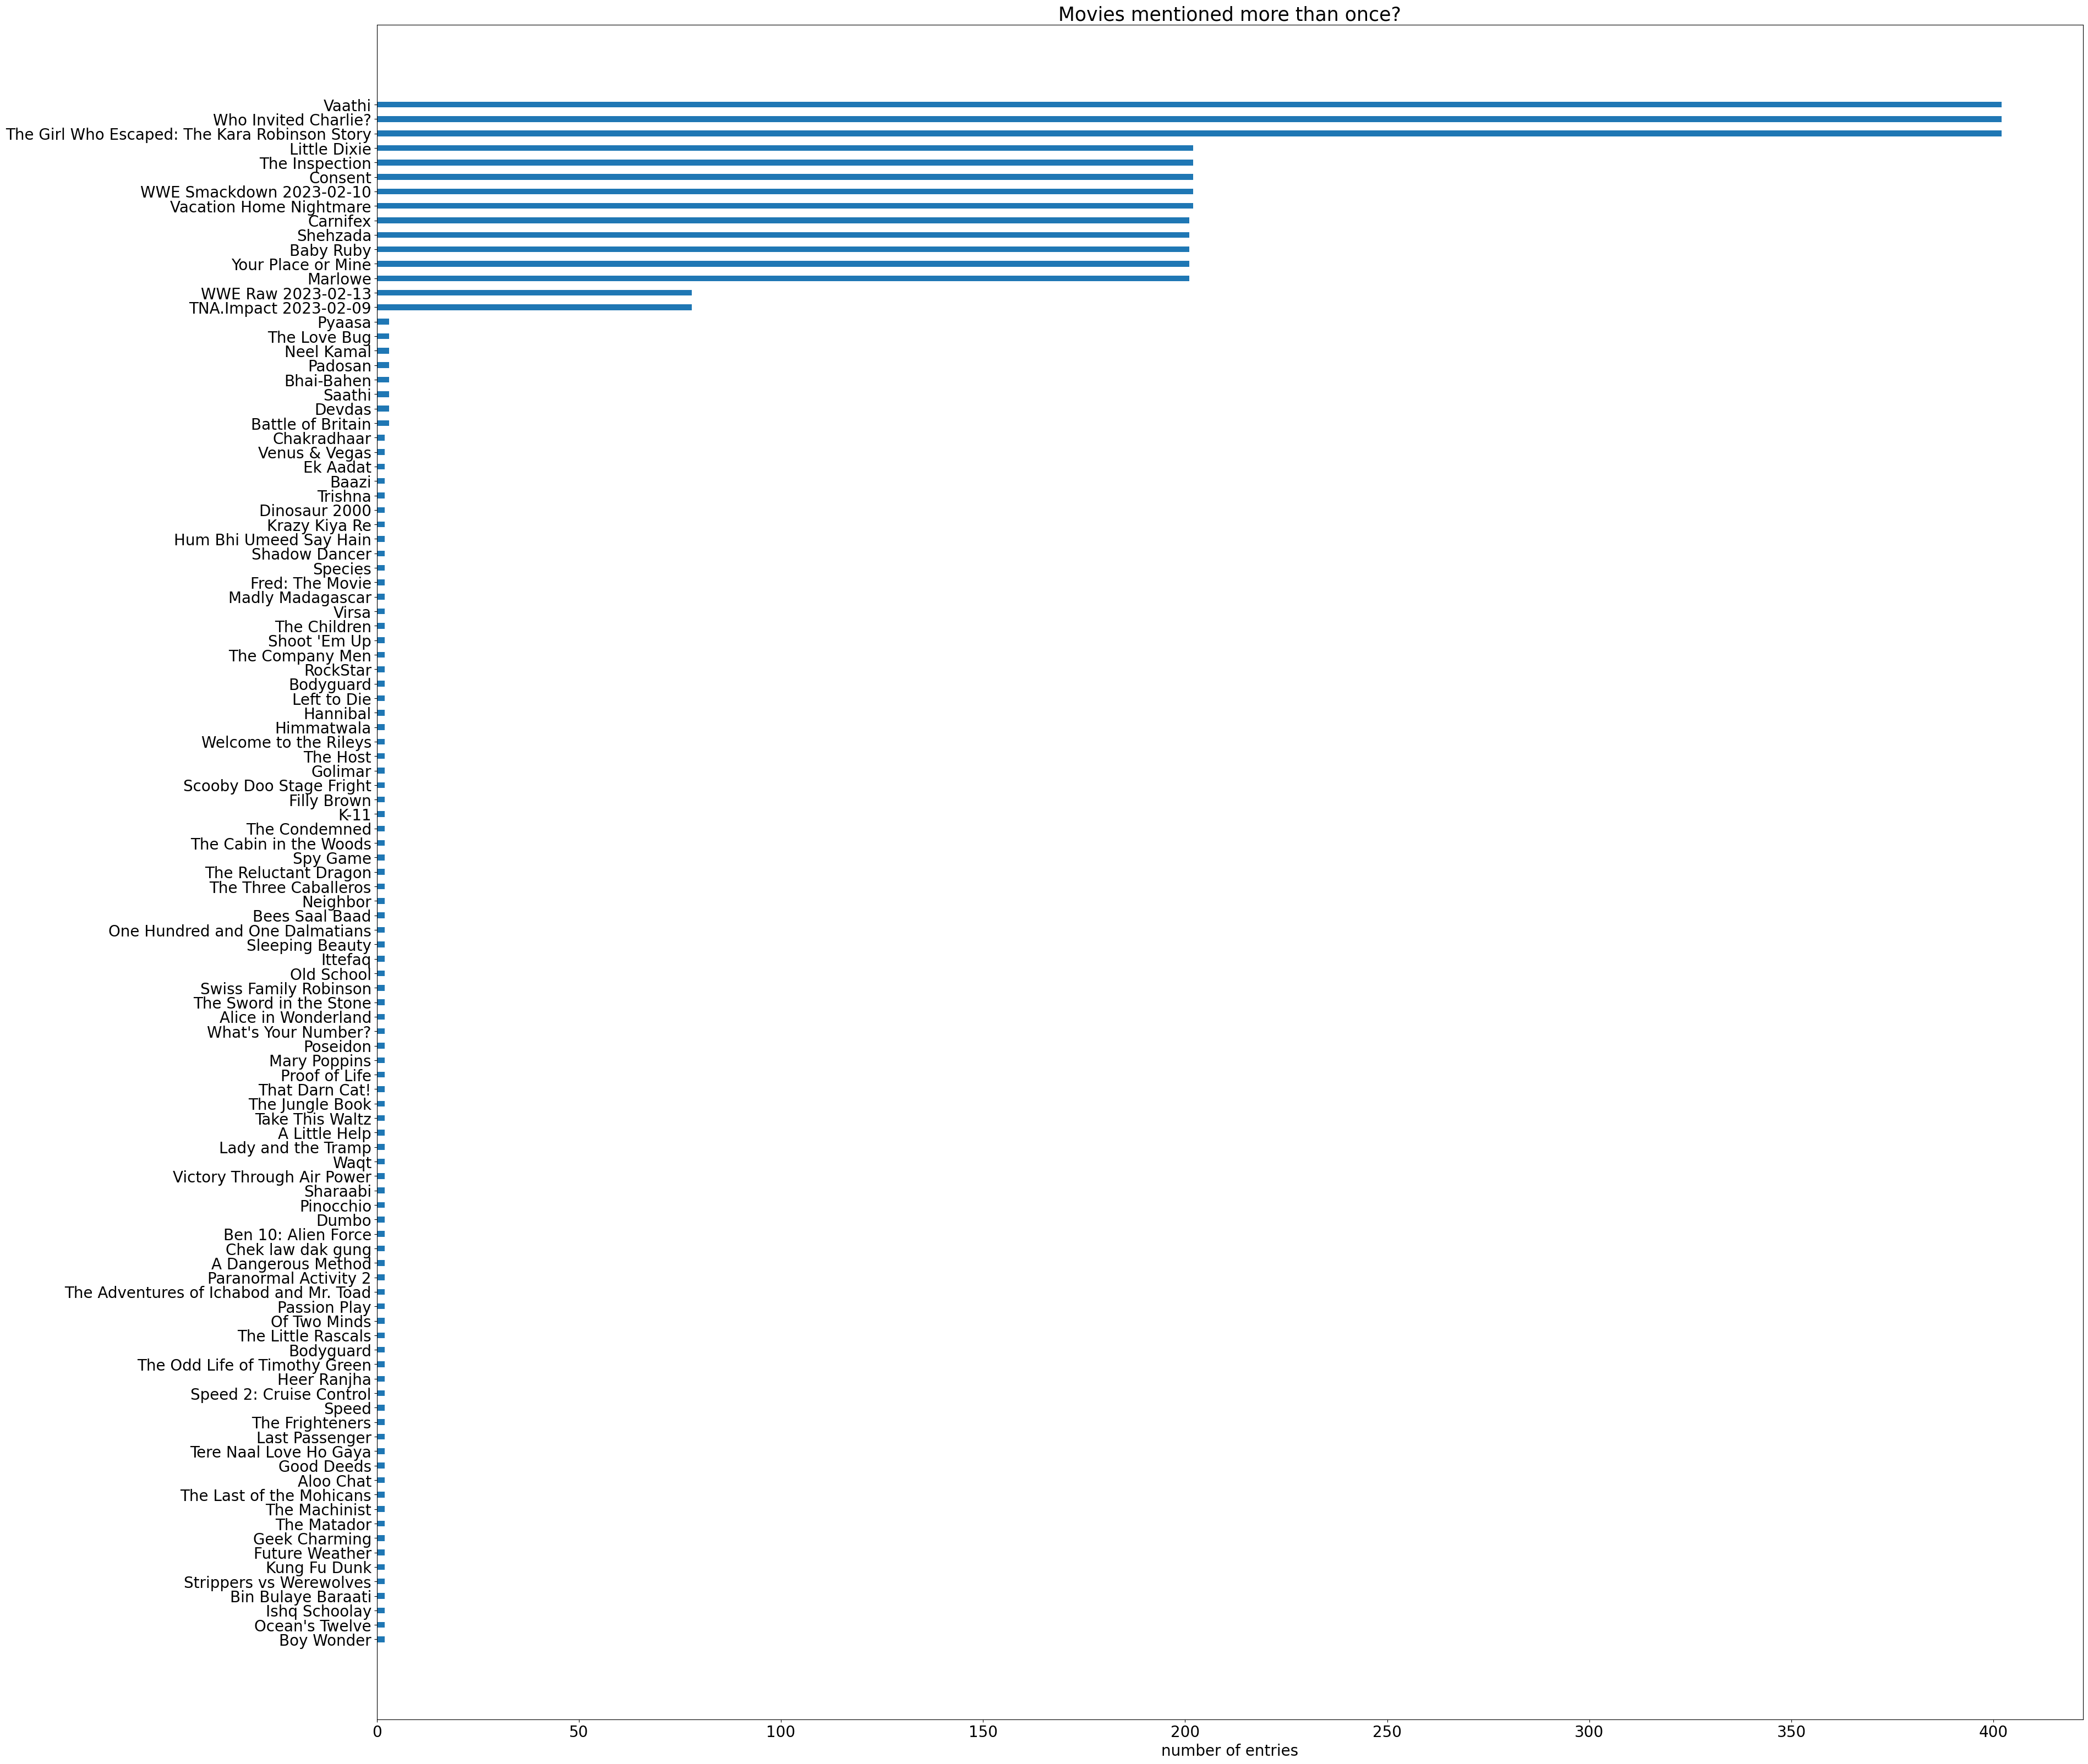

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
plt.yticks(list(range(107)), list(title_count.index), fontsize=20)
plt.xticks(fontsize=20)
plt.barh(id_count.index, width=id_count['count'], height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=20)
plt.title('Movies mentioned more than once?', fontsize=25, loc='center')
plt.show()

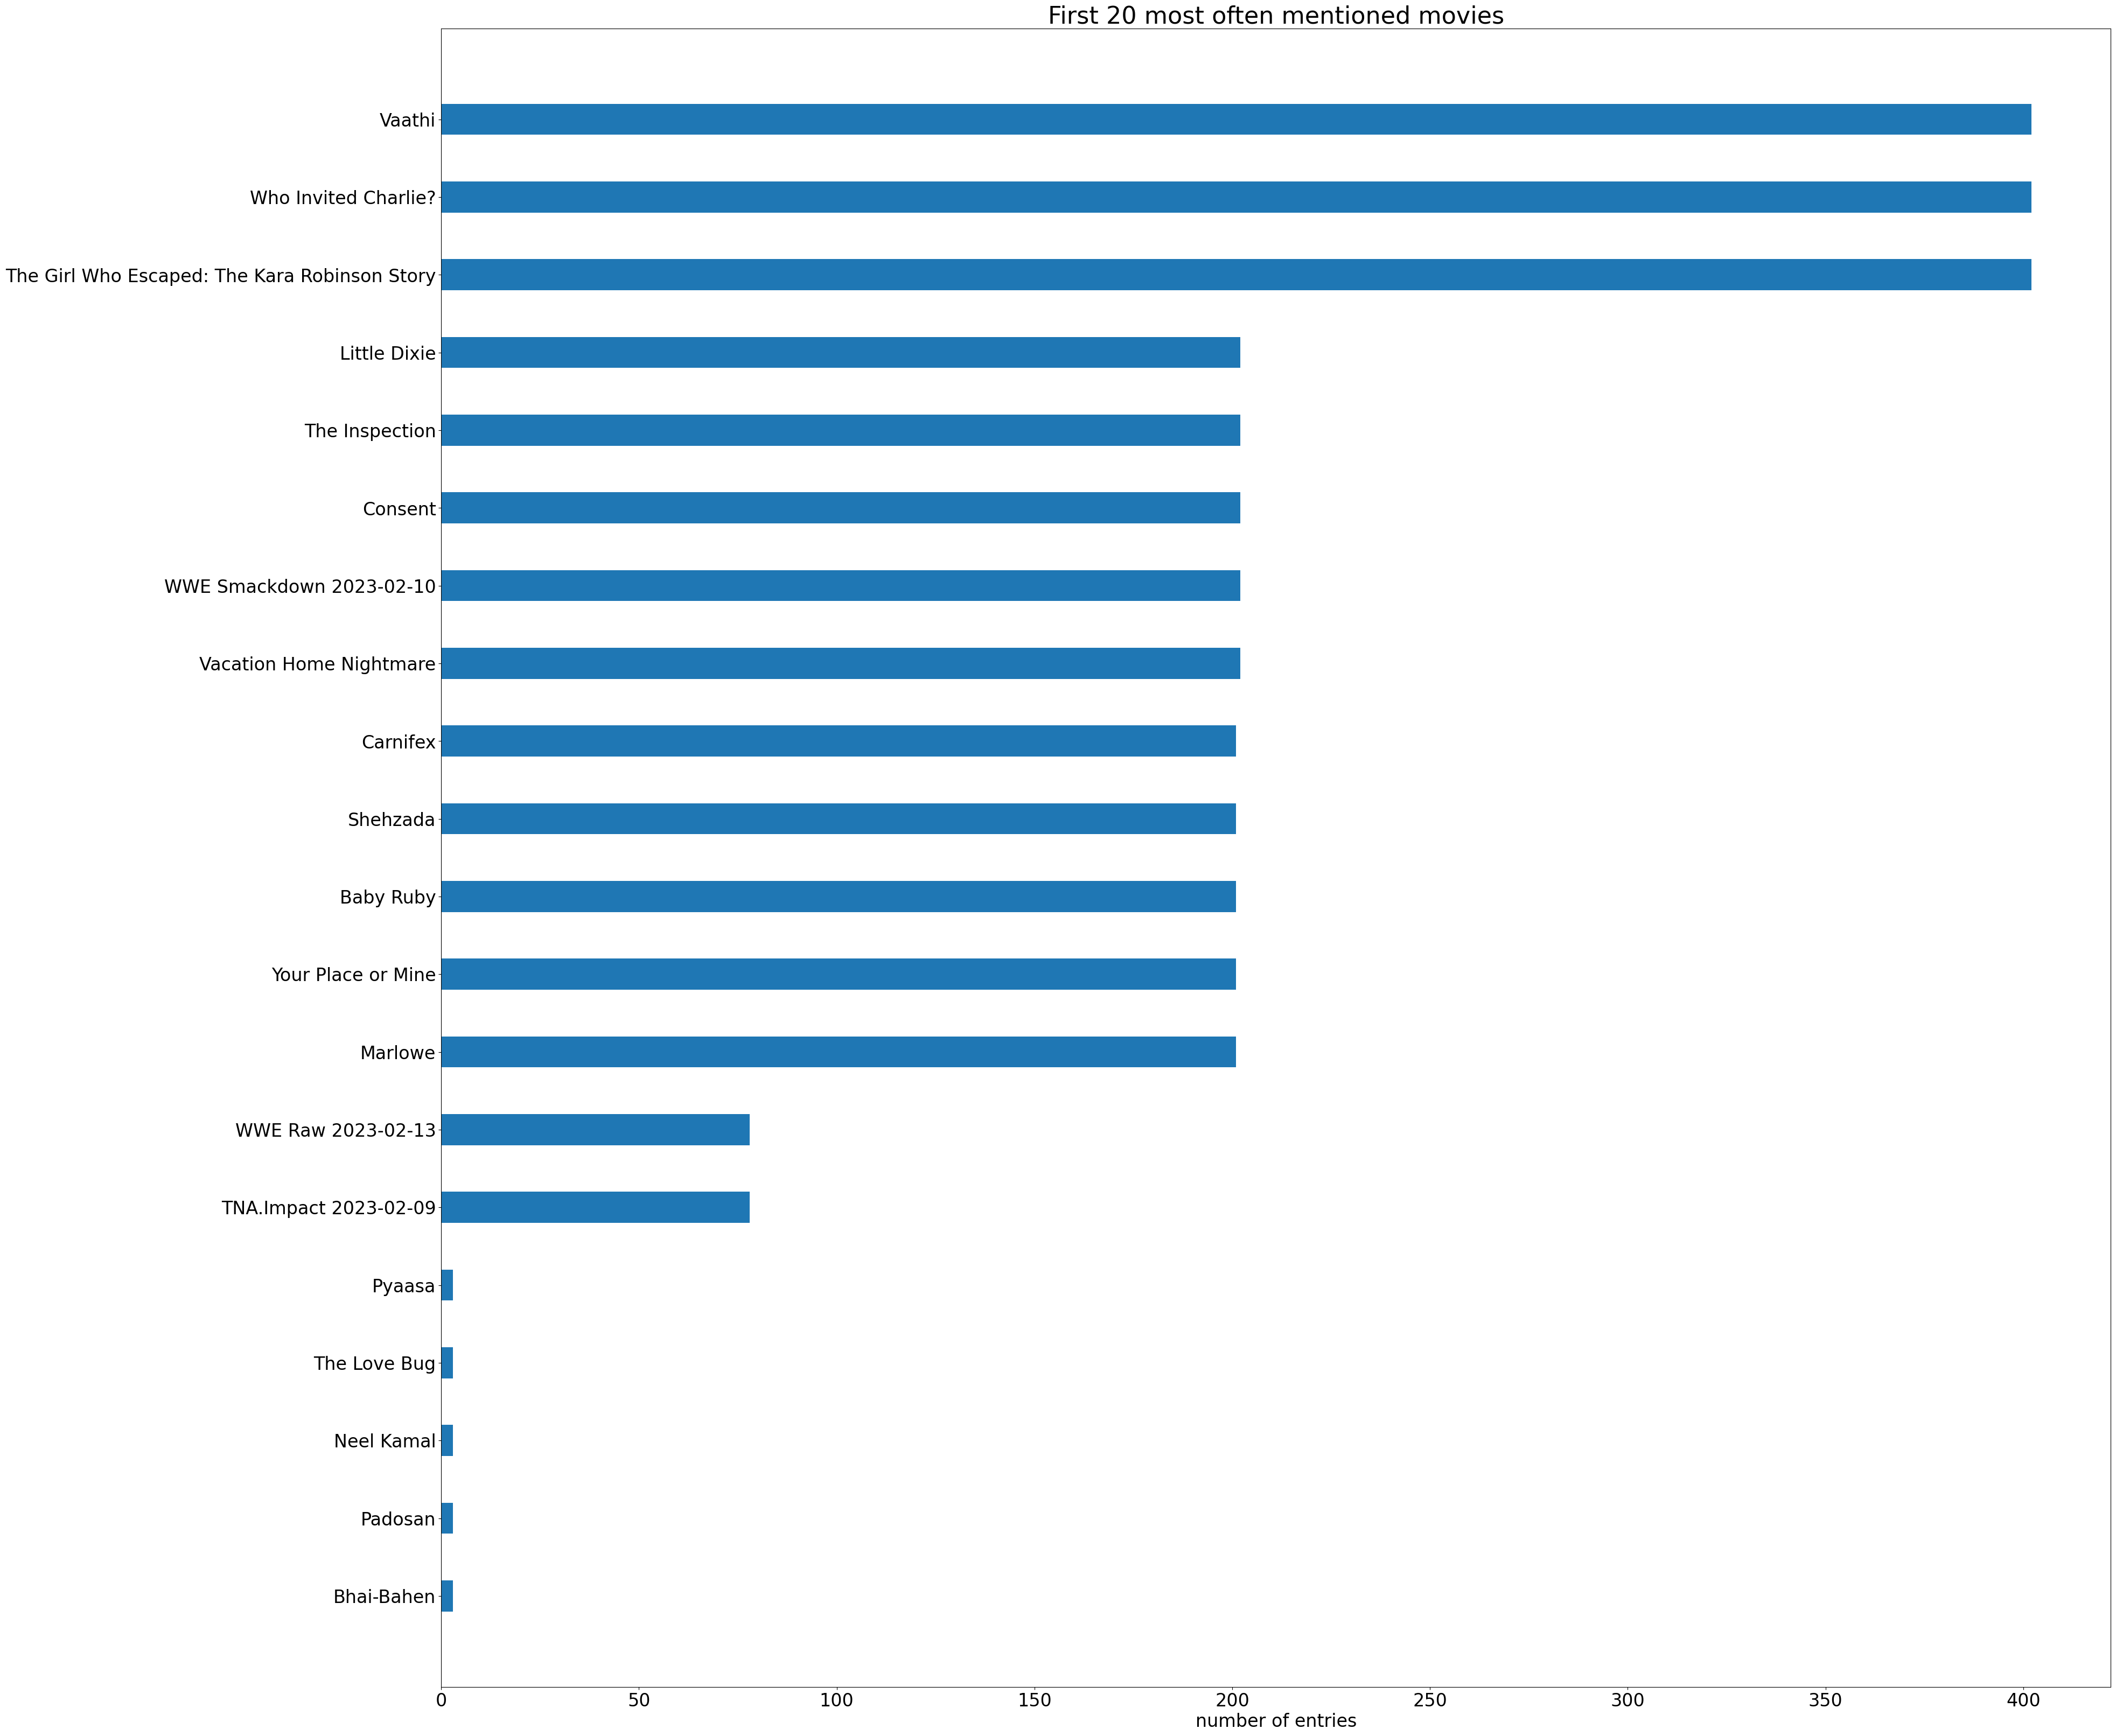

In [24]:
plt.figure(figsize=(40, 40))
plt.yticks(list(range(20)), list(title_count.tail(20).index), fontsize=24)
plt.xticks(fontsize=24)
plt.barh(id_count.tail(20).index, width=id_count['count'].tail(20), height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=24)
plt.title('First 20 most often mentioned movies', fontsize=32, loc='center')
plt.show()

Now we use the max `downloads` and max `views` as the representations for the movies.

In [25]:
# Create a DataFrame with the information of max downloads and max views for non-unique movie ids.
for id in non_unique_id_mov_data:
    non_unique_id_df = mov_data.query('id == @id').groupby('id').agg(max_downloads=('downloads', 'max'), max_views=('views', 'max'))
    max_downloads = non_unique_id_df['max_downloads'].iloc[0]
    max_views = non_unique_id_df['max_views'].iloc[0]
    
    mov_data.loc[mov_data['id'] == id, 'downloads'] = max_downloads
    mov_data.loc[mov_data['id'] == id, 'views'] = max_views
    
mov_data

IMDb-rating appropriate_for      director  downloads      id  \
0              4.8               R     John Swab      455.0  372092   
1              6.4           TV-PG   Paul Ziller       73.0  372091   
2              5.2               R  Ben Wheatley     1427.0  343381   
3              8.1             NaN  Venky Atluri     2379.0  372090   
4              4.6             NaN  Shaji Kailas      657.0  372089   
...            ...             ...           ...        ...     ...   
20543          NaN             NaN           NaN     1998.0   28957   
20544          7.7             NaN     Bimal Roy     6080.0   28958   
20545          8.0             NaN           NaN     3276.0   30459   
20546          NaN             NaN           NaN      309.0  371669   
20547          NaN             NaN           NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
1      Hollywood / English        English  20 Feb, 2023  Feb 05 2023   
2      Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
4                Tollywood          Hindi  20 Feb, 2023  Jan 26 2023   
...                    ...            ...           ...          ...   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20545   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 28 1958   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
1            84  Caterer\r\n Goldy Berry reunites with detectiv...   
2      1h 47min  As the world searches for a cure to a disastro...   
3           139  The life of a young man and his struggles agai...   
4           122  A man named Kalidas gets stranded due to the p...   
...         ...                                                ...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20545  1h 50min  While driving his car on a rainy night, Anand'...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20543                                  Bhai-Bahen   6219.0   
20544                                      Devdas  16376.0   
20545                                   Madhumati   7220.0   
20546                       TNA.Impact 2023-02-09   1419.0   
20547                          WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...                                                  ...  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20545                                                NaN  
20546                                                NaN  
20547                                                N

In [26]:
mov_data.duplicated().sum()

3462

In [27]:
mov_data = mov_data.drop_duplicates()
mov_data

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      455.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
3              8.1             NaN               Venky Atluri     2379.0   
4              4.6             NaN               Shaji Kailas      657.0   
...            ...             ...                        ...        ...   
20521          7.8             NaN                Yash Chopra     2433.0   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20534          7.9             NaN                 Raj Kapoor     5625.0   
20545          8.0             NaN                        NaN     3276.0   

           id             industry                language   posted_date  \
0      372092  Hollywood / English                 English  20 Feb, 2023   
1      372091  Hollywood / English                 English  20 Feb, 2023   
2      343381  Hollywood / English           English,Hindi  20 Apr, 2021   
3      372090            Tollywood                   Hindi  20 Feb, 2023   
4      372089            Tollywood                   Hindi  20 Feb, 2023   
...       ...                  ...                     ...           ...   
20521   22874   Bollywood / Indian           Hindi,English  01 Jan, 1970   
20522   23825   Bollywood / Indian                   Hindi  01 Jan, 1970   
20533    1173  Hollywood / English  Spanish,German,English  26 May, 2016   
20534    6839   Bollywood / Indian                   Hindi  01 Jan, 1970   
20545   30459   Bollywood / Indian                   Hindi  01 Jan, 1970   

      release_date  run_time  \
0      Jan 28 2023       105   
1      Feb 05 2023        84   
2      Jun 18 2021  1h 47min   
3      Feb 17 2023       139   
4      Jan 26 2023       122   
...            ...       ...   
20521  Jul 28 1965   178 min   
20522  May 11 1962       158   
20533  Jan 01 1970        90   
20534  Jan 25 1954  3h 13min   
20545  Mar 28 1958  1h 50min   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
3      The life of a young man and his struggles agai...   
4      A man named Kalidas gets stranded due to the p...   
...                                                  ...   
20521  Members of a family are separated in a natural...   
20522  After a lusty Thakur rapes a young girl, she k...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20534  Raju lives as a derelict as a result of being ...   
20545  While driving his car on a rainy night, Anand'...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20521                                        Waqt   6908.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   
20534                                      Awaara  13829.0   
20545                                   Madhumati   7220.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                  

In [28]:
mov_data.duplicated().sum()

0

Now, we have finished cleaning the different describes of the entries with same movie `id`.

#### *Frequency -- `storyline`*

In [29]:
mov_data['storyline'].value_counts()

storyline
A young couple awakens a terrible force when they attempt to socialize their reclusive neighbor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

#### *Frequency -- `appropriate_for`*

In [30]:
mov_data['appropriate_for'].value_counts()

appropriate_for
R                 3752
Not Rated         2132
PG-13             1763
PG                 884
TV-MA              406
TV-14              293
G                  140
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               44
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

#### *Frequency -- `language`*

In [31]:
mov_data['language'].value_counts().head(30)

language
English                  10052
Hindi                     1938
English,Spanish            388
Punjabi                    309
Telugu                     297
Tamil                      198
Hindi,English              187
English,French             174
English,Hindi              103
English,Russian             71
English,German              65
English,Italian             53
Urdu                        52
English,Japanese            49
Malayalam                   48
English,Mandarin            48
Kannada                     43
English,Arabic              38
French                      37
Spanish,English             34
Japanese                    34
Russian                     30
English,Chinese             30
Hindi,Urdu                  29
English,Ukrainian           29
Spanish                     28
English Hindi               28
English,Latin               26
Hindi,Marathi,English       25
German                      24
Name: count, dtype: int64

In [32]:
mov_language = mov_data['language'].astype('str')
mov_language.iloc[2]

'English,Hindi'

In [33]:
for i in range(len(mov_language)):
    mov_language.iloc[i] = mov_language.iloc[i].split(',')
    for j in range(len(mov_language.iloc[i])):
        mov_language.iloc[i][j] = mov_language.iloc[i][j].lstrip(' ')

mov_language

0                         [English]
1                         [English]
2                  [English, Hindi]
3                           [Hindi]
4                           [Hindi]
                    ...            
20521              [Hindi, English]
20522                       [Hindi]
20533    [Spanish, German, English]
20534                       [Hindi]
20545                       [Hindi]
Name: language, Length: 17086, dtype: object

In [34]:
mov_language.iloc[2][1]

'Hindi'

In [35]:
len(mov_language.iloc[2])

2

In [36]:
mov_language_dict = {}

for i in range(len(mov_language)):
    for j in range(len(mov_language.iloc[i])):
        if mov_language.iloc[i][j] not in mov_language_dict:
            mov_language_dict['{}'.format(mov_language.iloc[i][j])] = 0
        mov_language_dict['{}'.format(mov_language.iloc[i][j])] += 1

# mov_language_dict

In [37]:
print("There are {} languages in all.".format(len(mov_language_dict)))

There are 187 languages in all.


In [38]:
mov_language_dict.keys()

dict_keys(['English', 'Hindi', 'Punjabi', 'Danish', 'Urdu', 'Spanish', 'Italian', 'French', 'Mandarin', 'Cantonese', 'nan', 'Greek', 'Maori', 'Tamil', 'Telugu', 'Chinese', 'Korean', 'Czech', 'Haryanvi', 'Swiss German', 'Bulgarian', 'Latin', 'Bambara', 'Kannada', 'Marathi', 'Russian', 'Malayalam', 'Norwegian', 'Gujarati', 'Arabic', 'Polish', 'Japanese', 'Irish Gaelic', 'German', 'Filipino', 'Turkish', 'Dutch', 'Portuguese', 'Kazakh', 'Zulu', 'North American Indian', 'Yoruba', 'Romanian', 'Akan', 'Min Nan', 'Maltese', 'Nepali', 'Estonian', 'Norse', 'Old', 'Vietnamese', 'Thai', 'Hawaiian', 'Welsh', 'Aboriginal', 'Xhosa', 'Ukrainian', 'Persian', 'Finnish', 'Swedish', 'Serbian', 'Sanskrit', 'Hebrew', 'Yiddish', 'Croatian', 'Afrikaans', 'Indonesian', 'American Sign Language', 'Sumerian', 'Ancient (to 1453)', 'Ojibwa', 'Samoan', 'Bengali', 'Cree', 'Tupi', 'Albanian', 'Chechen', 'Gaelic', 'Shoshoni', 'Hungarian', 'Macedonian', 'Nahuatl', 'Malay', 'Bable', 'Kashmiri', 'Icelandic', 'Tonga (Tonga

In [39]:
mov_language_dict = dict(sorted(mov_language_dict.items(), key=lambda x: x[1]))
# mov_language_dict

In [40]:
mov_data['language'].astype('str').iloc[0]

'English'

#### *Frequency -- `industry`*

In [41]:
mov_data['industry'].value_counts()

industry
Hollywood / English    12197
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: count, dtype: int64

#### *Frequency -- `posted_date`*

In [42]:
mov_data.loc[:, 'posted_date'] = pd.to_datetime(mov_data['posted_date'])
mov_data['posted_date']

0        2023-02-20 00:00:00
1        2023-02-20 00:00:00
2        2021-04-20 00:00:00
3        2023-02-20 00:00:00
4        2023-02-20 00:00:00
                ...         
20521    1970-01-01 00:00:00
20522    1970-01-01 00:00:00
20533    2016-05-26 00:00:00
20534    1970-01-01 00:00:00
20545    1970-01-01 00:00:00
Name: posted_date, Length: 17086, dtype: object

In [43]:
mov_data['posted_date'].value_counts()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\851027329.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  mov_data['posted_date'].value_counts()


posted_date
1970-01-01    38
2014-01-03    24
2014-09-11    21
2013-02-25    20
2014-02-01    16
              ..
2009-05-26     1
2009-05-25     1
2009-05-18     1
2009-05-10     1
2010-03-27     1
Name: count, Length: 4123, dtype: int64

#### *Frequency -- `release_date`*

In [44]:
mov_data['release_date'] = pd.to_datetime(mov_data['release_date'])
mov_data['release_date']

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\341086201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['release_date'] = pd.to_datetime(mov_data['release_date'])


0       2023-01-28
1       2023-02-05
2       2021-06-18
3       2023-02-17
4       2023-01-26
           ...    
20521   1965-07-28
20522   1962-05-11
20533   1970-01-01
20534   1954-01-25
20545   1958-03-28
Name: release_date, Length: 17086, dtype: datetime64[ns]

In [45]:
mov_data['release_date'].value_counts()

release_date
1970-01-01    958
2022-10-07     29
2020-02-14     28
2019-12-06     28
2015-10-16     27
             ... 
1999-07-16      1
1994-07-15      1
1997-09-26      1
1993-09-17      1
1958-03-28      1
Name: count, Length: 4886, dtype: int64

#### *Frequency -- `run_time`*

In [51]:
time_data = mov_data['run_time']
time_data

0        105
1         84
2        107
3        139
4        122
        ... 
20521    178
20522    158
20533     90
20534    193
20545    110
Name: run_time, Length: 17086, dtype: object

In [52]:
# 把run_time统一成分钟数
for i in range(len(mov_data['run_time'])):
    # print(mov_data['run_time'].iloc[i])
    if mov_data['run_time'].isna().iloc[i] == False:
        time_list = mov_data['run_time'].astype('str').iloc[i].rstrip('min').rstrip('h').split('h ')
        if len(time_list) == 2:
            run_time = int(time_list[0]) * 60 + int(time_list[1])
        elif len(time_list) == 1:
            run_time = int(time_list[0])
        
        mov_data['run_time'].iloc[i] = run_time

# def convert_run_time(row):
#     if pd.isna(row):
#         return row  # 返回原始空值
#     time_list = row.rstrip('min').rstrip('h').split('h ')
#     if len(time_list) == 2:
#         return int(time_list[0]) * 60 + int(time_list[1])  # 转换小时和分钟为分钟
#     elif len(time_list) == 1:
#         # 只有小时或分钟，依赖原始字符串的格式进行判断
#         if 'h' in row:
#             return int(time_list[0]) * 60  # 只有小时
#         else:
#             return int(time_list[0])  # 只有分钟
#     return None  # 如果格式不匹配，返回None或适当的默认值

# # 使用apply函数转换每一行，确保操作发生在原DataFrame上
# mov_data['run_time'] = mov_data['run_time'].apply(convert_run_time)


In [53]:
mov_data['run_time'].head(10)

0    105
1     84
2    107
3    139
4    122
5    131
6    200
7    116
8     80
9     80
Name: run_time, dtype: object

In [55]:
mov_data['run_time'].value_counts()

run_time
90     851
95     470
92     447
93     427
85     418
      ... 
26       1
51       1
32       1
28       1
271      1
Name: count, Length: 201, dtype: int64

#### *Frequency -- `director`*

In [56]:
mov_data['director'].value_counts()

director
David Dhawan             32
Ram Gopal Varma          27
Vikram Bhatt             25
Steven Spielberg         24
Priyadarshan             22
                         ..
Mike Gan                  1
Santhosh P. Jayakumar     1
Johnny Mitchell           1
Vijay Yelakanti           1
Biren Nag                 1
Name: count, Length: 9672, dtype: int64

#### *Frequency -- `writer`*

In [57]:
mov_data['writer'].value_counts()

writer
Naresh Kathuria                           11
Dheeraj Rattan                            11
Andrew Jones                              11
Jagdeep Singh                             10
Tyler Perry                               10
                                          ..
Jack Ketchum                               1
Kraig Wenman, Peter Sullivan               1
Robert Bruzio                              1
Lynn Shelton, Michael Patrick O'Brien      1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas     1
Name: count, Length: 13603, dtype: int64

### Numeric Attributes

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

In [77]:
numeric_mov_data = pd.DataFrame(mov_data, columns=['views', 'downloads', 'IMDb-rating'])
numeric_mov_data.head()

views  downloads  IMDb-rating
0   4442.0      455.0          4.8
1   1002.0       73.0          6.4
2  14419.0     1427.0          5.2
3   7891.0     2379.0          8.1
4   2438.0      657.0          4.6

In [78]:
mov_data['views'].describe()

count    1.708500e+04
mean     4.105073e+04
std      6.704179e+04
min      6.670000e+02
25%      9.899000e+03
50%      1.920700e+04
75%      4.370000e+04
max      1.638533e+06
Name: views, dtype: float64

In [79]:
mov_data['downloads'].describe()

count     17085.000000
mean      12575.807609
std       25542.926019
min           0.000000
25%        1287.000000
50%        3757.000000
75%       12224.000000
max      391272.000000
Name: downloads, dtype: float64

In [80]:
mov_data['IMDb-rating'].describe()

count    16609.000000
mean         5.596442
std          1.281091
min          1.100000
25%          4.700000
50%          5.700000
75%          6.500000
max          9.900000
Name: IMDb-rating, dtype: float64

#### *Five Number Summary -- `views`, `downloads`, `IMDb-rating`*

In [81]:
numeric_mov_data.describe().loc[['max', '75%', '50%', '25%', 'min']]

views  downloads  IMDb-rating
max  1638533.0   391272.0          9.9
75%    43700.0    12224.0          6.5
50%    19207.0     3757.0          5.7
25%     9899.0     1287.0          4.7
min      667.0        0.0          1.1

#### *Missing Value Count*

In [82]:
NaN_counts = mov_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

IMDb-rating  appropriate_for  director  downloads  id  industry  \
NaN_counts          477             7277      1566          1   0         1   

            language  posted_date  release_date  run_time  storyline  title  \
NaN_counts       538            1             1      1000       1322      1   

            views  writer  
NaN_counts      1    1820

## 2. Data Visualization

### Histogram for Nominal Attributes

#### `appropriate_for`

In [83]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).sort_values(by='count', ascending=True)
appropriate_count

count
appropriate_for       
18+                  1
Drama                1
TV-13                1
MA-17                1
Drama, Romance       1
Passed               3
TV-Y7-FV             3
NC-17                4
Approved             9
TV-Y                25
TV-Y7               44
TV-G                99
TV-PG              115
G                  140
TV-14              293
TV-MA              406
PG                 884
PG-13             1763
Not Rated         2264
R                 3752

It is exactly the same meaning for index *Unrated* and *Not Rated*. We replace *Unrated* by *Not Rated*.

In [84]:
mov_data['appropriate_for'] = mov_data['appropriate_for'].replace('Unrated', 'Not Rated')

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\1373196687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['appropriate_for'] = mov_data['appropriate_for'].replace('Unrated', 'Not Rated')


In [85]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).sort_values(by='count', ascending=True)
appropriate_count

count
appropriate_for       
18+                  1
Drama                1
TV-13                1
MA-17                1
Drama, Romance       1
Passed               3
TV-Y7-FV             3
NC-17                4
Approved             9
TV-Y                25
TV-Y7               44
TV-G                99
TV-PG              115
G                  140
TV-14              293
TV-MA              406
PG                 884
PG-13             1763
Not Rated         2264
R                 3752

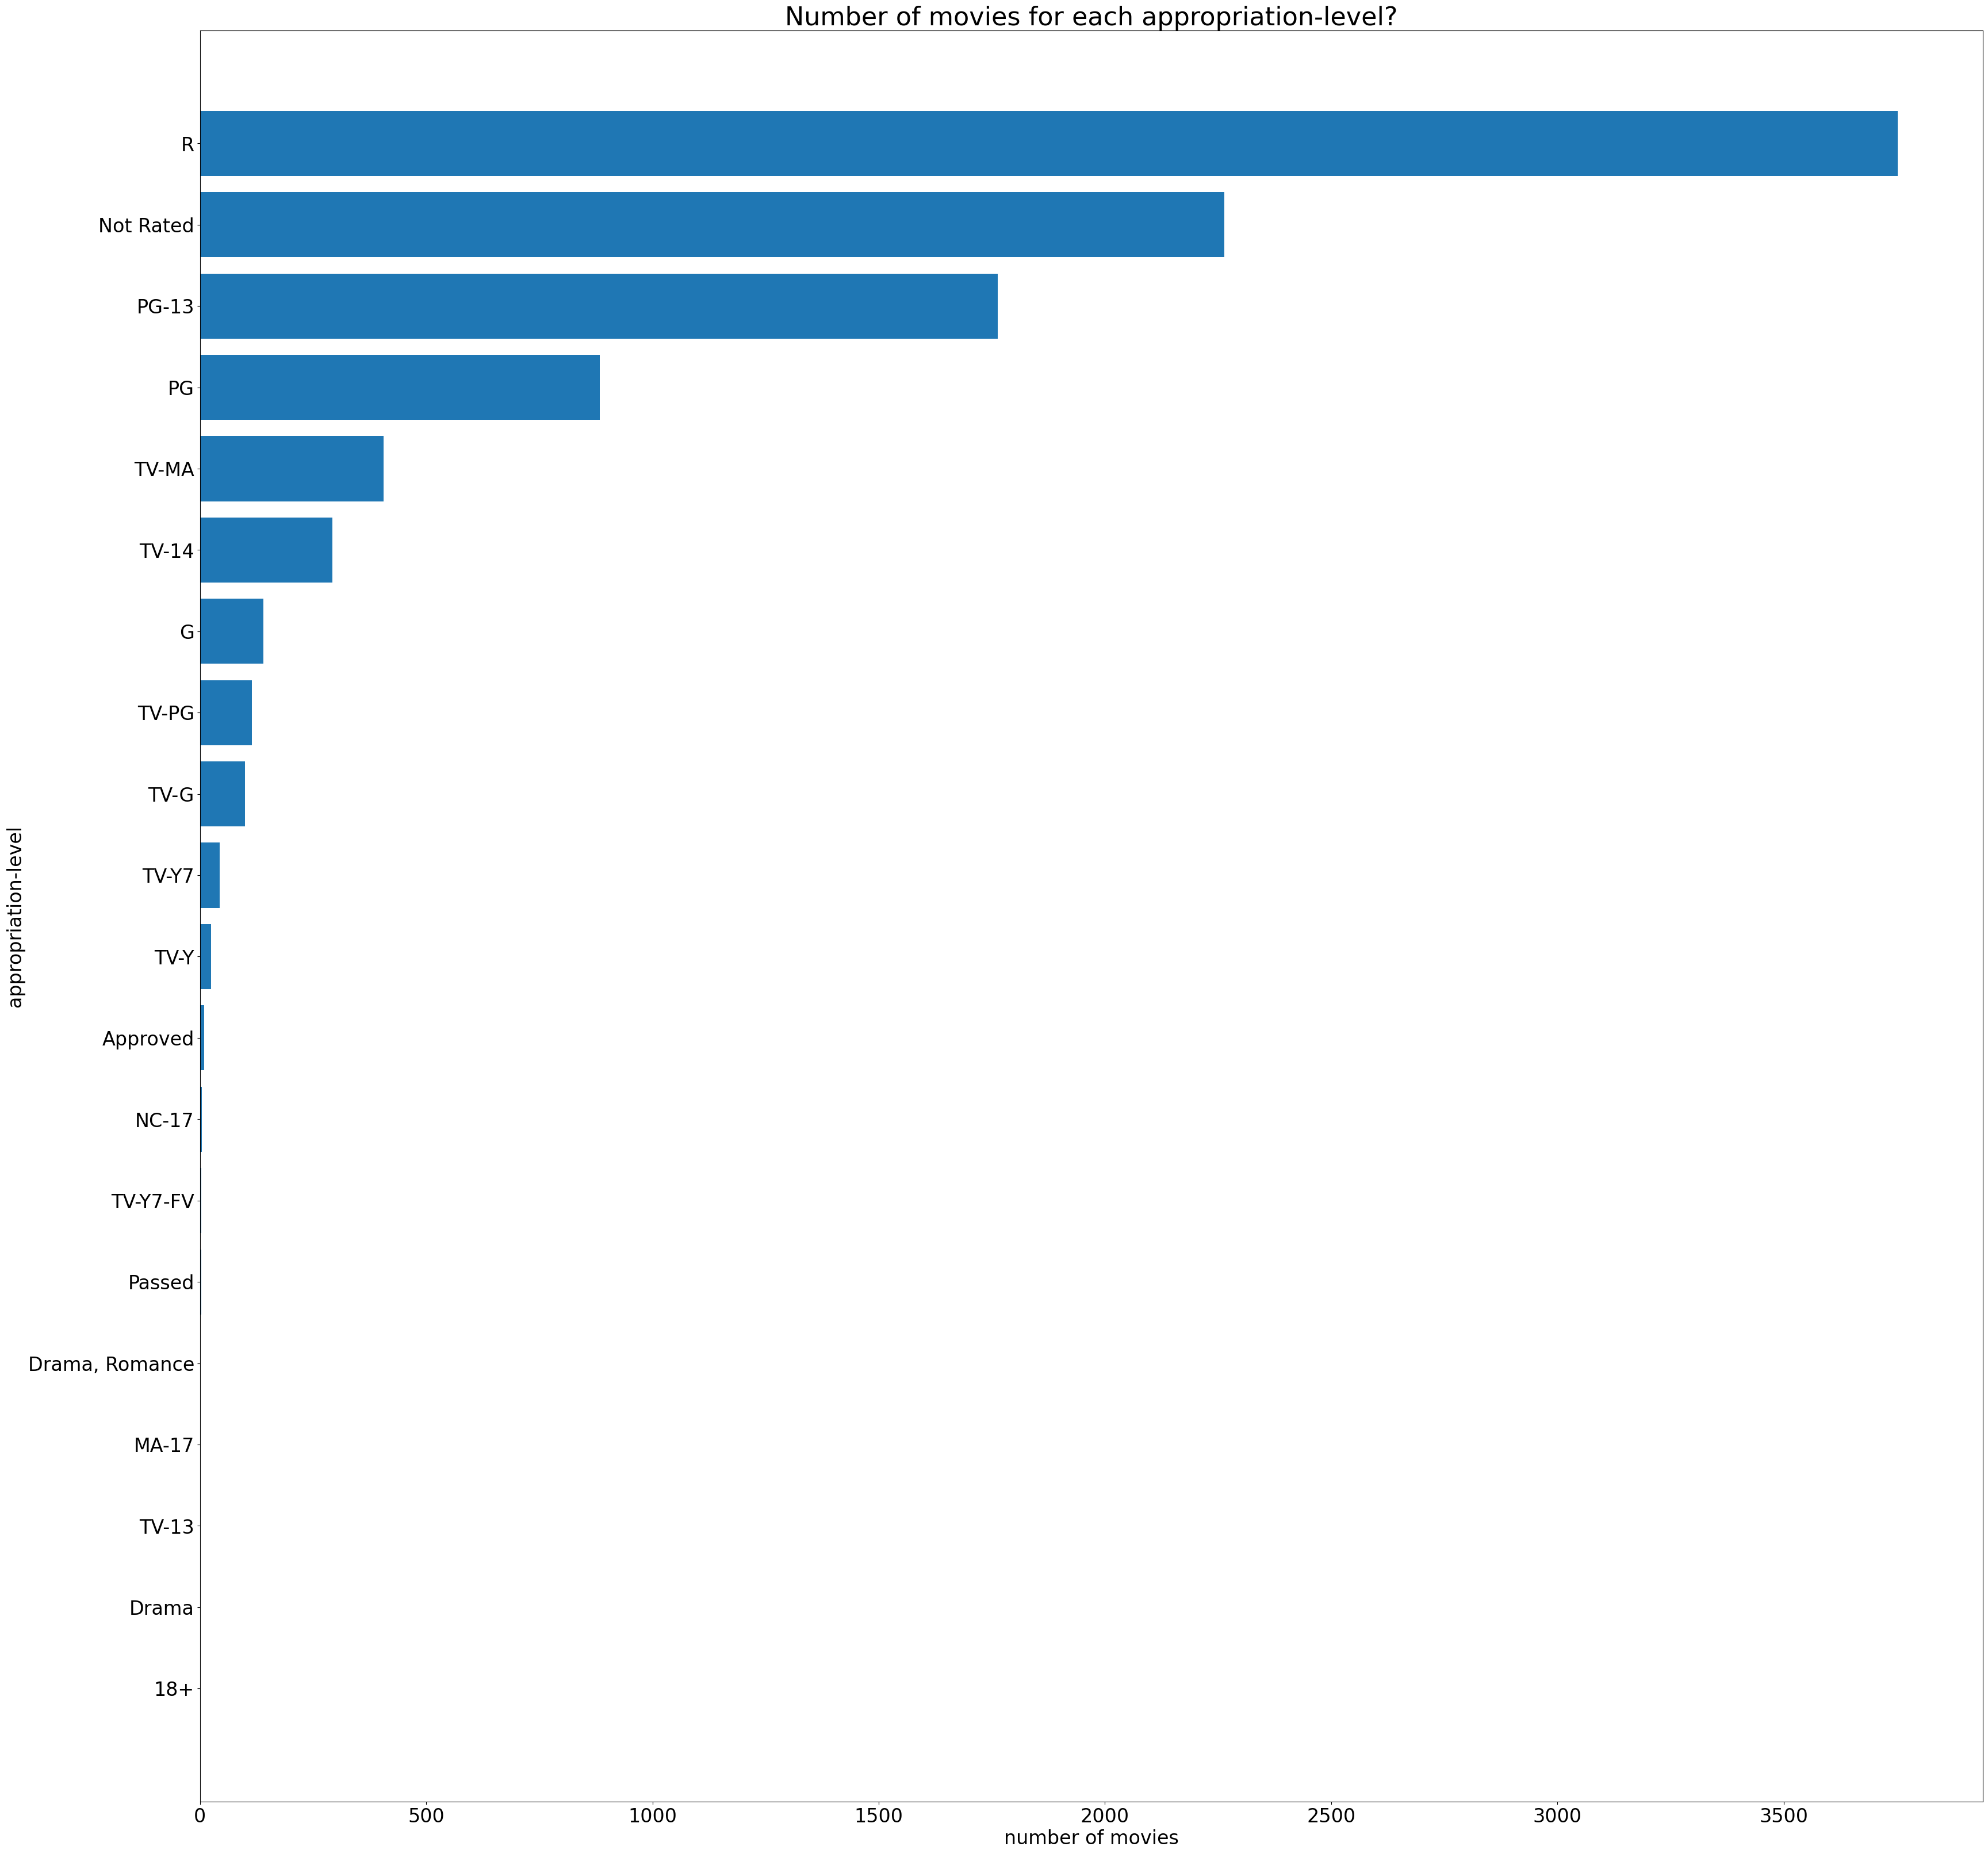

In [86]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count.index, width=appropriate_count['count'])
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.show()

In [87]:
list(mov_language_dict.keys())[-10:]

['Tamil',
 'Russian',
 'German',
 'Punjabi',
 'Telugu',
 'nan',
 'French',
 'Spanish',
 'Hindi',
 'English']

#### `language`

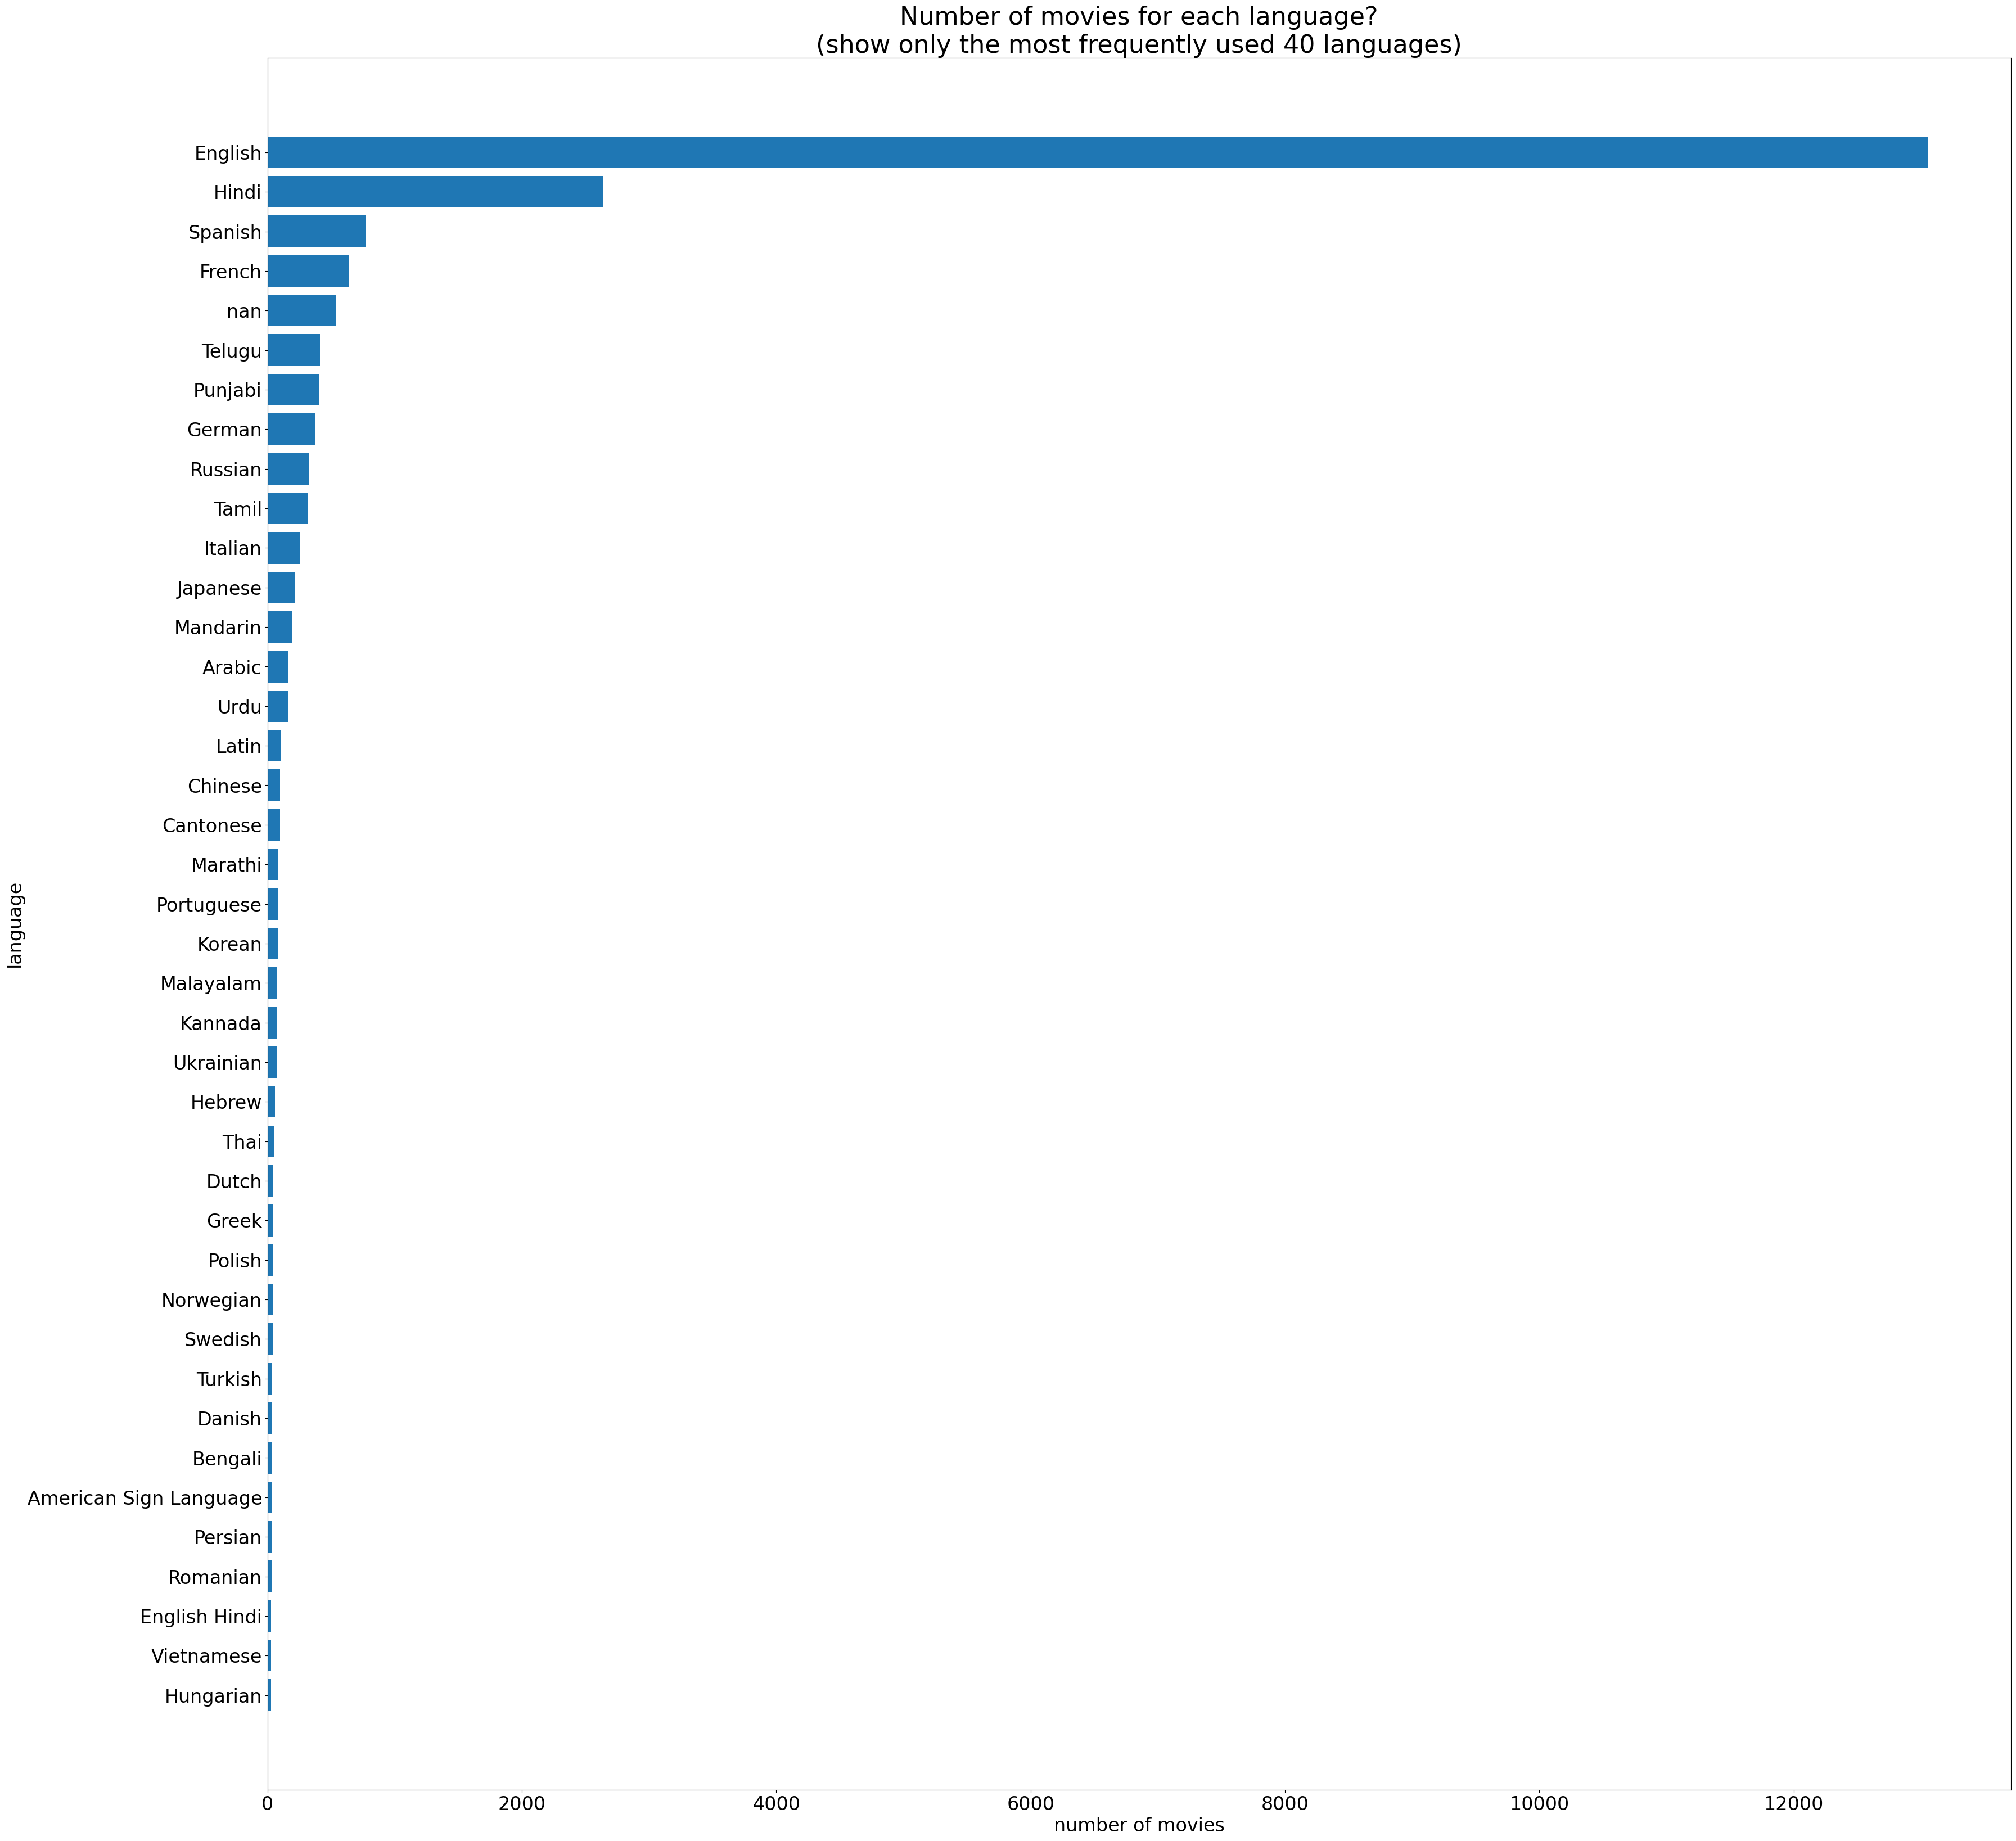

In [88]:
# language_count = pd.DataFrame(mov_data['language'].value_counts()).rename(columns={'language': 'language_count'}).sort_values(by='language_count', ascending=True)

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict.values())[-40:])
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each language?\n(show only the most frequently used 40 languages)', fontsize=32, loc='center')
plt.show()

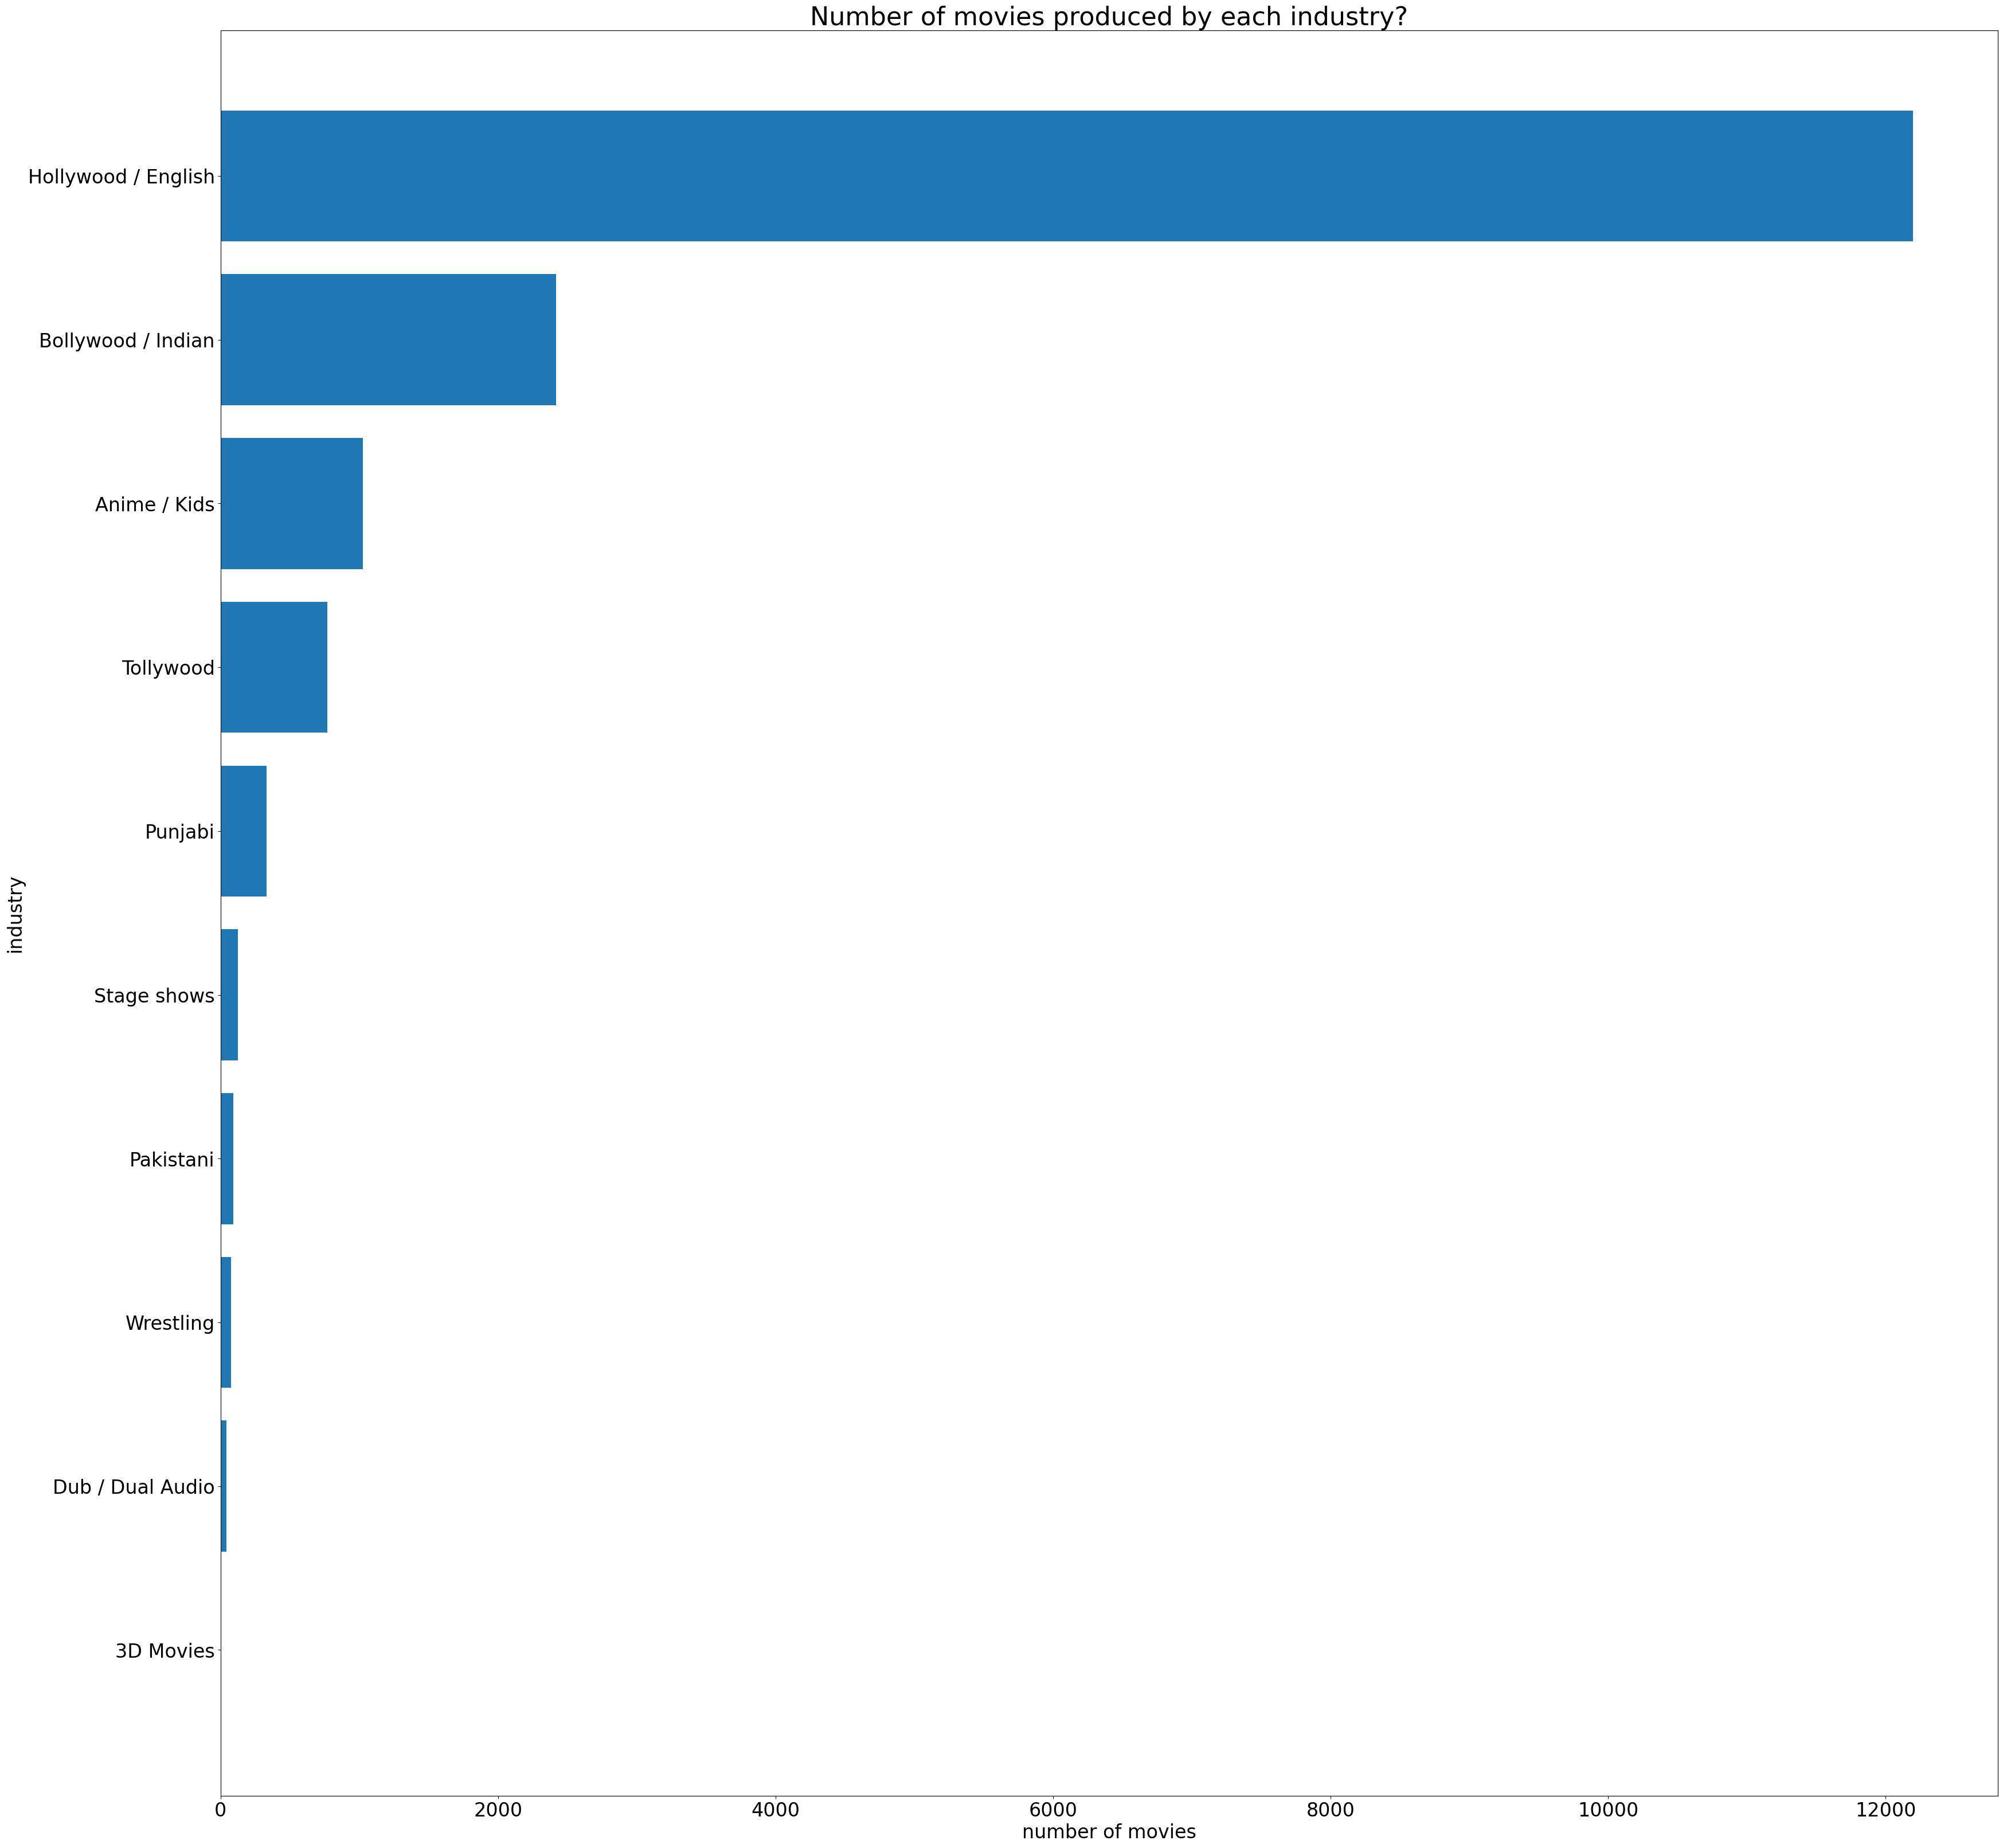

In [89]:
industry_count = pd.DataFrame(mov_data['industry'].value_counts()).sort_values(by='count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(industry_count.index, width=industry_count['count'])
plt.ylabel('industry', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies produced by each industry?', fontsize=32, loc='center')
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\1643394557.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data['posted_date'] = pd.to_datetime(mov_data['posted_date'], errors='coerce')  # 转换并处理无法转换的值


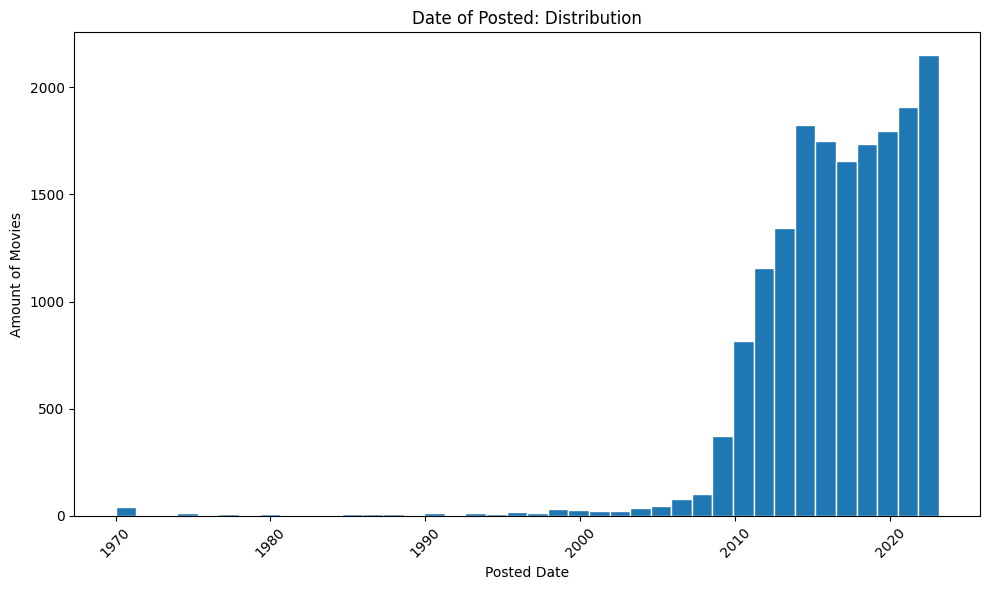

In [90]:
# # mov_data['posted_date'].hist()
# plt.figure(figsize=(40, 40))
# plt.hist(mov_data['posted_date'], bins=40, edgecolor='white')
# plt.title('Date of posted: distribution')
# plt.yticks(fontsize=24)
# plt.xticks(fontsize=24)
# plt.ylabel('amount of movies', fontsize=24)
# plt.xlabel('posted date', fontsize=24)
# plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# 假设 mov_data 是你的 DataFrame
# 确保 posted_date 是 datetime 类型
mov_data['posted_date'] = pd.to_datetime(mov_data['posted_date'], errors='coerce')  # 转换并处理无法转换的值

# 删除可能转换失败导致的 NaT 值
mov_data = mov_data.dropna(subset=['posted_date'])

# 绘制直方图
plt.figure(figsize=(10, 6))  # 调整大小为更常见的尺寸
plt.hist(mov_data['posted_date'].dt.date, bins=40, edgecolor='white')  # 使用 dt.date 以确保没有时间部分干扰
plt.title('Date of Posted: Distribution')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便阅读
plt.ylabel('Amount of Movies')
plt.xlabel('Posted Date')
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()


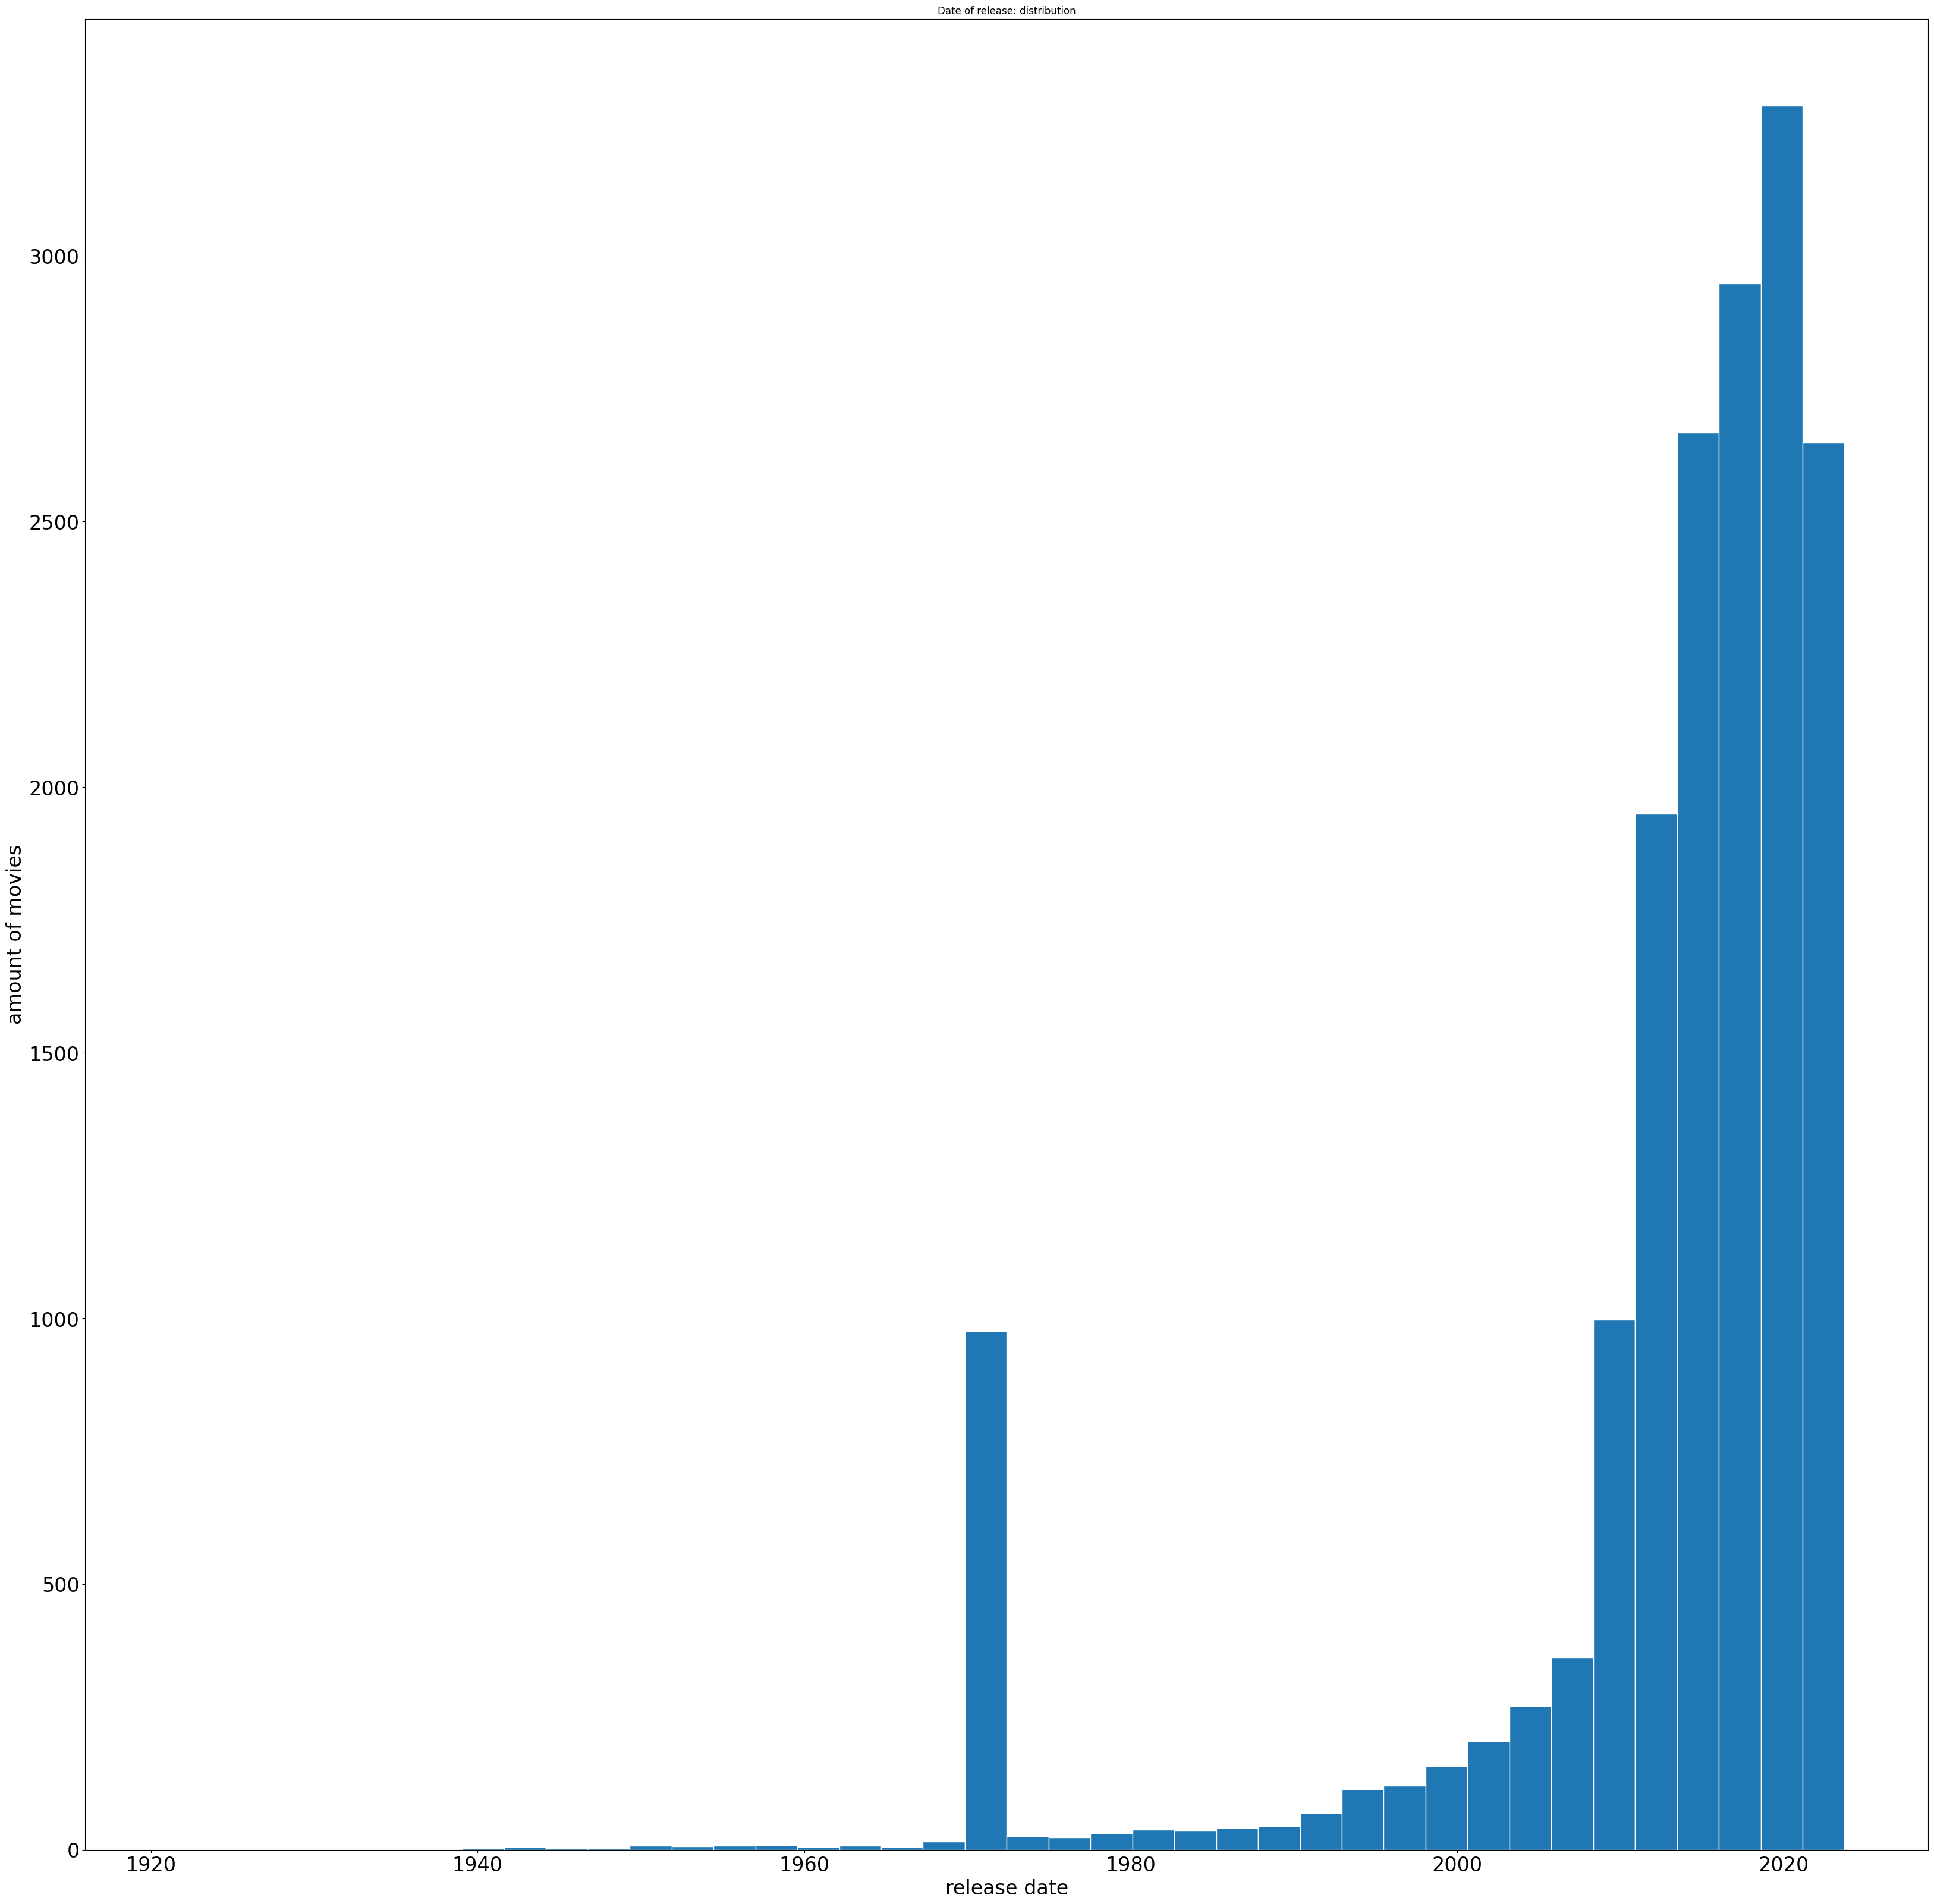

In [92]:
plt.figure(figsize=(40, 40))
plt.hist(mov_data['release_date'], bins=40, edgecolor='white')
plt.title('Date of release: distribution')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('amount of movies', fontsize=24)
plt.xlabel('release date', fontsize=24)
plt.show()

c:\Users\张睿堃\.conda\envs\torch2.0.1\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\张睿堃\.conda\envs\torch2.0.1\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


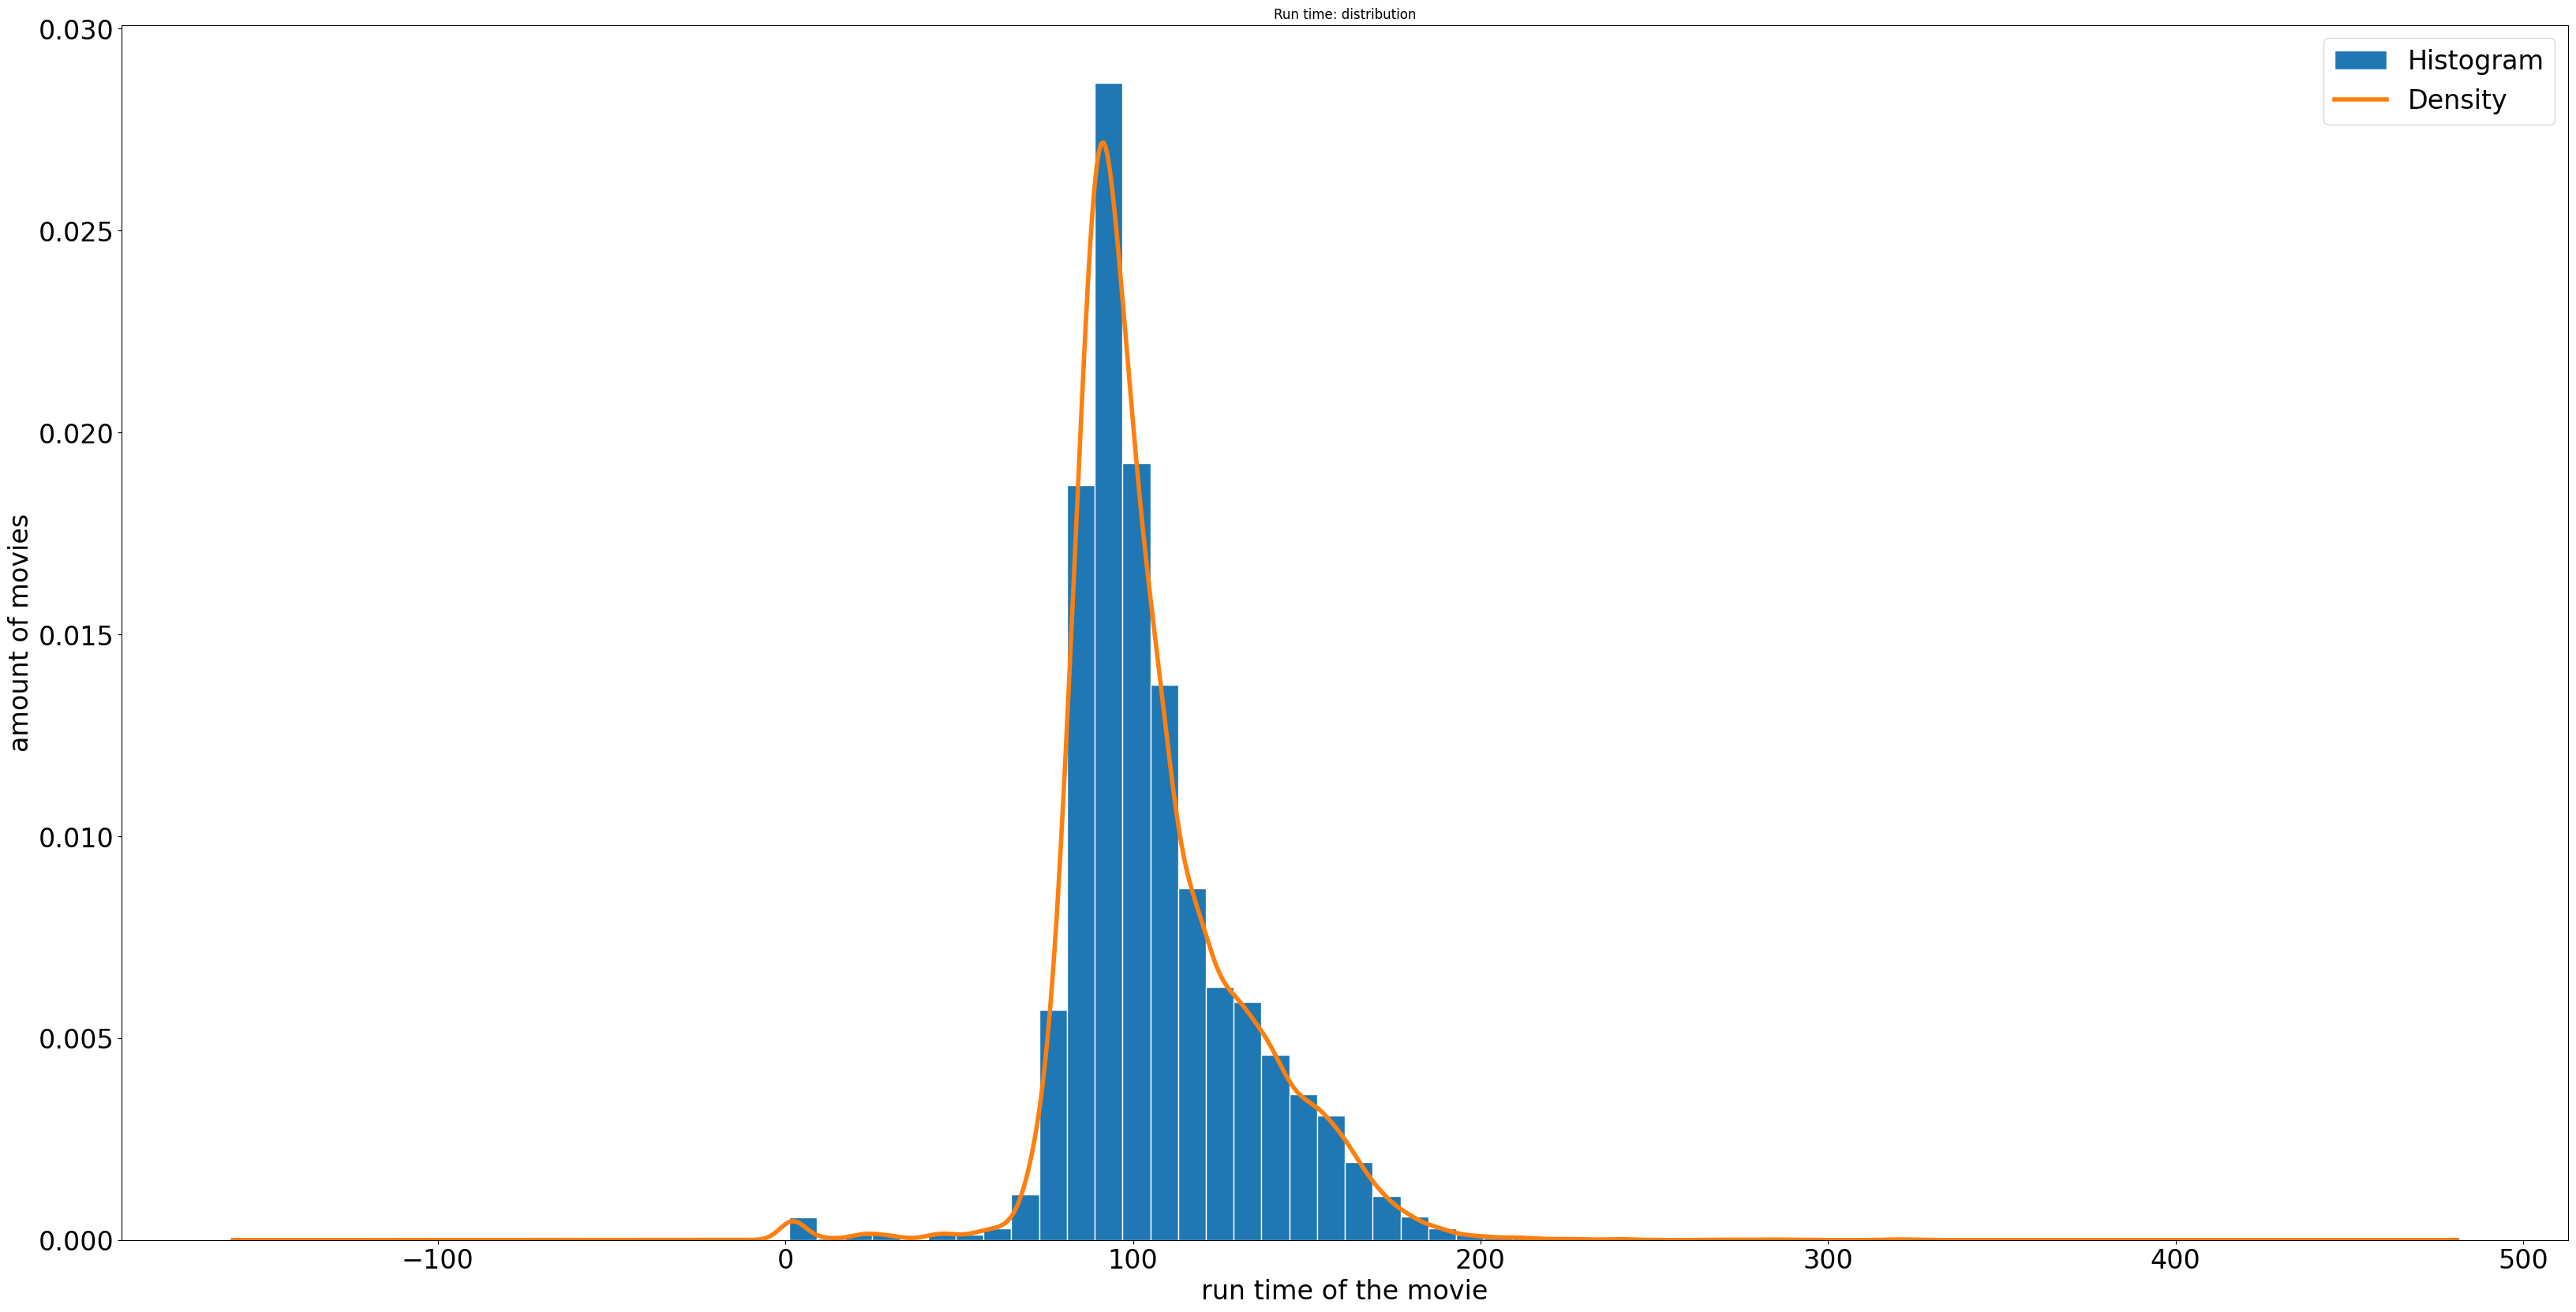

In [93]:
plt.figure(figsize=(40, 20))
plt.hist(mov_data['run_time'], bins=40, edgecolor='white', density=True, label='Histogram')
mov_data['run_time'].plot(kind='kde', label='Density', linewidth=4.0)
plt.title('Run time: distribution')
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel('amount of movies', fontsize=24)
plt.xlabel('run time of the movie', fontsize=24)
plt.legend(fontsize=24)
plt.show()

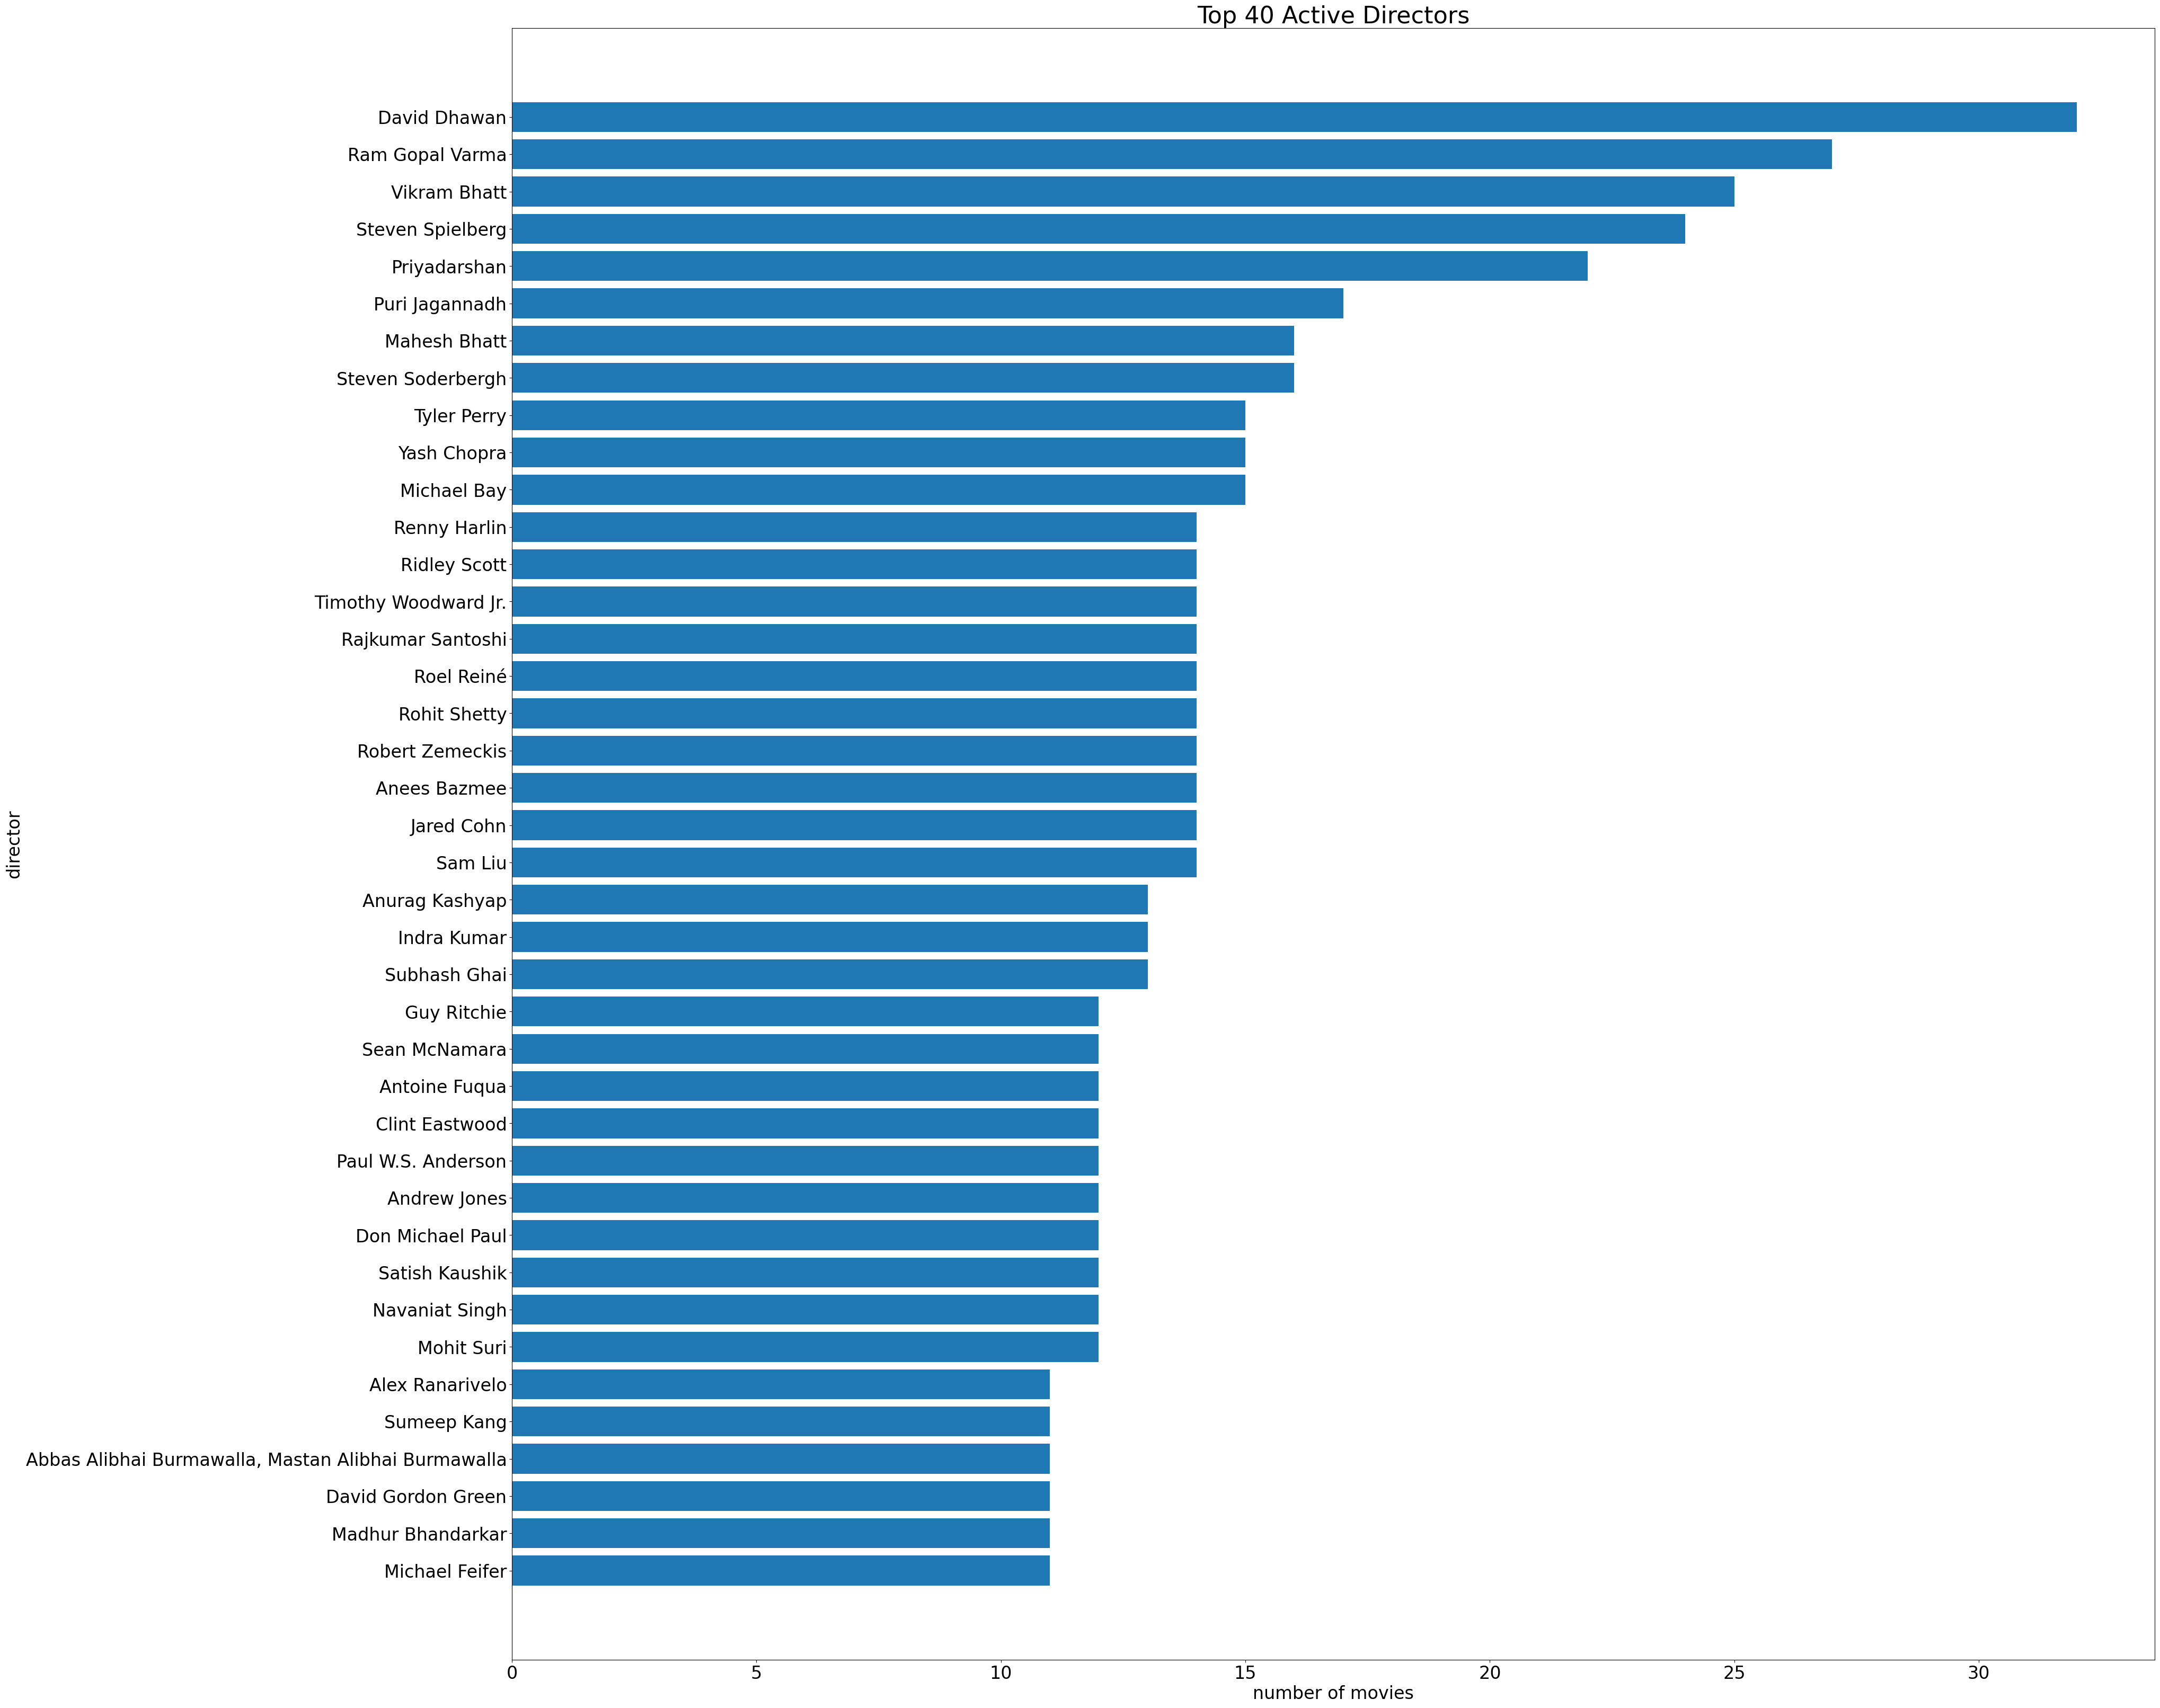

In [94]:
director_count = pd.DataFrame(mov_data['director'].value_counts()).sort_values(by='count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(director_count.tail(40).index, width=director_count['count'].tail(40))
plt.ylabel('director', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Top 40 Active Directors', fontsize=32, loc='center')
plt.show()

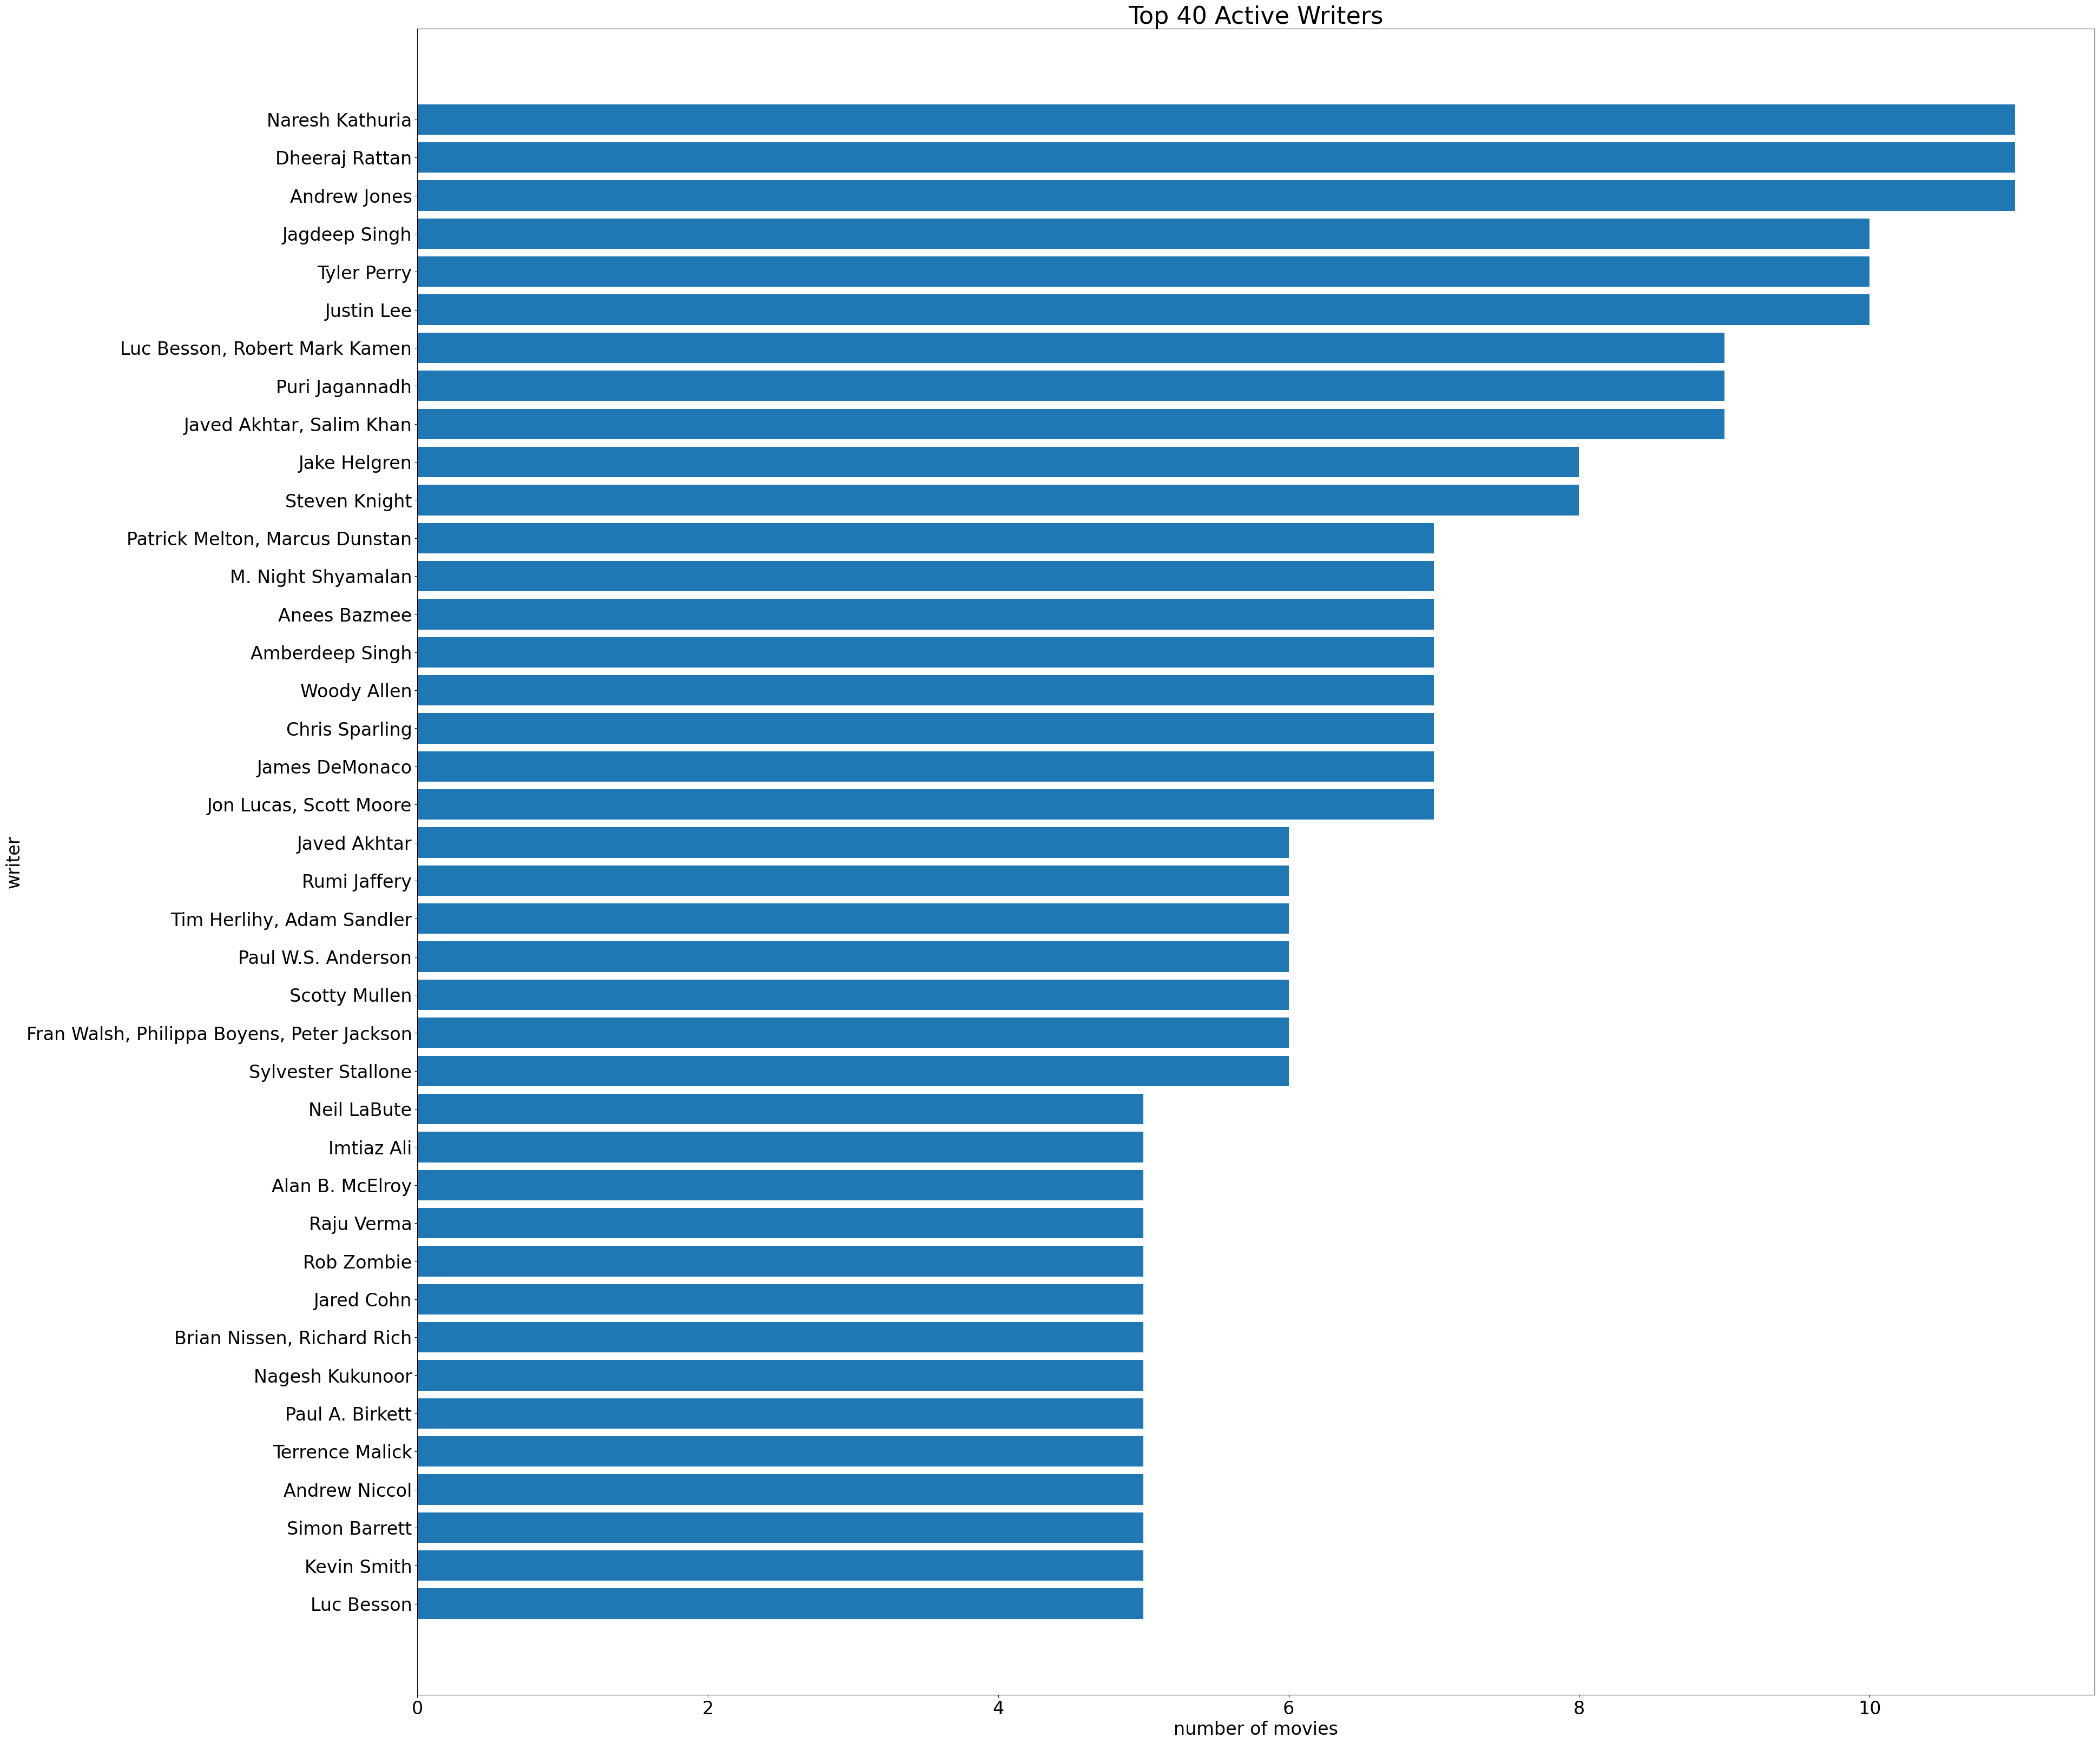

In [95]:
writer_count = pd.DataFrame(mov_data['writer'].value_counts()).sort_values(by='count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(writer_count.tail(40).index, width=writer_count['count'].tail(40))
plt.ylabel('writer', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Top 40 Active Writers', fontsize=32, loc='center')
plt.show()

In [96]:
operation_counts = pd.DataFrame(list(mov_data['views']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'view'
operation_counts

operation   counts
0          view   4442.0
1          view   1002.0
2          view  14419.0
3          view   7891.0
4          view   2438.0
...         ...      ...
17080      view   6908.0
17081      view   6077.0
17082      view  36022.0
17083      view  13829.0
17084      view   7220.0

[17085 rows x 2 columns]

In [97]:
operation_counts = pd.concat([operation_counts,pd.DataFrame([['download', c] for c in list(mov_data['downloads'])], columns=['operation', 'counts'])], ignore_index=True)
operation_counts

operation   counts
0          view   4442.0
1          view   1002.0
2          view  14419.0
3          view   7891.0
4          view   2438.0
...         ...      ...
34165  download   2433.0
34166  download   1932.0
34167  download  12284.0
34168  download   5625.0
34169  download   3276.0

[34170 rows x 2 columns]

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\3030749111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


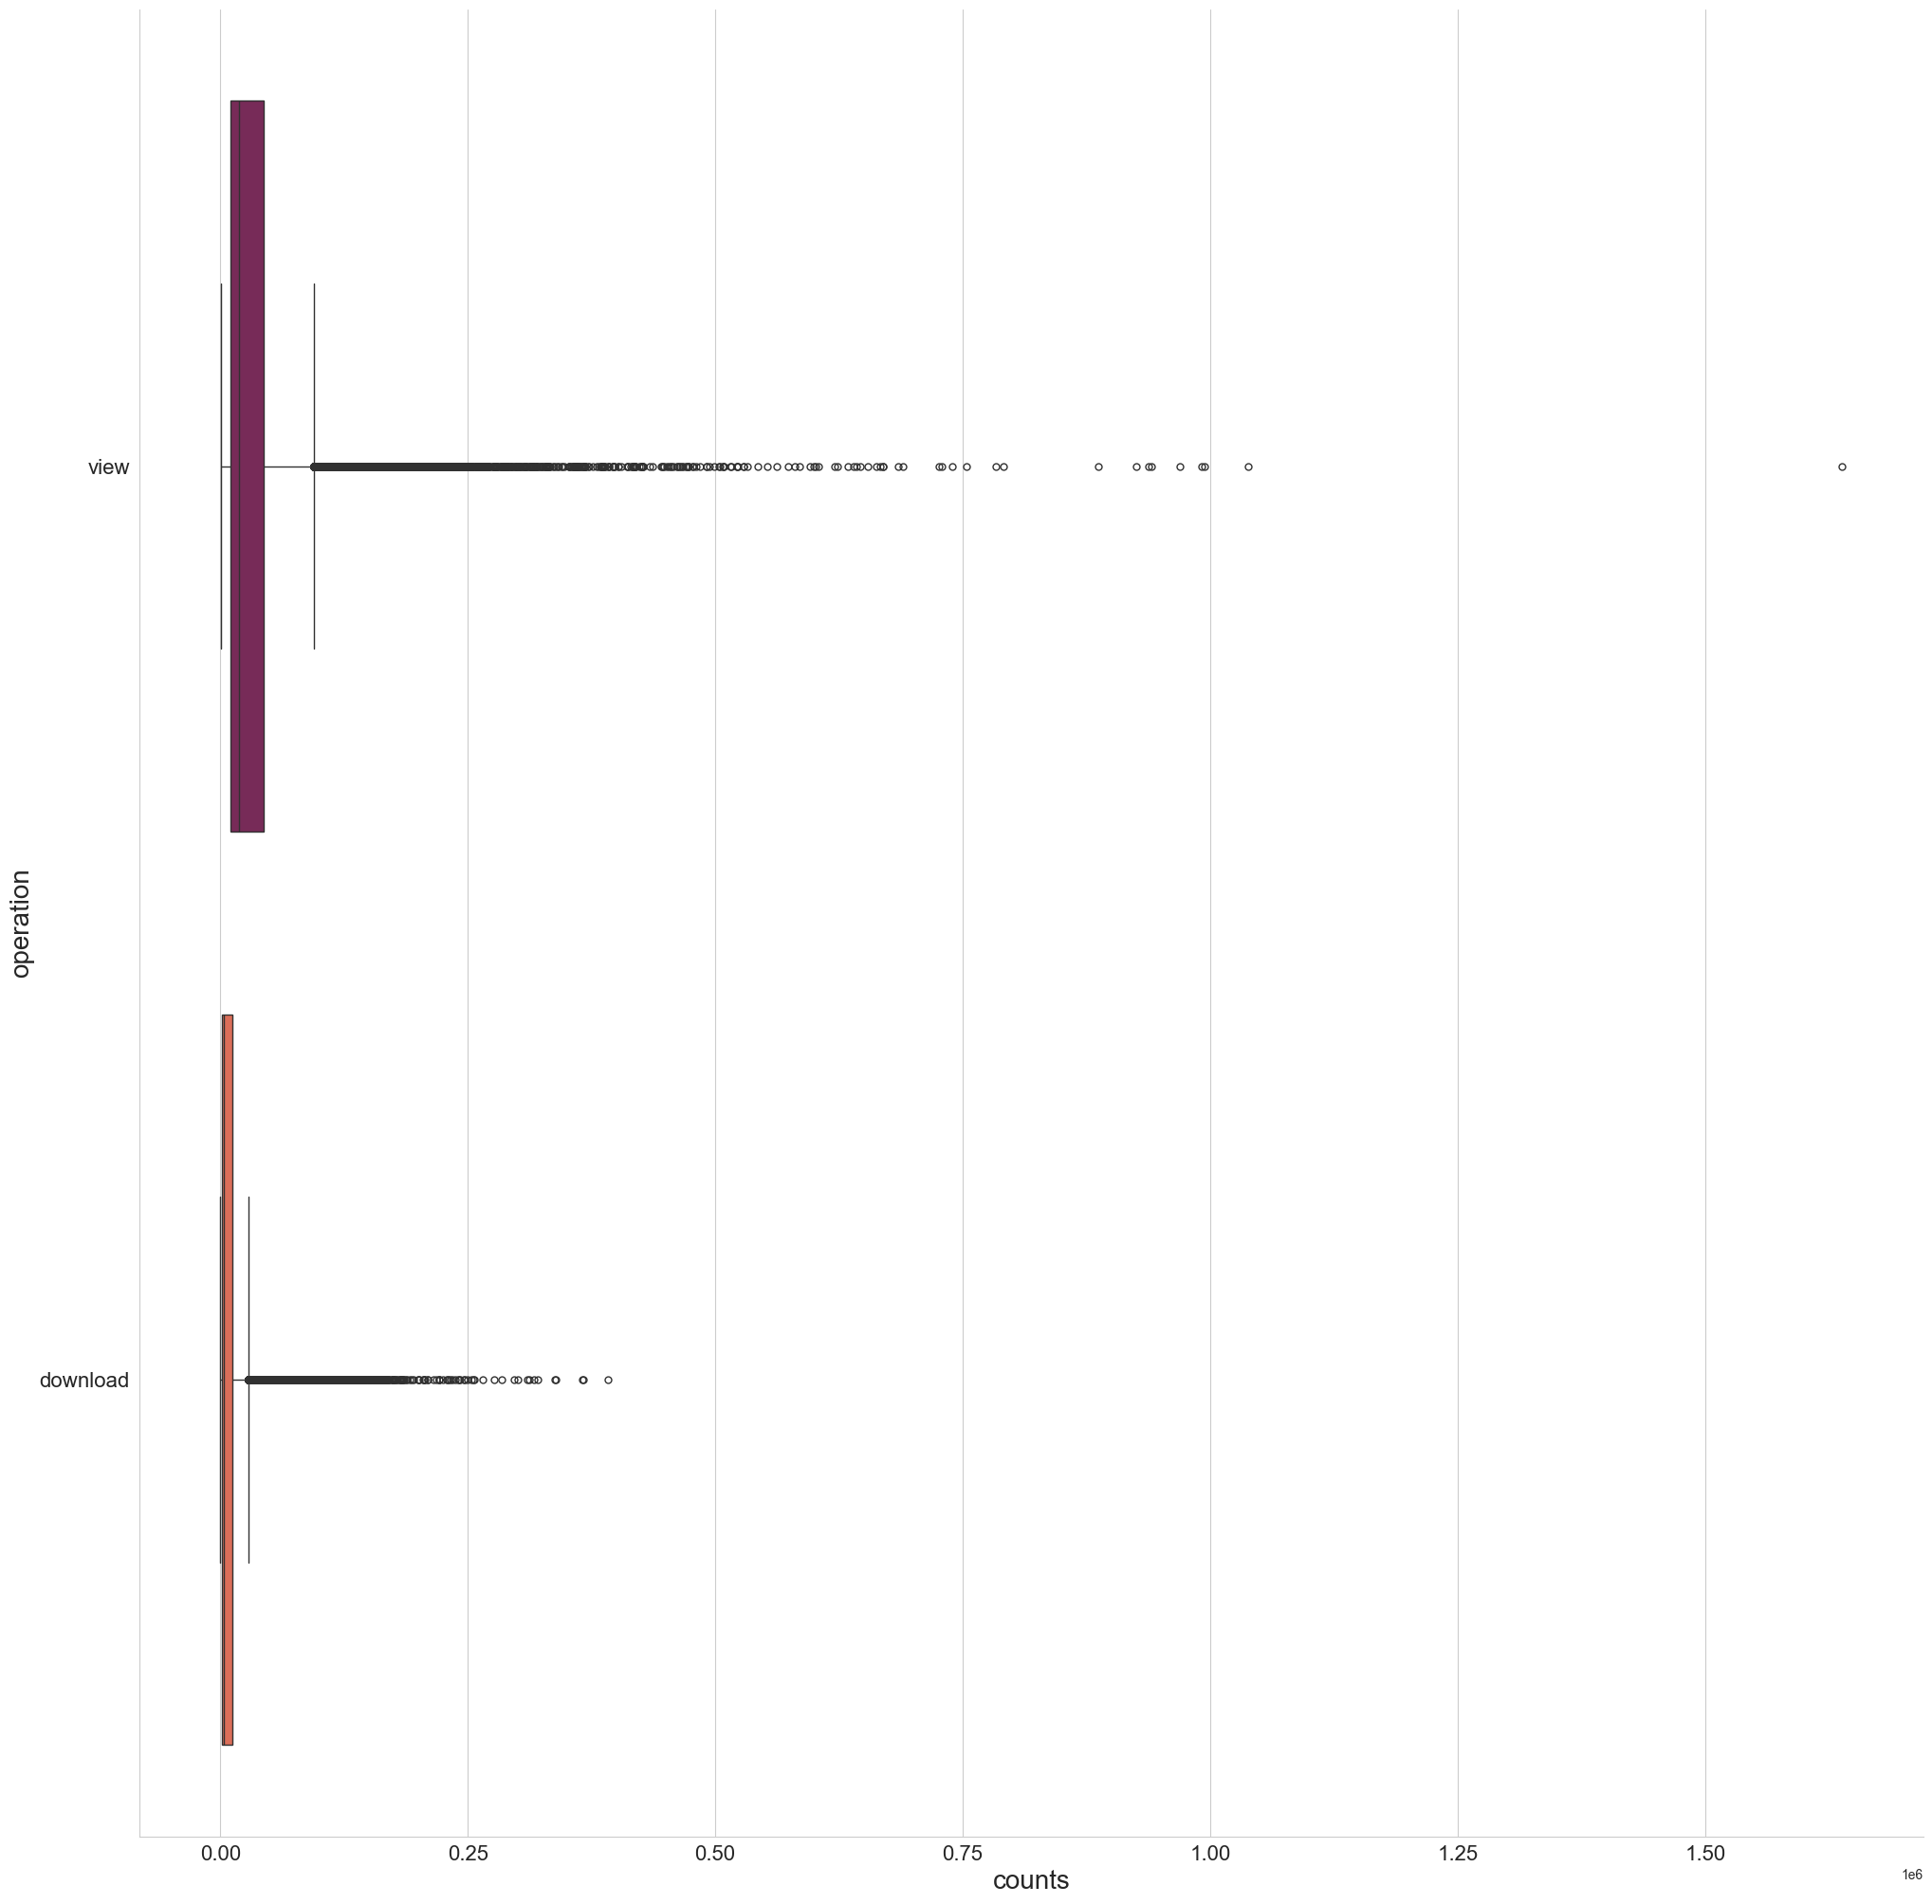

In [98]:
sns.set_style("whitegrid")
operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\2446489886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  operations_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket', showfliers=False)


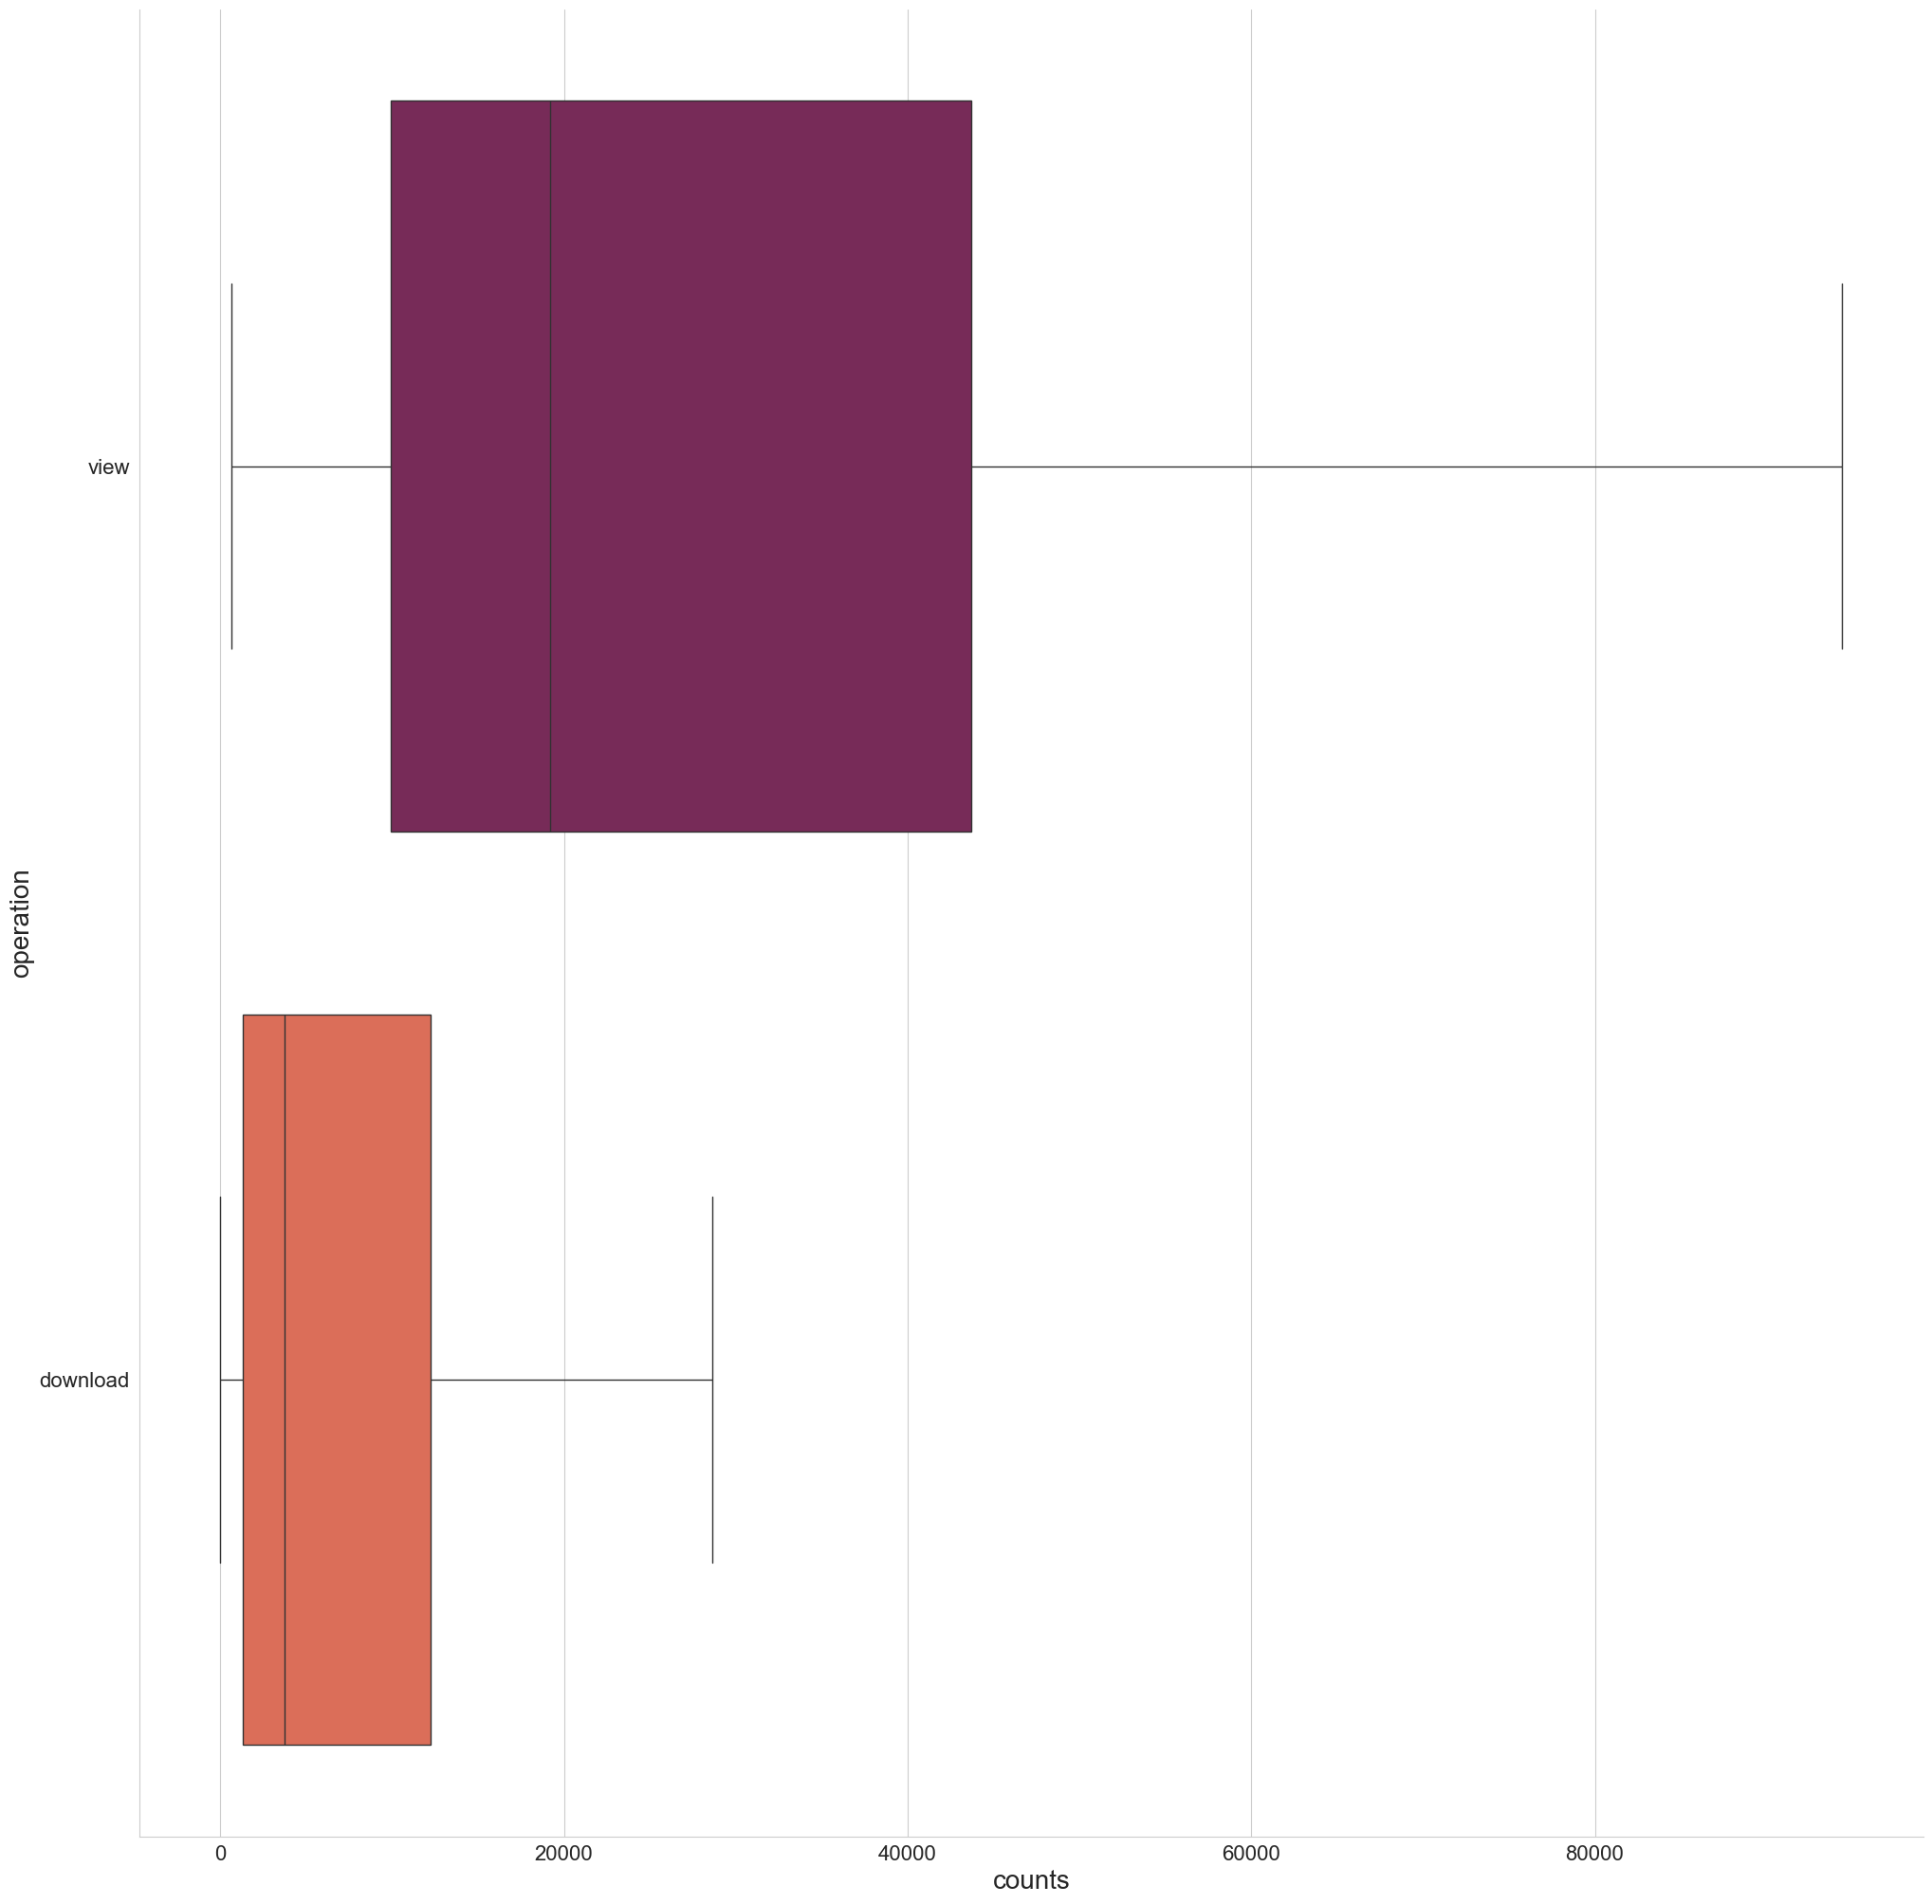

In [99]:
sns.set_style("whitegrid")
# No outliers
operations_count_box_no_outliers = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20, )
plt.xlabel('counts', fontsize=20)
plt.show()

In [100]:
IMDb_rating = pd.DataFrame(list(mov_data['IMDb-rating']), columns=['rate'])
IMDb_rating = pd.DataFrame(IMDb_rating, columns=['source', 'rate'])
IMDb_rating['source'] = 'IMDb'
IMDb_rating

source  rate
0       IMDb   4.8
1       IMDb   6.4
2       IMDb   5.2
3       IMDb   8.1
4       IMDb   4.6
...      ...   ...
17080   IMDb   7.8
17081   IMDb   7.1
17082   IMDb   5.6
17083   IMDb   7.9
17084   IMDb   8.0

[17085 rows x 2 columns]

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\1077408730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  rating_count_box = sns.catplot(data=IMDb_rating, kind='box', y='source', x='rate', height=20, palette='rocket')


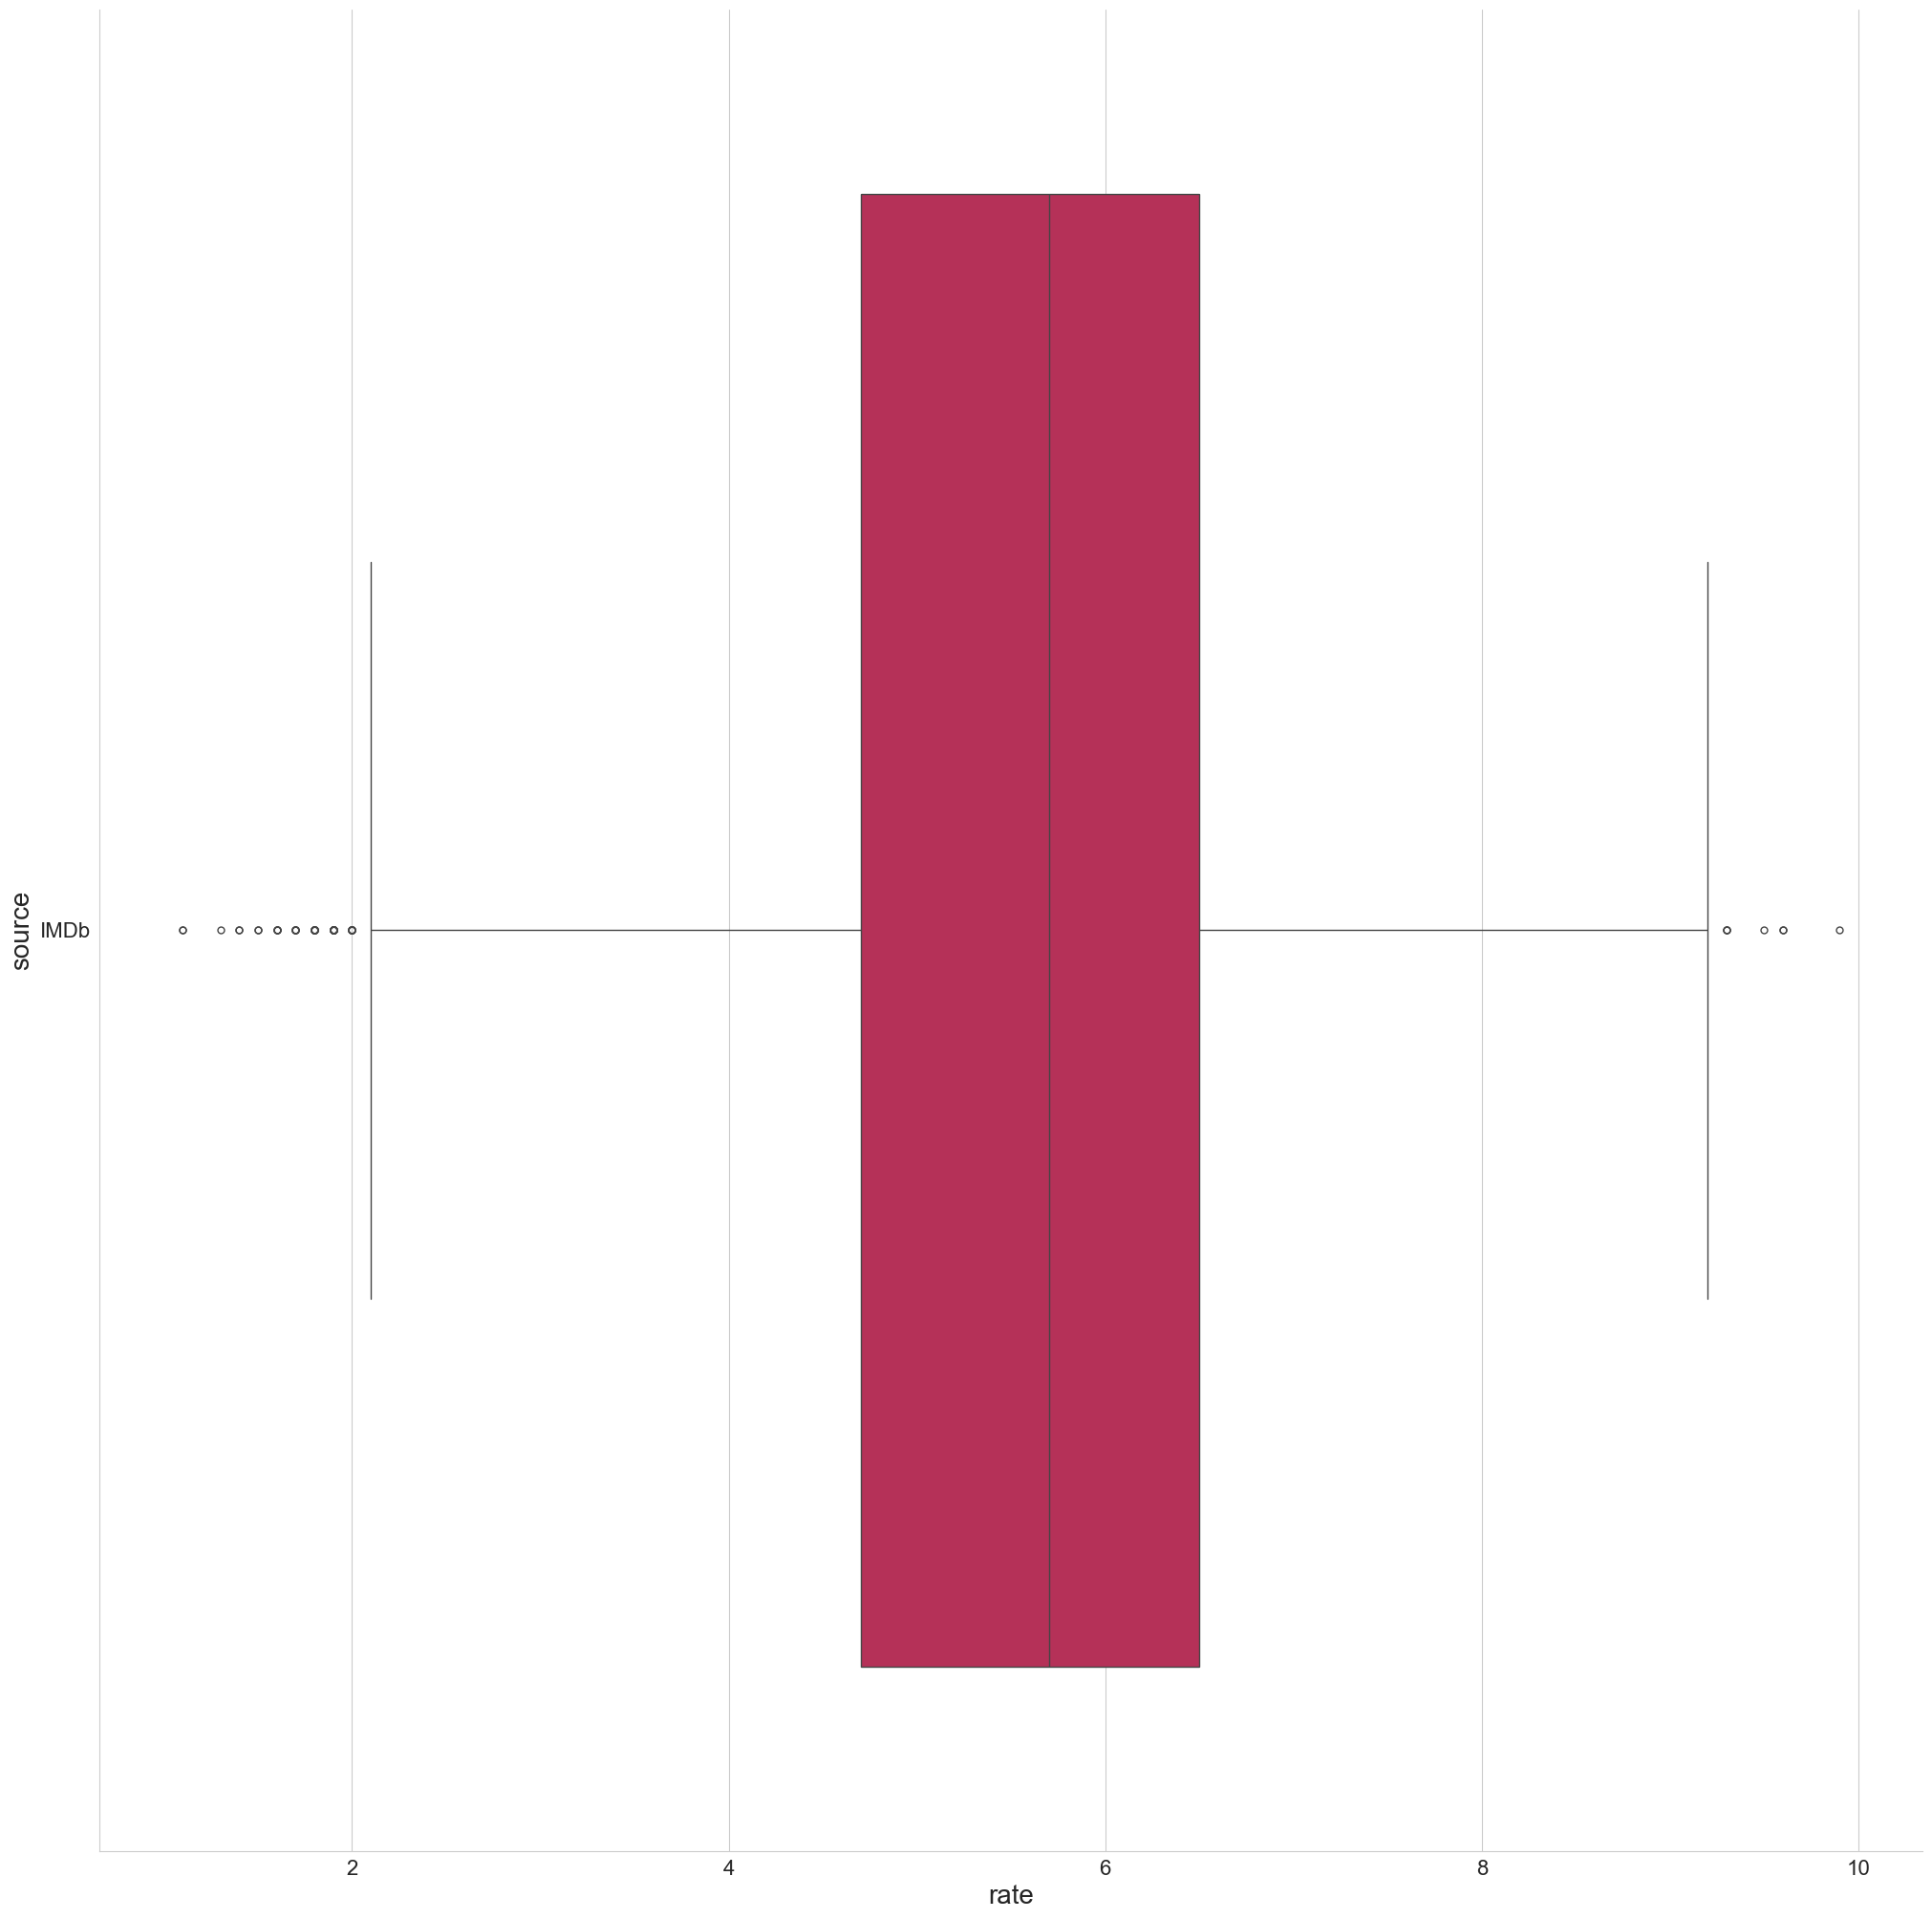

In [101]:
sns.set_style("whitegrid")
rating_count_box = sns.catplot(data=IMDb_rating, kind='box', y='source', x='rate', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('source', fontsize=20)
plt.xlabel('rate', fontsize=20)
plt.show()

## 3. Dealing With NaN

### NaN Analysis

First, let's have a review of the summary of the dataset, especially for the situation of the existence of NaN.

In [102]:
dtype_uni_miss(mov_data)

dtype  \
IMDb-rating             float64   
appropriate_for          object   
director                 object   
downloads               float64   
id                       object   
industry                 object   
language                 object   
posted_date      datetime64[ns]   
release_date     datetime64[ns]   
run_time                 object   
storyline                object   
title                    object   
views                   float64   
writer                   object   

                                                               eg.  \
IMDb-rating                                                    4.8   
appropriate_for                                                  R   
director                                                 John Swab   
downloads                                                    455.0   
id                                                          372092   
industry                                       Hollywood / English   
language                                                   English   
posted_date                                    2023-02-20 00:00:00   
release_date                                   2023-01-28 00:00:00   
run_time                                                       105   
storyline        Doc\r\n facilitates a fragile truce between th...   
title                                                 Little Dixie   
views                                                       4442.0   
writer                                                   John Swab   

                 num_unique null_share  
IMDb-rating              85      2.79%  
appropriate_for          20     42.59%  
director               9672      9.16%  
downloads             10479      0.00%  
id                    17085      0.00%  
industry                 10      0.00%  
language               1167      3.14%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                201      5.85%  
storyline             15748      7.73%  
title                 16572      0.00%  
views                 14747      0.00%  
writer                13603     10.65%

In [103]:
cols, nulls = [], []

for col in mov_data:
    cols.append(col)
    null = mov_data[col].isna().sum()
    nulls.append(null)
    
df = pd.DataFrame(nulls, index=cols, columns=['num_null']).T
df

IMDb-rating  appropriate_for  director  downloads  id  industry  \
num_null          477             7276      1565          0   0         0   

          language  posted_date  release_date  run_time  storyline  title  \
num_null       537            0             0       999       1321      0   

          views  writer  
num_null      0    1819

### Delete NaN

The dataset cleaned in this way is named to be ***mov_data_cleaned***.

In [104]:
from numpy import nan as NA

In [105]:
# Delete rows containing NaN
mov_data_cleaned = mov_data.dropna()
mov_data_cleaned

IMDb-rating appropriate_for  \
0              4.8               R   
1              6.4           TV-PG   
2              5.2               R   
7              6.5               R   
8              6.9           PG-13   
...            ...             ...   
20496          7.6        Approved   
20497          3.3               R   
20499          3.6       Not Rated   
20522          7.1       Not Rated   
20533          5.6               R   

                                            director  downloads      id  \
0                                          John Swab      455.0  372092   
1                                        Paul Ziller       73.0  372091   
2                                       Ben Wheatley     1427.0  343381   
7                                     Benjamin Caron     1781.0  371751   
8                                        Ravi Kapoor      458.0  372042   
...                                              ...        ...     ...   
20496  William Cottrell, David Hand, Wilfred Jackson    41145.0     920   
20497                     Sam Gorski, Niko Pueringer     9551.0     921   
20499                              Keith Alan Morris     8953.0     994   
20522                                      Biren Nag     1932.0   23825   
20533                      Barbara Topsøe-Rothenborg    12284.0    1173   

                  industry                language posted_date release_date  \
0      Hollywood / English                 English  2023-02-20   2023-01-28   
1      Hollywood / English                 English  2023-02-20   2023-02-05   
2      Hollywood / English           English,Hindi  2021-04-20   2021-06-18   
7      Hollywood / English                 English  2023-02-13   2023-02-17   
8      Hollywood / English                 English  2023-02-18   2022-12-02   
...                    ...                     ...         ...          ...   
20496         Anime / Kids                 English  1970-01-01   1938-02-03   
20497  Hollywood / English                 English  1970-01-01   1970-01-01   
20499  Hollywood / English                 English  1970-01-01   1970-01-01   
20522   Bollywood / Indian                   Hindi  1970-01-01   1962-05-11   
20533  Hollywood / English  Spanish,German,English  2016-05-26   1970-01-01   

      run_time                                          storyline  \
0          105  Doc\r\n facilitates a fragile truce between th...   
1           84  Caterer\r\n Goldy Berry reunites with detectiv...   
2          107  As the world searches for a cure to a disastro...   
7          116  Motivations are suspect, and expectations are ...   
8           80  An\r\n unmotivated South Asian American rapper...   
...        ...                                                ...   
20496       83  The first, and by far most memorable full-leng...   
20497       87  After losing contact with its researchers on a...   
20499       98  Gutter King is an urban coming-of-age fight dr...   
20522      158  After a lusty Thakur rapes a young girl, she k...   
20533       90  LOVE AT FIRST HICCUP is a charming, innocent, ...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
7                                         Sharper  18225.0   
8                                    Four Samosas   6912.0   
...                                           ...      ...   
20496             Snow White and the Seven Dwarfs  66860.0   
20497                                 Dark Island  25581.0   
20499                                 Gutter King  33431.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   

                                                  writer  
0                                              John Swab  
1       

We can see that the previous 17,086 rows now only left 8,650 rows.

Since the null share of the attribute `apppriate_for` is up to 42.59%, drop all of these data is not reasonable. Here we show the difference between the dataset ***mov_data*** and the dataset ***mov_data_cleaned***:

In [106]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).sort_values(by='count', ascending=True)

In [107]:
'18+' in list(mov_data_cleaned['appropriate_for'].value_counts().index)

True

In [108]:
appropriate_count_cleaned = appropriate_count
appropriate_count_cleaned['appropriate_count_cleaned'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_cleaned['appropriate_for'].value_counts().index):
        appropriate_count_cleaned.loc[[level], ['appropriate_count_cleaned']] = mov_data_cleaned['appropriate_for'].value_counts().loc[[level]].values[0]

In [109]:
appropriate_count_cleaned

count  appropriate_count_cleaned
appropriate_for                                  
18+                  1                          1
Drama                1                          0
TV-13                1                          1
MA-17                1                          1
Drama, Romance       1                          1
Passed               3                          3
TV-Y7-FV             3                          2
NC-17                4                          4
Approved             9                          7
TV-Y                25                         15
TV-Y7               44                         35
TV-G                99                         85
TV-PG              115                         88
G                  140                        109
TV-14              293                        263
TV-MA              406                        384
PG                 884                        769
PG-13             1763                       1584
Not Rated         2264                       2052
R                 3752                       3246

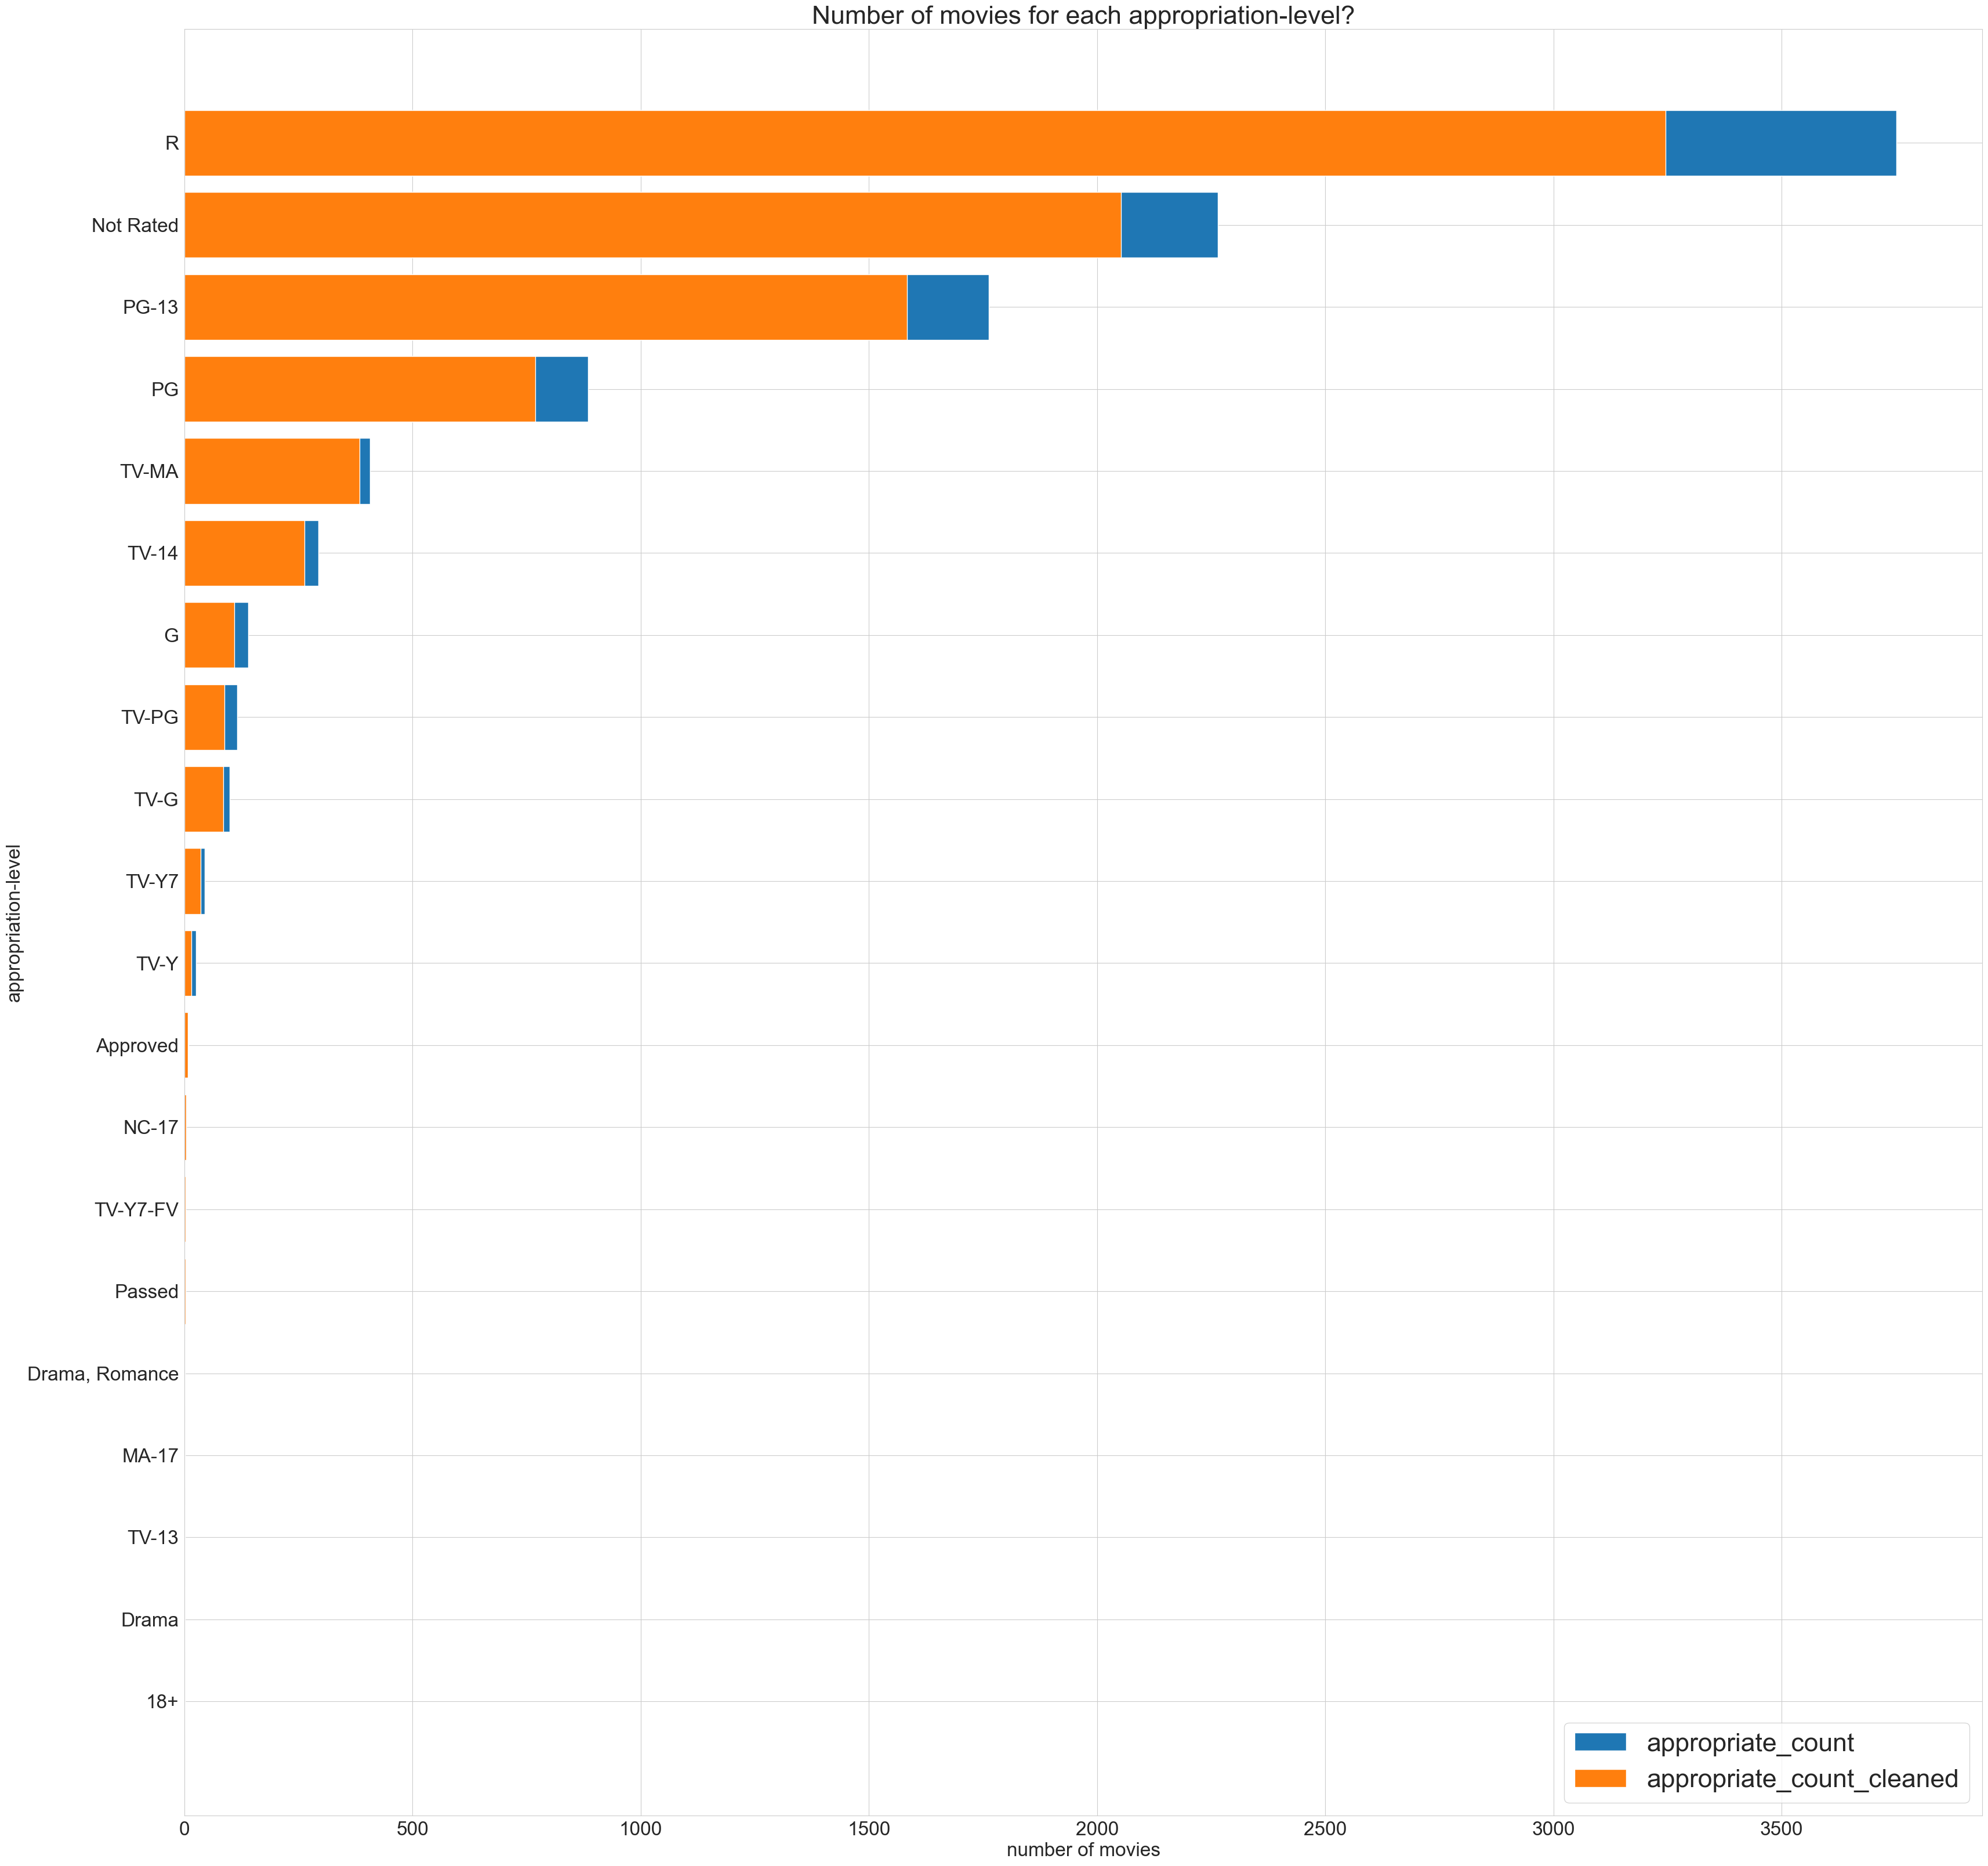

In [110]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count_cleaned.index, width=appropriate_count_cleaned['count'], label='appropriate_count')
plt.barh(appropriate_count_cleaned.index, width=appropriate_count_cleaned['appropriate_count_cleaned'], label='appropriate_count_cleaned')
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

The distribution slightly changes. However, the drop of data with missing `appropriate_for` have more significant effect on the distribution of other attributes.

In [111]:
(mov_data_cleaned['language']).iloc[2]

'English,Hindi'

In [112]:
mov_language_cleaned = mov_data_cleaned['language'].astype('str')
for i in range(len(mov_language_cleaned)):
    mov_language_cleaned.iloc[i] = mov_language_cleaned.iloc[i].split(',')
    for j in range(len(mov_language_cleaned.iloc[i])):
        mov_language_cleaned.iloc[i][j] = mov_language_cleaned.iloc[i][j].lstrip(' ')

mov_language_dict_cleaned = {}

for i in range(len(mov_language_cleaned)):
    for j in range(len(mov_language_cleaned.iloc[i])):
        if mov_language_cleaned.iloc[i][j] not in mov_language_dict_cleaned:
            mov_language_dict_cleaned['{}'.format(mov_language_cleaned.iloc[i][j])] = 0
        mov_language_dict_cleaned['{}'.format(mov_language_cleaned.iloc[i][j])] += 1
mov_language_dict_cleaned = dict(sorted(mov_language_dict_cleaned.items(), key=lambda x: x[1]))
# mov_language_dict_cleaned

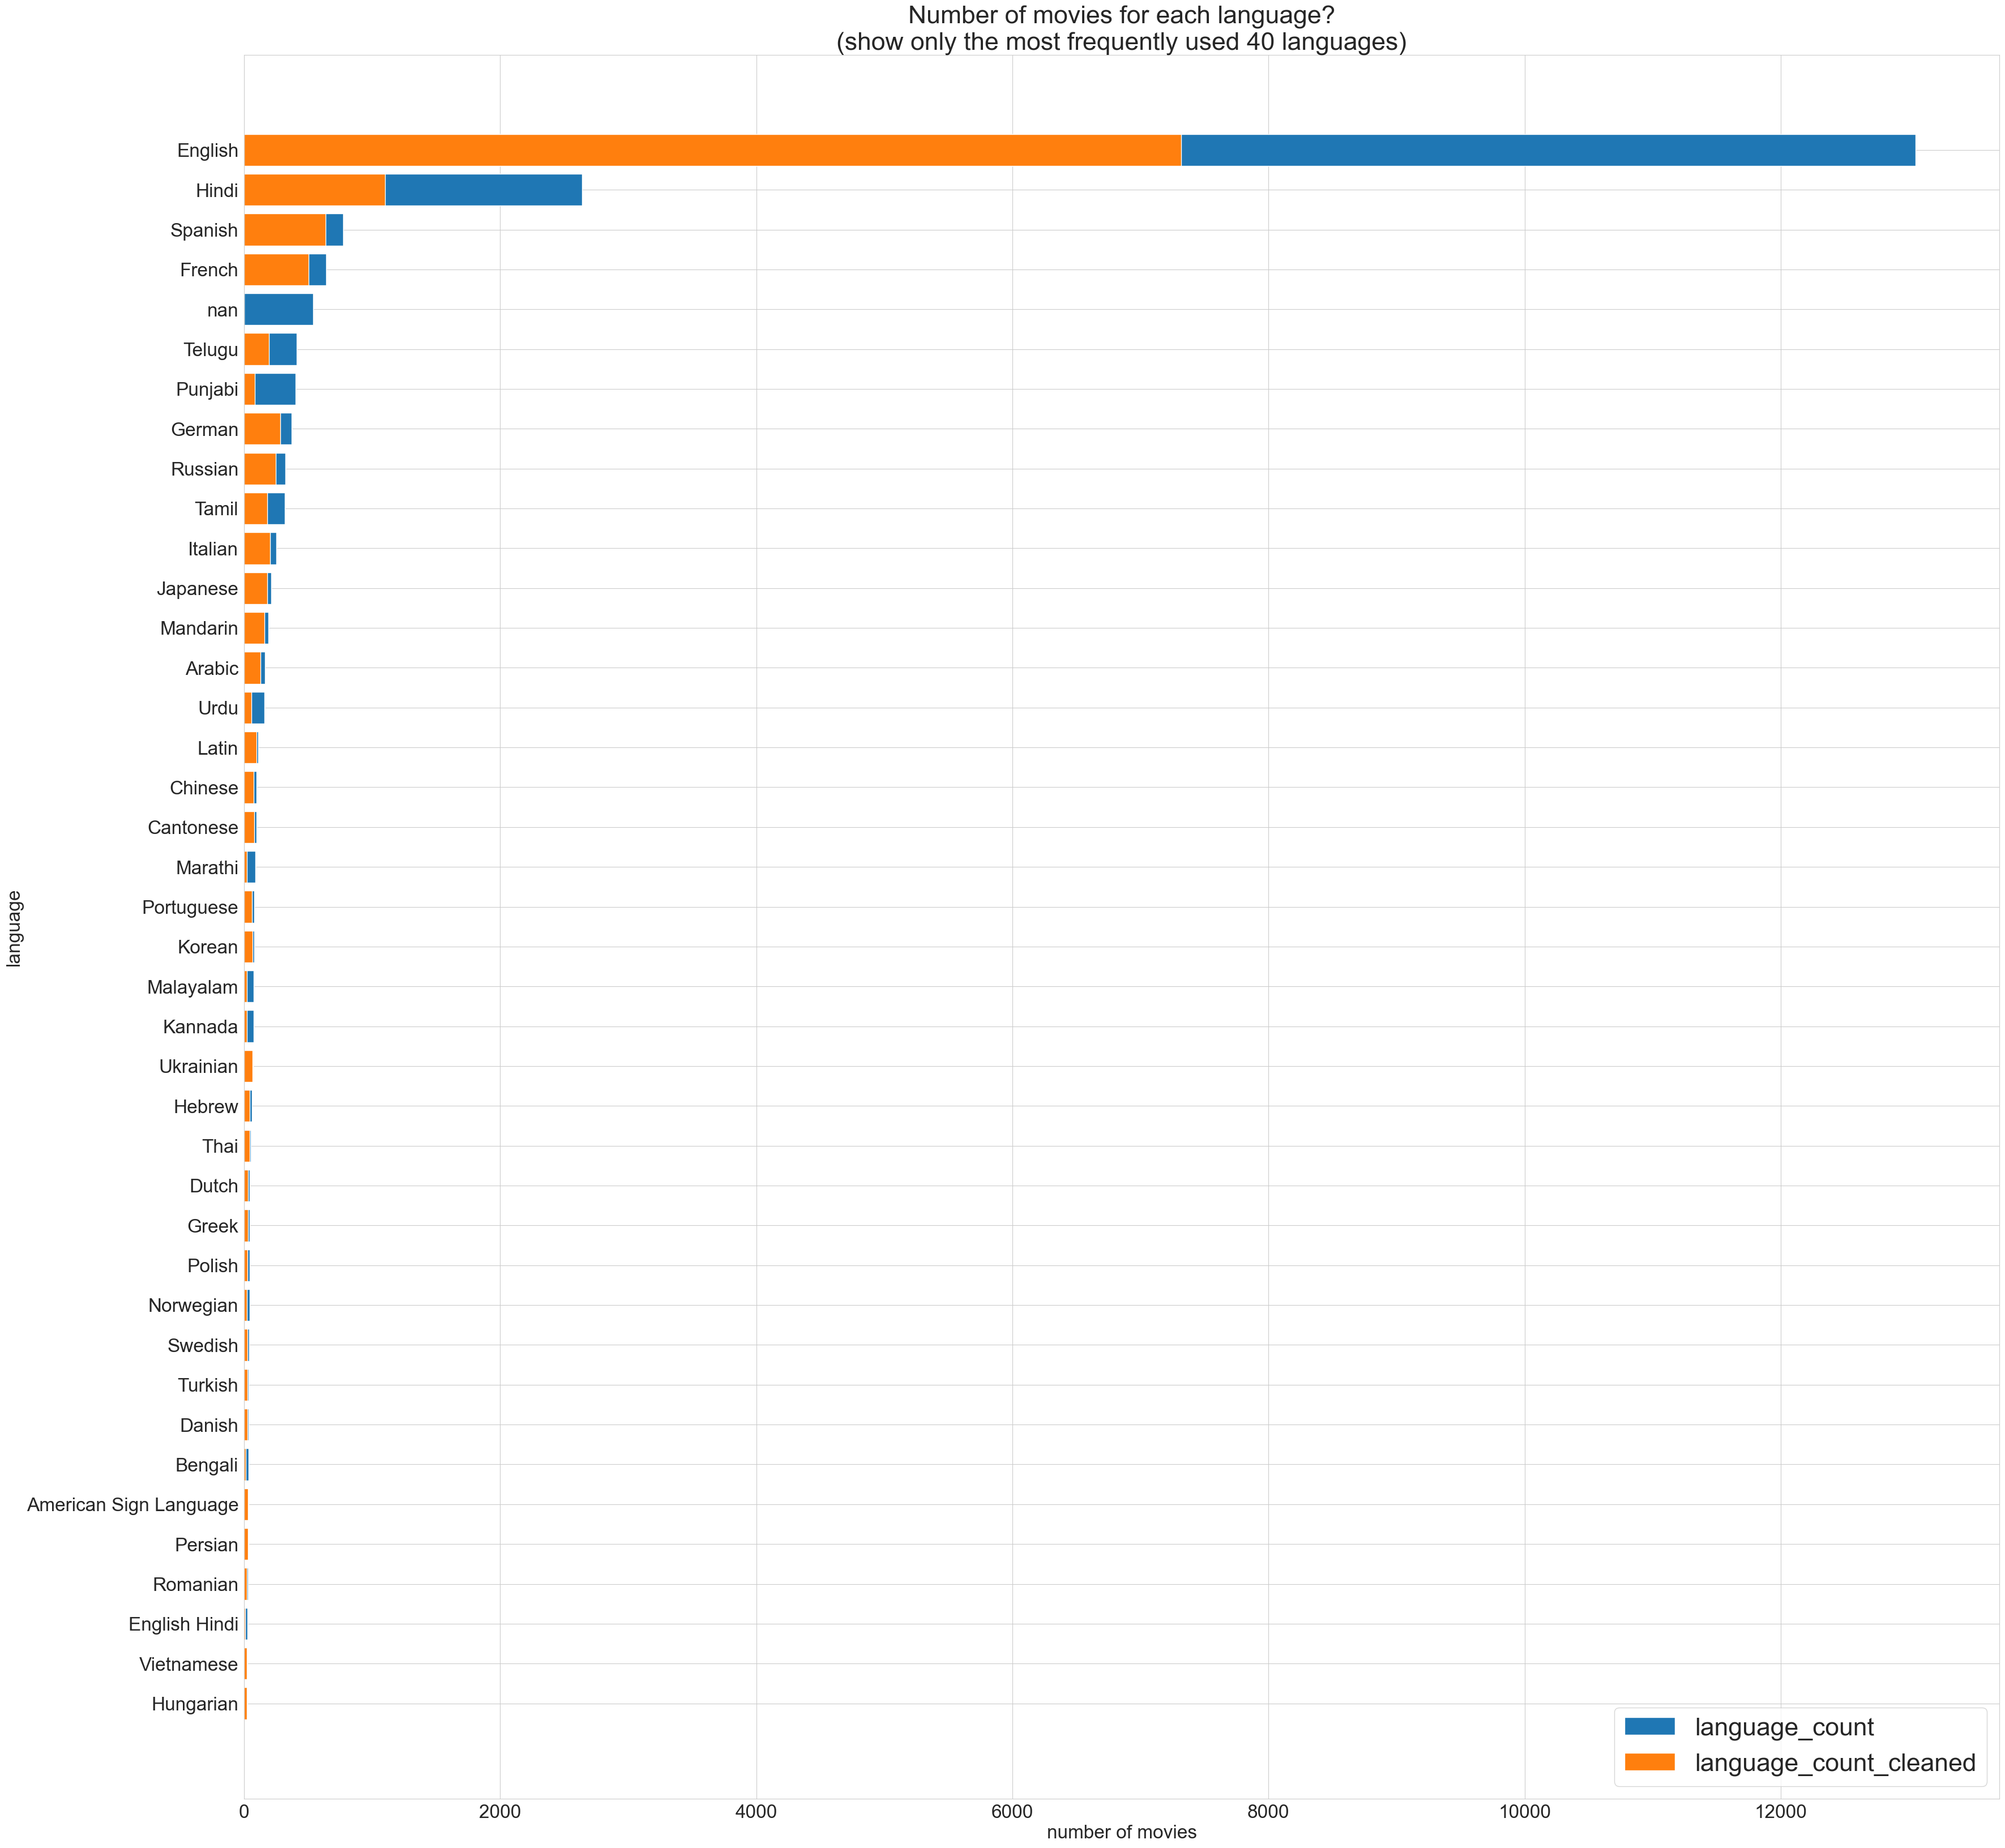

In [113]:
mov_language_dict_cleaned_sorted = {}
for language in list(mov_language_dict.keys()):
    mov_language_dict_cleaned_sorted[language] = 0
    if language in list(mov_language_dict_cleaned.keys()):
        mov_language_dict_cleaned_sorted[language] = mov_language_dict_cleaned[language]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict.values())[-40:], label='language_count')
plt.barh(list(mov_language_dict.keys())[-40:], width=list(mov_language_dict_cleaned_sorted.values())[-40:], label='language_count_cleaned')
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each language?\n(show only the most frequently used 40 languages)', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

In [114]:
mov_data[mov_data['appropriate_for'].isna()]['industry'].value_counts()

industry
Hollywood / English    4661
Bollywood / Indian     1339
Tollywood               425
Punjabi                 291
Anime / Kids            285
Stage shows             124
Pakistani                82
Wrestling                65
Dub / Dual Audio          4
Name: count, dtype: int64

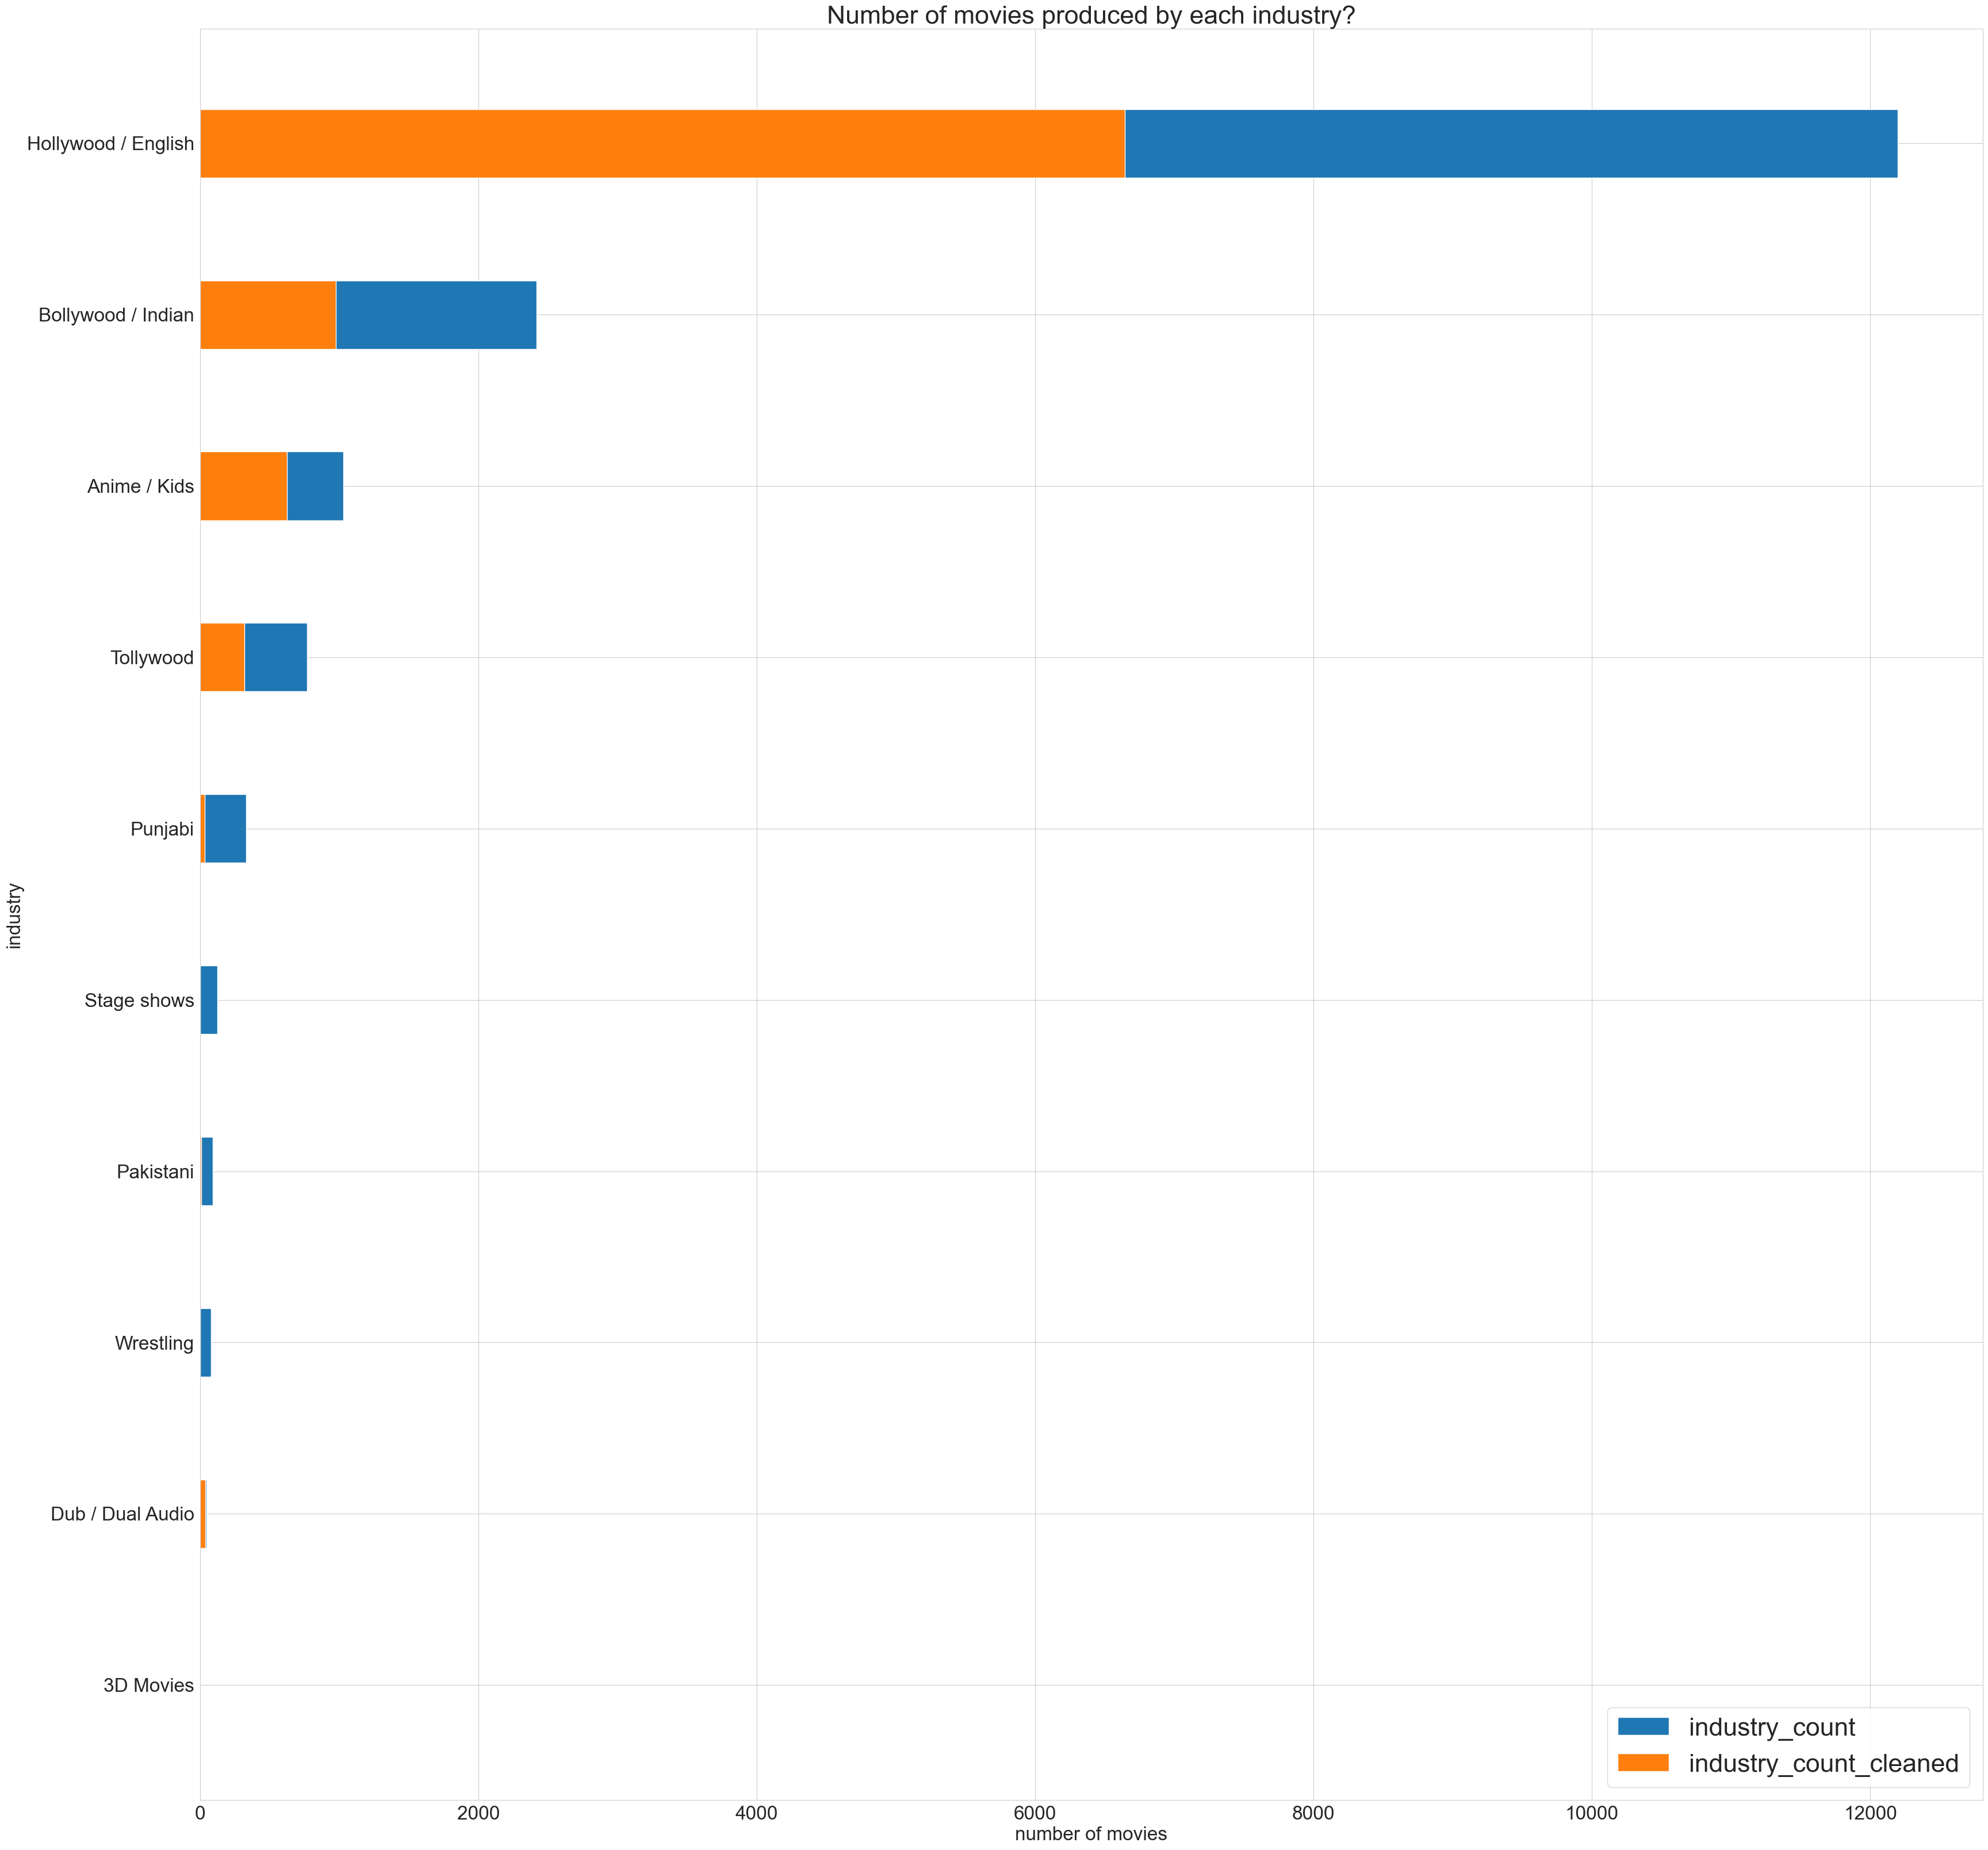

In [115]:
industry_count_cleaned = industry_count
industry_count_cleaned['industry_count_cleaned'] = [0] * len(industry_count)

for level in list(industry_count.index):
    if level in list(mov_data_cleaned['industry'].value_counts().index):
        industry_count_cleaned.loc[[level], ['industry_count_cleaned']] = mov_data_cleaned['industry'].value_counts().loc[[level]].values[0]

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(industry_count_cleaned.index, width=industry_count_cleaned['count'], height = 0.4, label='industry_count')
plt.barh(industry_count_cleaned.index, width=industry_count_cleaned['industry_count_cleaned'], height = 0.4, label='industry_count_cleaned')
plt.ylabel('industry', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies produced by each industry?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

Other attributes can be tested in the same way. We can see from these comparison that the value with the highest frequency droped significantly, thus, simply dropping the NaN which will greatly change the distribution of the value is dot a good idea.

In [116]:
mov_data['appropriate_for'].isna().sum()

7276

### Replace NaN with the Value of the Highest Frequency

The dataset cleaned in this way is named to be ***mov_data_HF_replaced***.

In [117]:
import copy
HF = {}
mov_data_HF_replaced = copy.deepcopy(mov_data)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'

HF

{'IMDb-rating': 6.2,
 'appropriate_for': 'R',
 'director': 'David Dhawan',
 'downloads': 0.0,
 'id': '372092',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': Timestamp('1970-01-01 00:00:00'),
 'release_date': Timestamp('1970-01-01 00:00:00'),
 'run_time': 90,
 'storyline': 'A young couple awakens a terrible force when they attempt to socialize their reclusive neighbor.',
 'title': 'Pinocchio',
 'views': 12350.0,
 'writer': 'Naresh Kathuria'}

In [118]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\3176274652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])


IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [119]:
mov_data_HF_replaced.head(10)

IMDb-rating appropriate_for            director  downloads      id  \
0          4.8               R           John Swab      455.0  372092   
1          6.4           TV-PG         Paul Ziller       73.0  372091   
2          5.2               R        Ben Wheatley     1427.0  343381   
3          8.1               R        Venky Atluri     2379.0  372090   
4          4.6               R        Shaji Kailas      657.0  372089   
5          5.4               R  Srinivas Gavireddy      746.0  372088   
6          6.2           TV-PG        David Dhawan     5332.0  372059   
7          6.5               R      Benjamin Caron     1781.0  371751   
8          6.9           PG-13         Ravi Kapoor      458.0  372042   
9          4.2               R        Danny LeGare     1965.0  372041   

              industry       language posted_date release_date  run_time  \
0  Hollywood / English        English  2023-02-20   2023-01-28       105   
1  Hollywood / English        English  2023-02-20   2023-02-05        84   
2  Hollywood / English  English,Hindi  2021-04-20   2021-06-18       107   
3            Tollywood          Hindi  2023-02-20   2023-02-17       139   
4            Tollywood          Hindi  2023-02-20   2023-01-26       122   
5            Tollywood          Hindi  2023-02-20   2021-11-26       131   
6            Wrestling        English  2023-02-19   2023-02-18       200   
7  Hollywood / English        English  2023-02-13   2023-02-17       116   
8  Hollywood / English        English  2023-02-18   2022-12-02        80   
9  Hollywood / English        English  2023-02-18   2023-02-07        80   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   
5  Bagaram,\r\n after inheriting his grandfather'...   
6  Undisputed\r\n WWE Universal title: Reigns vs ...   
7  Motivations are suspect, and expectations are ...   
8  An\r\n unmotivated South Asian American rapper...   
9  A\r\n family moves back to a farm in the mothe...   

                                        title    views  \
0                                Little Dixie   4442.0   
1  Grilling Season: A Curious Caterer Mystery   1002.0   
2                                In the Earth  14419.0   
3                                      Vaathi   7891.0   
4                                       Alone   2438.0   
5                           Anubhavinchu Raja   2940.0   
6                     WWE Elimination Chamber  11978.0   
7                                     Sharper  18225.0   
8                                Four Samosas   6912.0   
9                               Blood Harvest   9710.0   

                                          writer  
0                                      John Swab  
1                         John Christian Plummer  
2                                   Ben Wheatley  
3                                   Venky Atluri  
4                               Rajesh Jayaraman  
5             Srinivas Gavireddy, Mayukh Adithya  
6                                Naresh Kathuria  
7              Brian Gatewood, Alessandro Tanaka  
8                                    Ravi Kapoor  
9  Michael Hultquist, Danny LeGare, Seth Metoyer

In [120]:
mov_data_HF_replaced['appropriate_for'].value_counts()

appropriate_for
R                 11028
Not Rated          2264
PG-13              1763
PG                  884
TV-MA               406
TV-14               293
G                   140
TV-PG               115
TV-G                 99
TV-Y7                44
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: count, dtype: int64

To see whether this method is good or not, we again have a look at the distribution of several attributes.

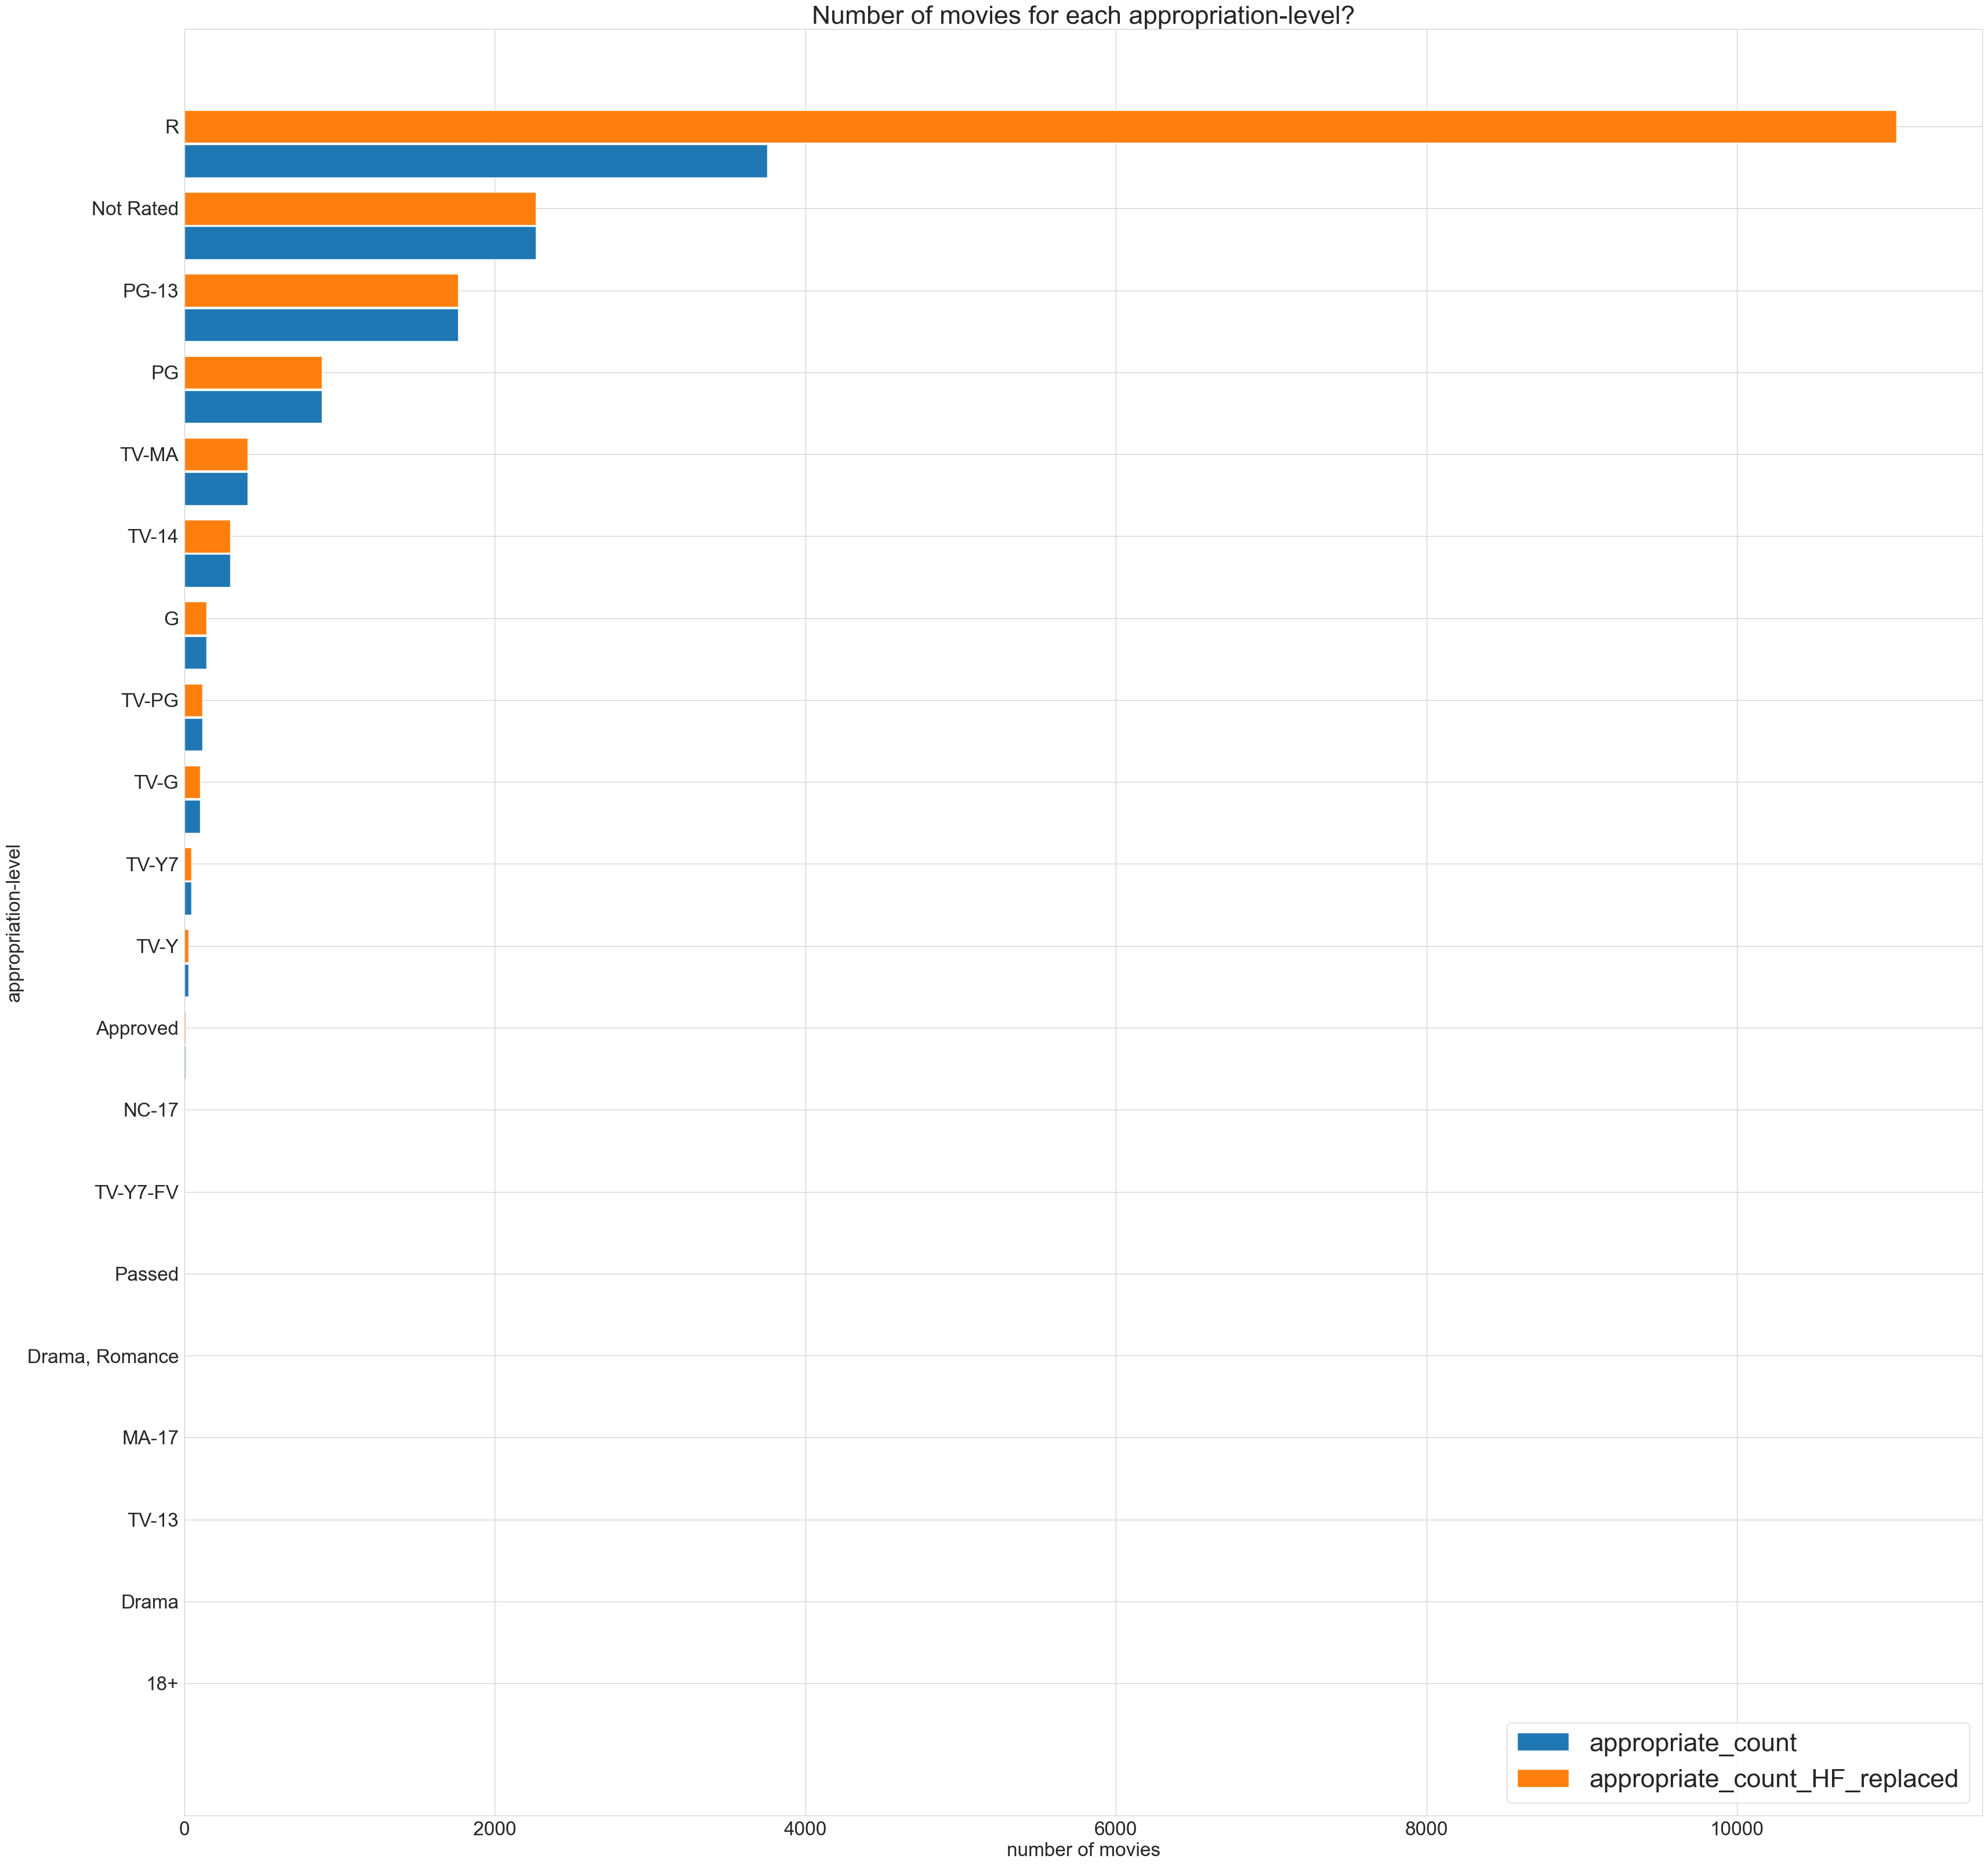

In [121]:
appropriate_count_HF_replaced = appropriate_count
appropriate_count_HF_replaced['appropriate_count_HF_replaced'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_HF_replaced['appropriate_for'].value_counts().index):
        appropriate_count_HF_replaced.loc[[level], ['appropriate_count_HF_replaced']] = mov_data_HF_replaced['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_HF_replaced))), tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_HF_replaced)))], tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['appropriate_count_HF_replaced'], label='appropriate_count_HF_replaced', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

Since for each attribute in the dataset, we have found out that the value with the highest frequency is already too much larger than the second, this method will make that value further more frequent. It seems like that this is not a good idea, but we have to notice that except for `appropriate`, other attributes don't have large null share. Thus, the distribution of other attributes change less significantly than implementing the *.isna().drop()* method.

### Substitute NaN Regarding to the Correlationships Between Attributes

The dataset cleaned in this way is named to be ***mov_data_attr_corr***.

Most of the attributes have missing data. Thus, we should only use the attributes that have few NaN as the basis. The good choice is `views` and `downloads`. We can also use `industry`, `language`, `posted_date`, `release_date`, and `title` to calculate correlations with other attributes, but according to our experience, these seems to be not that correlated with `appropriate_for`. While considering the `writer` and `director`, we may consider more about `language` because according to the experience, these can be most correlated.

In [122]:
mov_data_attr_corr = copy.deepcopy(mov_data)

In [123]:
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

IMDb-rating      director  downloads      id             industry  \
0          4.8     John Swab      455.0  372092  Hollywood / English   
1          6.4   Paul Ziller       73.0  372091  Hollywood / English   
2          5.2  Ben Wheatley     1427.0  343381  Hollywood / English   
3          8.1  Venky Atluri     2379.0  372090            Tollywood   
4          4.6  Shaji Kailas      657.0  372089            Tollywood   

        language posted_date release_date run_time  \
0        English  2023-02-20   2023-01-28      105   
1        English  2023-02-20   2023-02-05       84   
2  English,Hindi  2021-04-20   2021-06-18      107   
3          Hindi  2023-02-20   2023-02-17      139   
4          Hindi  2023-02-20   2023-01-26      122   

                                           storyline  ... appropriate_for_R  \
0  Doc\r\n facilitates a fragile truce between th...  ...              True   
1  Caterer\r\n Goldy Berry reunites with detectiv...  ...             False   
2  As the world searches for a cure to a disastro...  ...              True   
3  The life of a young man and his struggles agai...  ...             False   
4  A man named Kalidas gets stranded due to the p...  ...             False   

   appropriate_for_TV-13 appropriate_for_TV-14  appropriate_for_TV-G  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   appropriate_for_TV-MA  appropriate_for_TV-PG  appropriate_for_TV-Y  \
0                  False                  False                 False   
1                  False                   True                 False   
2                  False                  False                 False   
3                  False                  False                 False   
4                  False                  False                 False   

   appropriate_for_TV-Y7  appropriate_for_TV-Y7-FV  appropriate_for_nan  
0                  False                     False                False  
1                  False                     False                False  
2                  False                     False                False  
3                  False                     False                 True  
4                  False                     False                 True  

[5 rows x 33 columns]

In [124]:
df_numeric = df_coded.select_dtypes(include=[np.number, 'bool'])
df_numeric.corr(method='spearman')

IMDb-rating  downloads     views  \
IMDb-rating                        1.000000   0.150422  0.143820   
downloads                          0.150422   1.000000  0.933962   
views                              0.143820   0.933962  1.000000   
appropriate_for_Approved           0.028336   0.008020  0.005540   
appropriate_for_Drama             -0.005229  -0.007849 -0.003979   
appropriate_for_Drama, Romance     0.009308   0.004260  0.007758   
appropriate_for_G                  0.047366   0.042654  0.019828   
appropriate_for_MA-17             -0.006370   0.002471  0.001651   
appropriate_for_NC-17              0.011397   0.007954  0.008774   
appropriate_for_Not Rated         -0.008326   0.298826  0.294812   
appropriate_for_PG                 0.071176   0.035123  0.030086   
appropriate_for_PG-13              0.147742   0.117488  0.118297   
appropriate_for_Passed             0.022666   0.002338 -0.002737   
appropriate_for_R                  0.075671   0.028449  0.014287   
appropriate_for_TV-13             -0.013393   0.006525  0.009388   
appropriate_for_TV-14             -0.037473  -0.020773 -0.000568   
appropriate_for_TV-G               0.033052  -0.055065 -0.052869   
appropriate_for_TV-MA             -0.016308  -0.030946 -0.004198   
appropriate_for_TV-PG              0.022596  -0.009082 -0.007841   
appropriate_for_TV-Y               0.003556   0.022792  0.018502   
appropriate_for_TV-Y7              0.014431   0.016489  0.016288   
appropriate_for_TV-Y7-FV          -0.000503  -0.003269 -0.004481   
appropriate_for_nan               -0.190067  -0.303651 -0.296643   

                                appropriate_for_Approved  \
IMDb-rating                                     0.028336   
downloads                                       0.008020   
views                                           0.005540   
appropriate_for_Approved                        1.000000   
appropriate_for_Drama                          -0.000176   
appropriate_for_Drama, Romance                 -0.000176   
appropriate_for_G                              -0.002087   
appropriate_for_MA-17                          -0.000176   
appropriate_for_NC-17                          -0.000351   
appropriate_for_Not Rated                      -0.008973   
appropriate_for_PG                             -0.005363   
appropriate_for_PG-13                          -0.007787   
appropriate_for_Passed                         -0.000304   
appropriate_for_R                              -0.012179   
appropriate_for_TV-13                          -0.000176   
appropriate_for_TV-14                          -0.003033   
appropriate_for_TV-G                           -0.001753   
appropriate_for_TV-MA                          -0.003582   
appropriate_for_TV-PG                          -0.001890   
appropriate_for_TV-Y                           -0.000879   
appropriate_for_TV-Y7                          -0.001167   
appropriate_for_TV-Y7-FV                       -0.000304   
appropriate_for_nan                            -0.019773   

                                appropriate_for_Drama  \
IMDb-rating                                 -0.005229   
downloads                                   -0.007849   
views                                       -0.003979   
appropriate_for_Approved                    -0.000176   
appropriate_for_Drama                        1.000000   
appropriate_for_Drama, Romance              -0.000059   
appropriate_for_G                           -0.000695   
appropriate_for_MA-17                       -0.000059   
appropriate_for_NC-17                       -0.000117   
appropriate_for_Not Rated                   -0.002990   
appropriate_for_PG                          -0.001787   
appropriate_for_PG-13                       -0.002595   
appropriate_for_Passed                      -0.000101   
appropriate_for_R                           -0.004059   
appropriate_for_TV-13                       -0.000059   
appropriate_for_TV-14                       -0

Text(0.5, 1.0, 'Correlation Analysis')

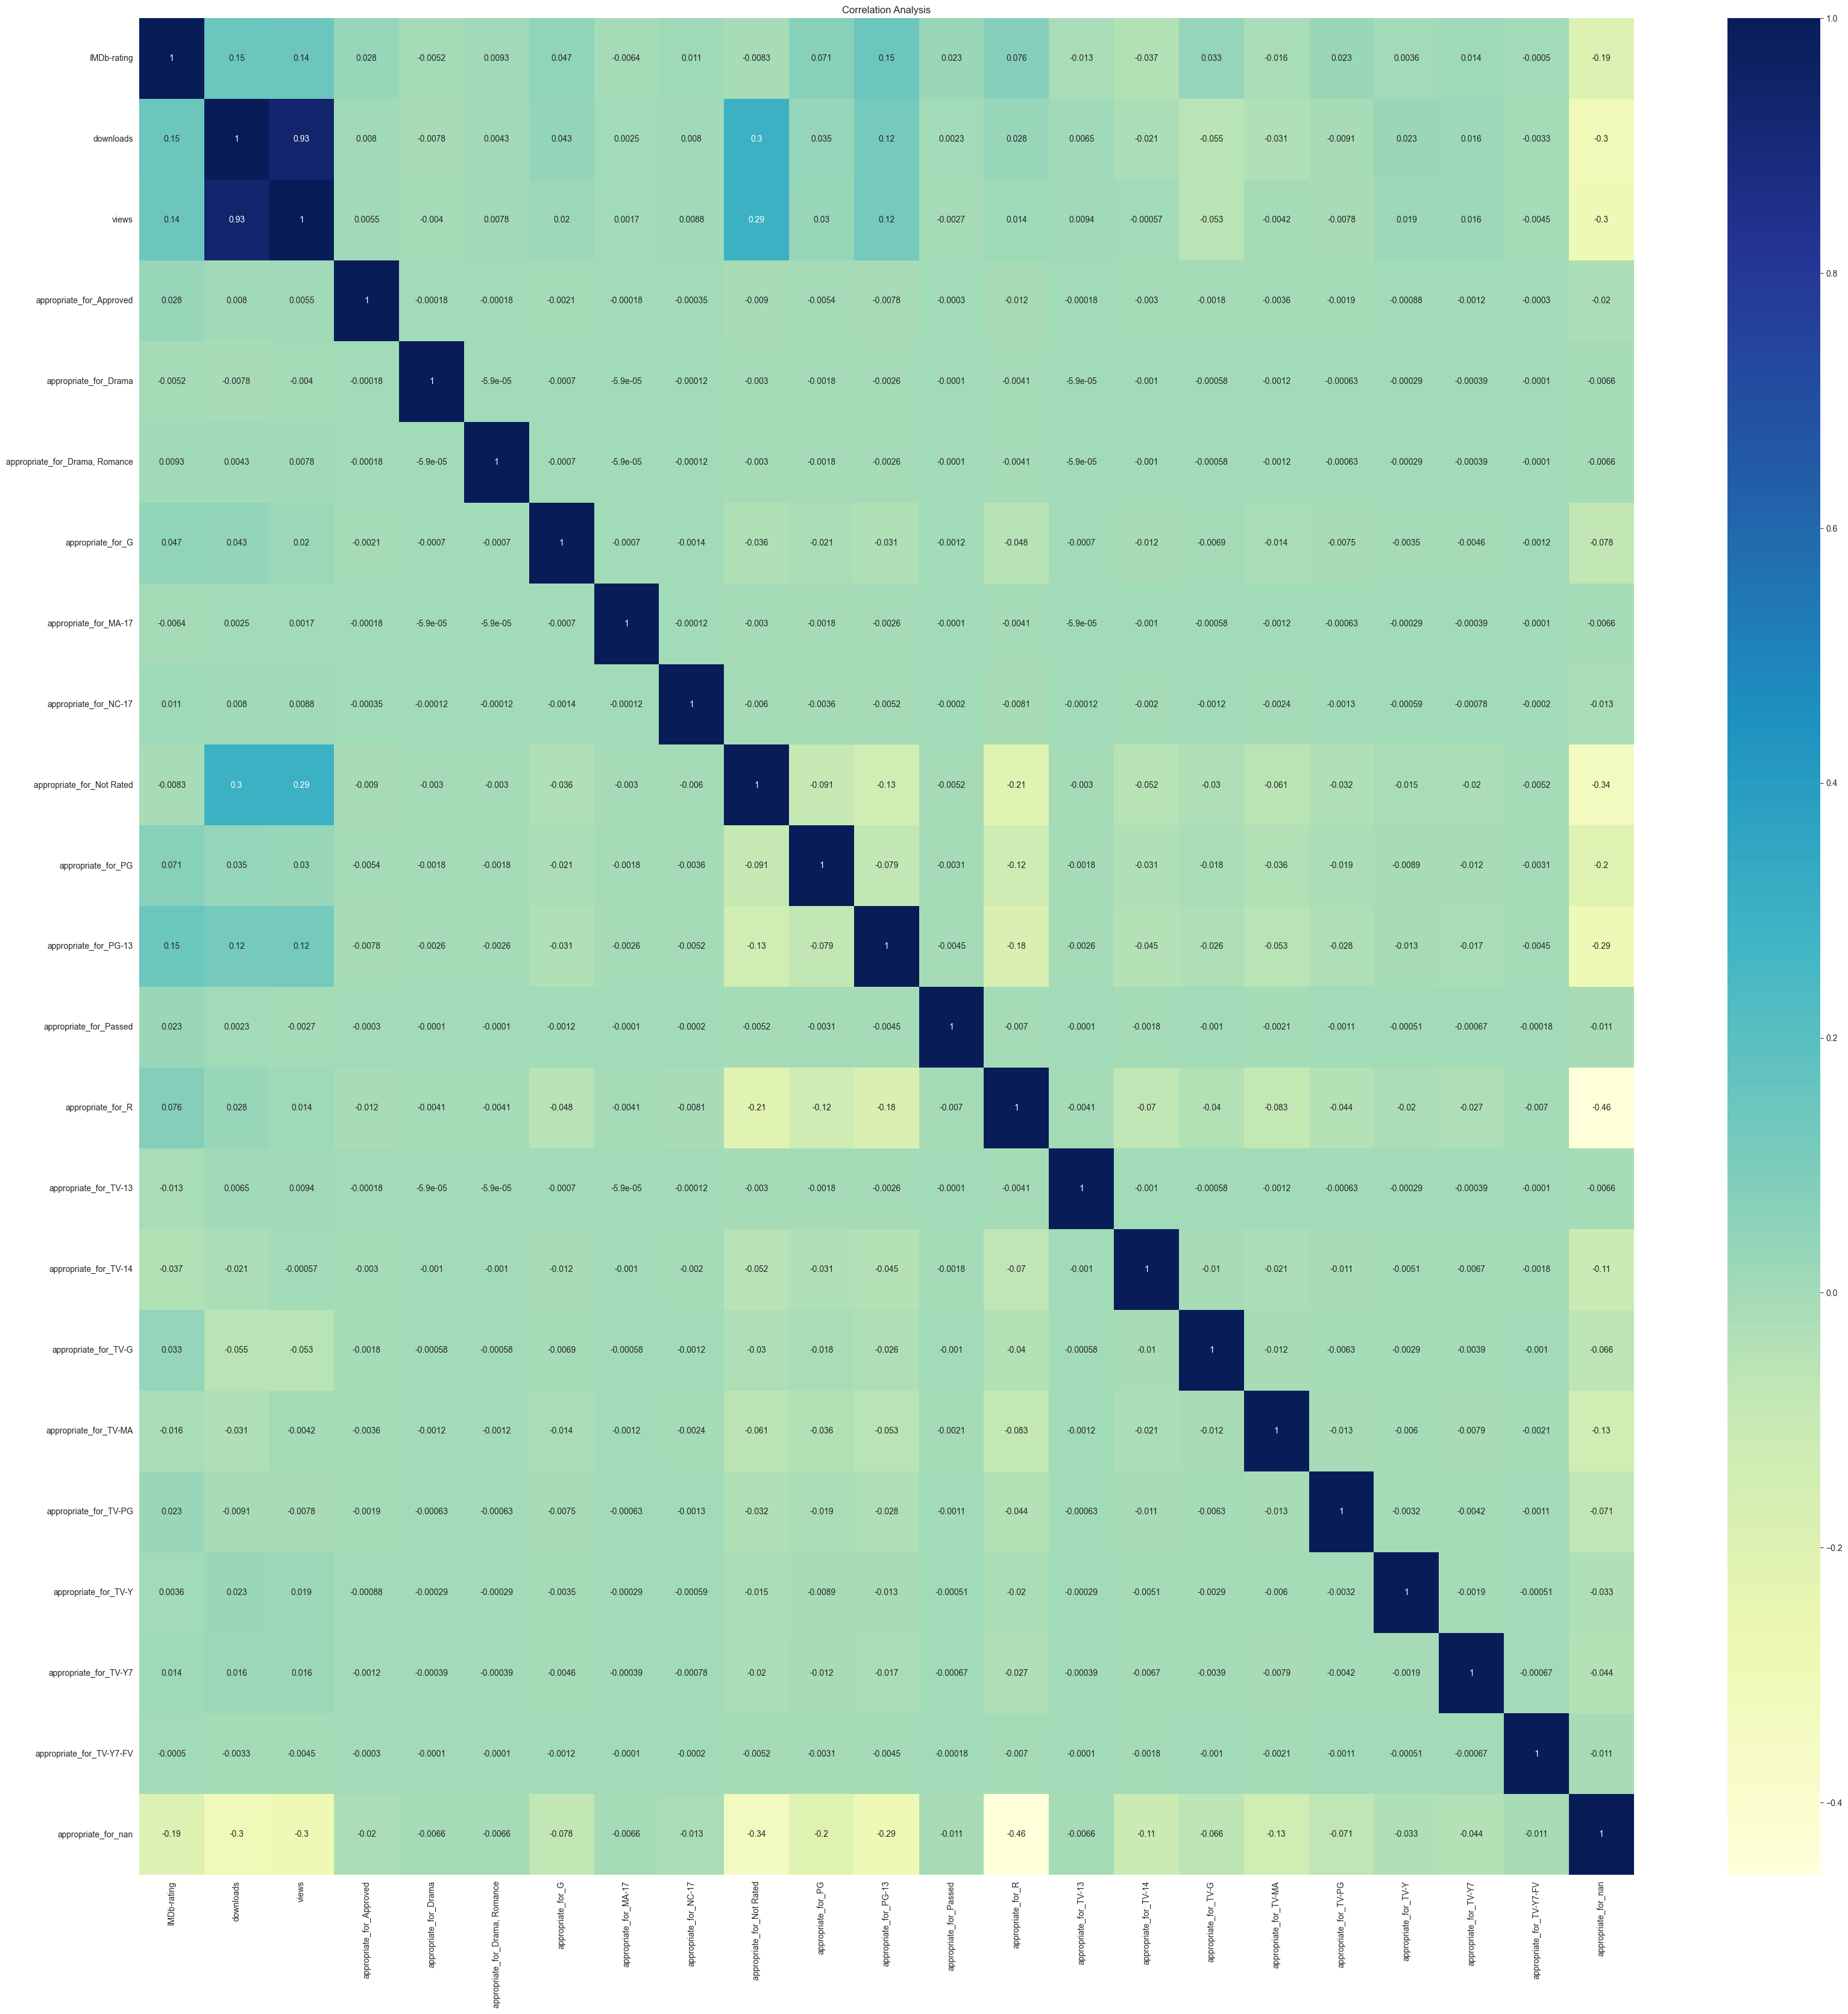

In [125]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_numeric.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

We can see from the heat map that `appropriate_for` is weak correlated (not larger than 0.3) to other attributes. Thus, we know that it is not a good idea to use the correlation between attributes to substitute the NaN in column `appropriate_for`. We use `IMDb-rating` to finish this completion because this is the most correlated attributes among all.

C:\Users\张睿堃\AppData\Local\Temp\ipykernel_11736\2358561480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket', showfliers=False)


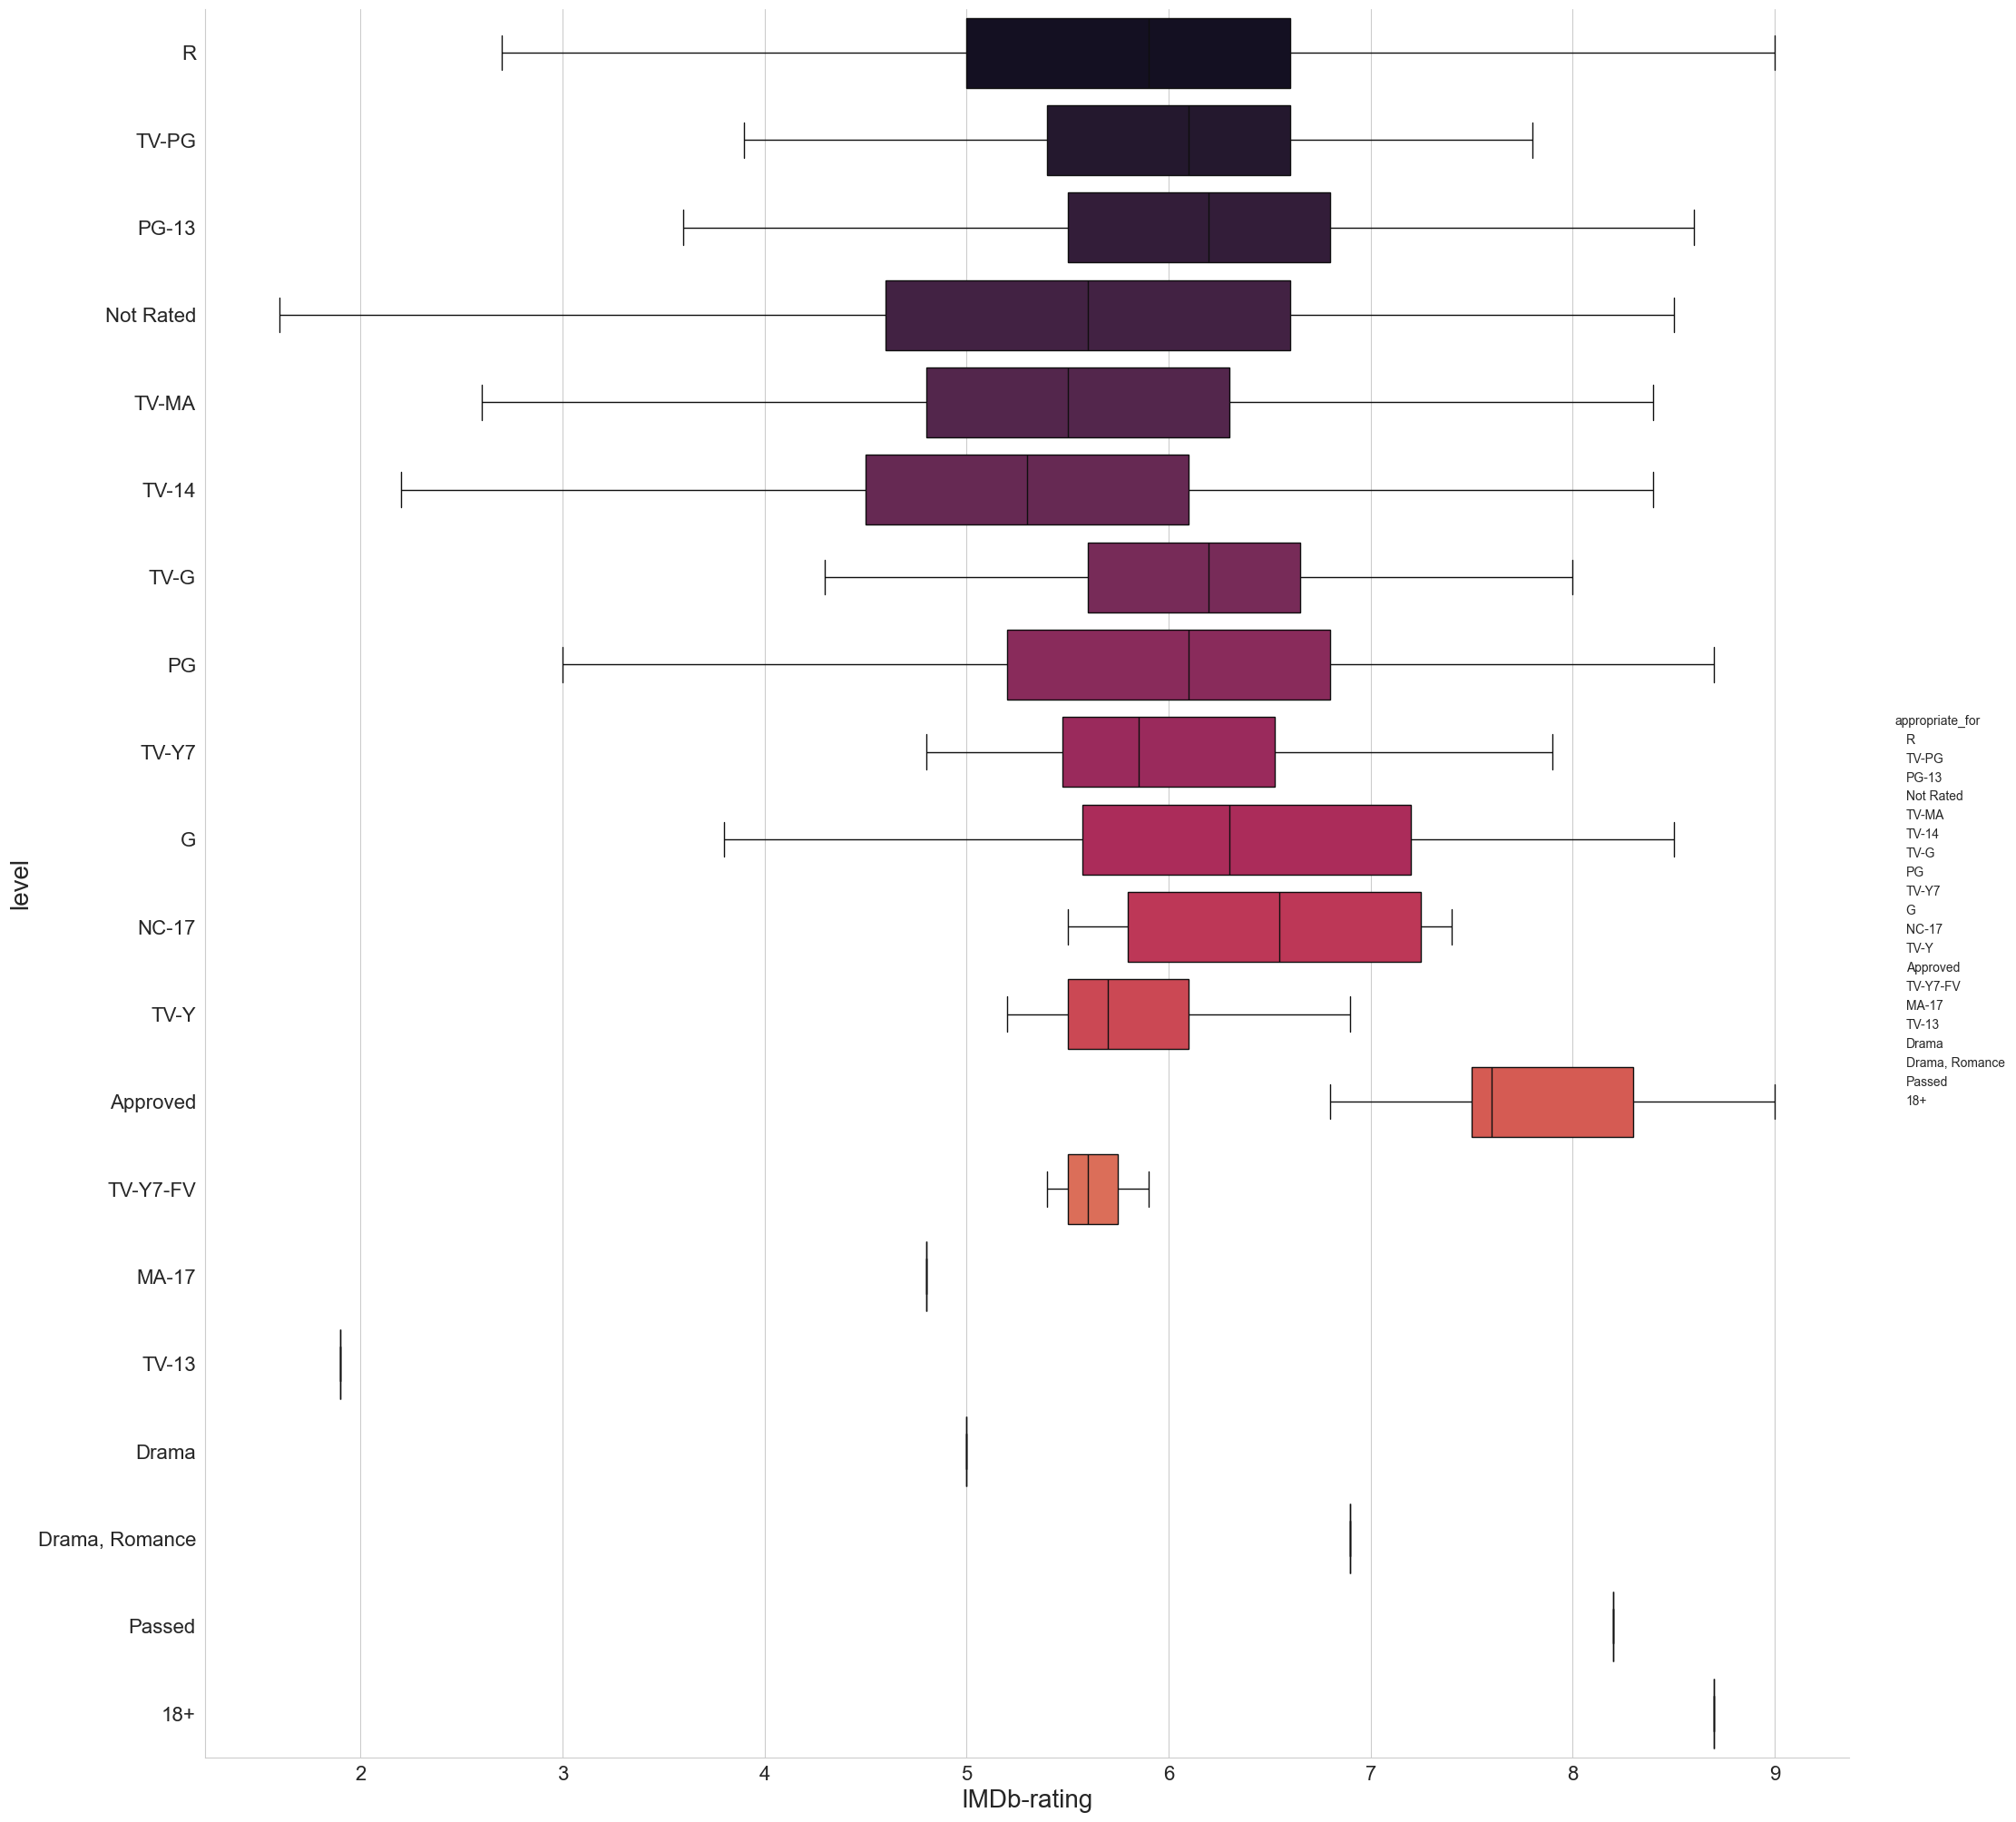

In [126]:
sns.set_style("whitegrid")
level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket', showfliers=False)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('level', fontsize=20, )
plt.xlabel('IMDb-rating', fontsize=20)
plt.show()

In [127]:
df1 = mov_data_attr_corr.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

avg
appropriate_for          
18+              8.700000
Approved         7.411111
Drama            5.000000
Drama, Romance   6.900000
G                6.260714
MA-17            4.800000
NC-17            6.500000
Not Rated        5.559187
PG               5.973099
PG-13            6.122500
Passed           8.200000
R                5.770883
TV-13            1.900000
TV-14            5.235154
TV-G             6.076768
TV-MA            5.477833
TV-PG            5.922807
TV-Y             5.708000
TV-Y7            5.934091
TV-Y7-FV         5.633333

In [128]:
mov_data_attr_corr

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      455.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
3              8.1             NaN               Venky Atluri     2379.0   
4              4.6             NaN               Shaji Kailas      657.0   
...            ...             ...                        ...        ...   
20521          7.8             NaN                Yash Chopra     2433.0   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20534          7.9             NaN                 Raj Kapoor     5625.0   
20545          8.0             NaN                        NaN     3276.0   

           id             industry                language posted_date  \
0      372092  Hollywood / English                 English  2023-02-20   
1      372091  Hollywood / English                 English  2023-02-20   
2      343381  Hollywood / English           English,Hindi  2021-04-20   
3      372090            Tollywood                   Hindi  2023-02-20   
4      372089            Tollywood                   Hindi  2023-02-20   
...       ...                  ...                     ...         ...   
20521   22874   Bollywood / Indian           Hindi,English  1970-01-01   
20522   23825   Bollywood / Indian                   Hindi  1970-01-01   
20533    1173  Hollywood / English  Spanish,German,English  2016-05-26   
20534    6839   Bollywood / Indian                   Hindi  1970-01-01   
20545   30459   Bollywood / Indian                   Hindi  1970-01-01   

      release_date run_time  \
0       2023-01-28      105   
1       2023-02-05       84   
2       2021-06-18      107   
3       2023-02-17      139   
4       2023-01-26      122   
...            ...      ...   
20521   1965-07-28      178   
20522   1962-05-11      158   
20533   1970-01-01       90   
20534   1954-01-25      193   
20545   1958-03-28      110   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
3      The life of a young man and his struggles agai...   
4      A man named Kalidas gets stranded due to the p...   
...                                                  ...   
20521  Members of a family are separated in a natural...   
20522  After a lusty Thakur rapes a young girl, she k...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20534  Raju lives as a derelict as a result of being ...   
20545  While driving his car on a rainy night, Anand'...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20521                                        Waqt   6908.0   
20522                              Bees Saal Baad   6077.0   
20533                        Love at First Hiccup  36022.0   
20534                                      Awaara  13829.0   
20545                                   Madhumati   7220.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...         

In [130]:
mov_data_attr_corr = mov_data
for i in range(len(mov_data_attr_corr)):
    if mov_data_attr_corr['appropriate_for'].iloc[i] is NA:
        rate = mov_data_attr_corr['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
mov_data_attr_corr['appropriate_for'].value_counts()

We now compare ***mov_data_attr_corr*** with the original dataset ***mov_data***.

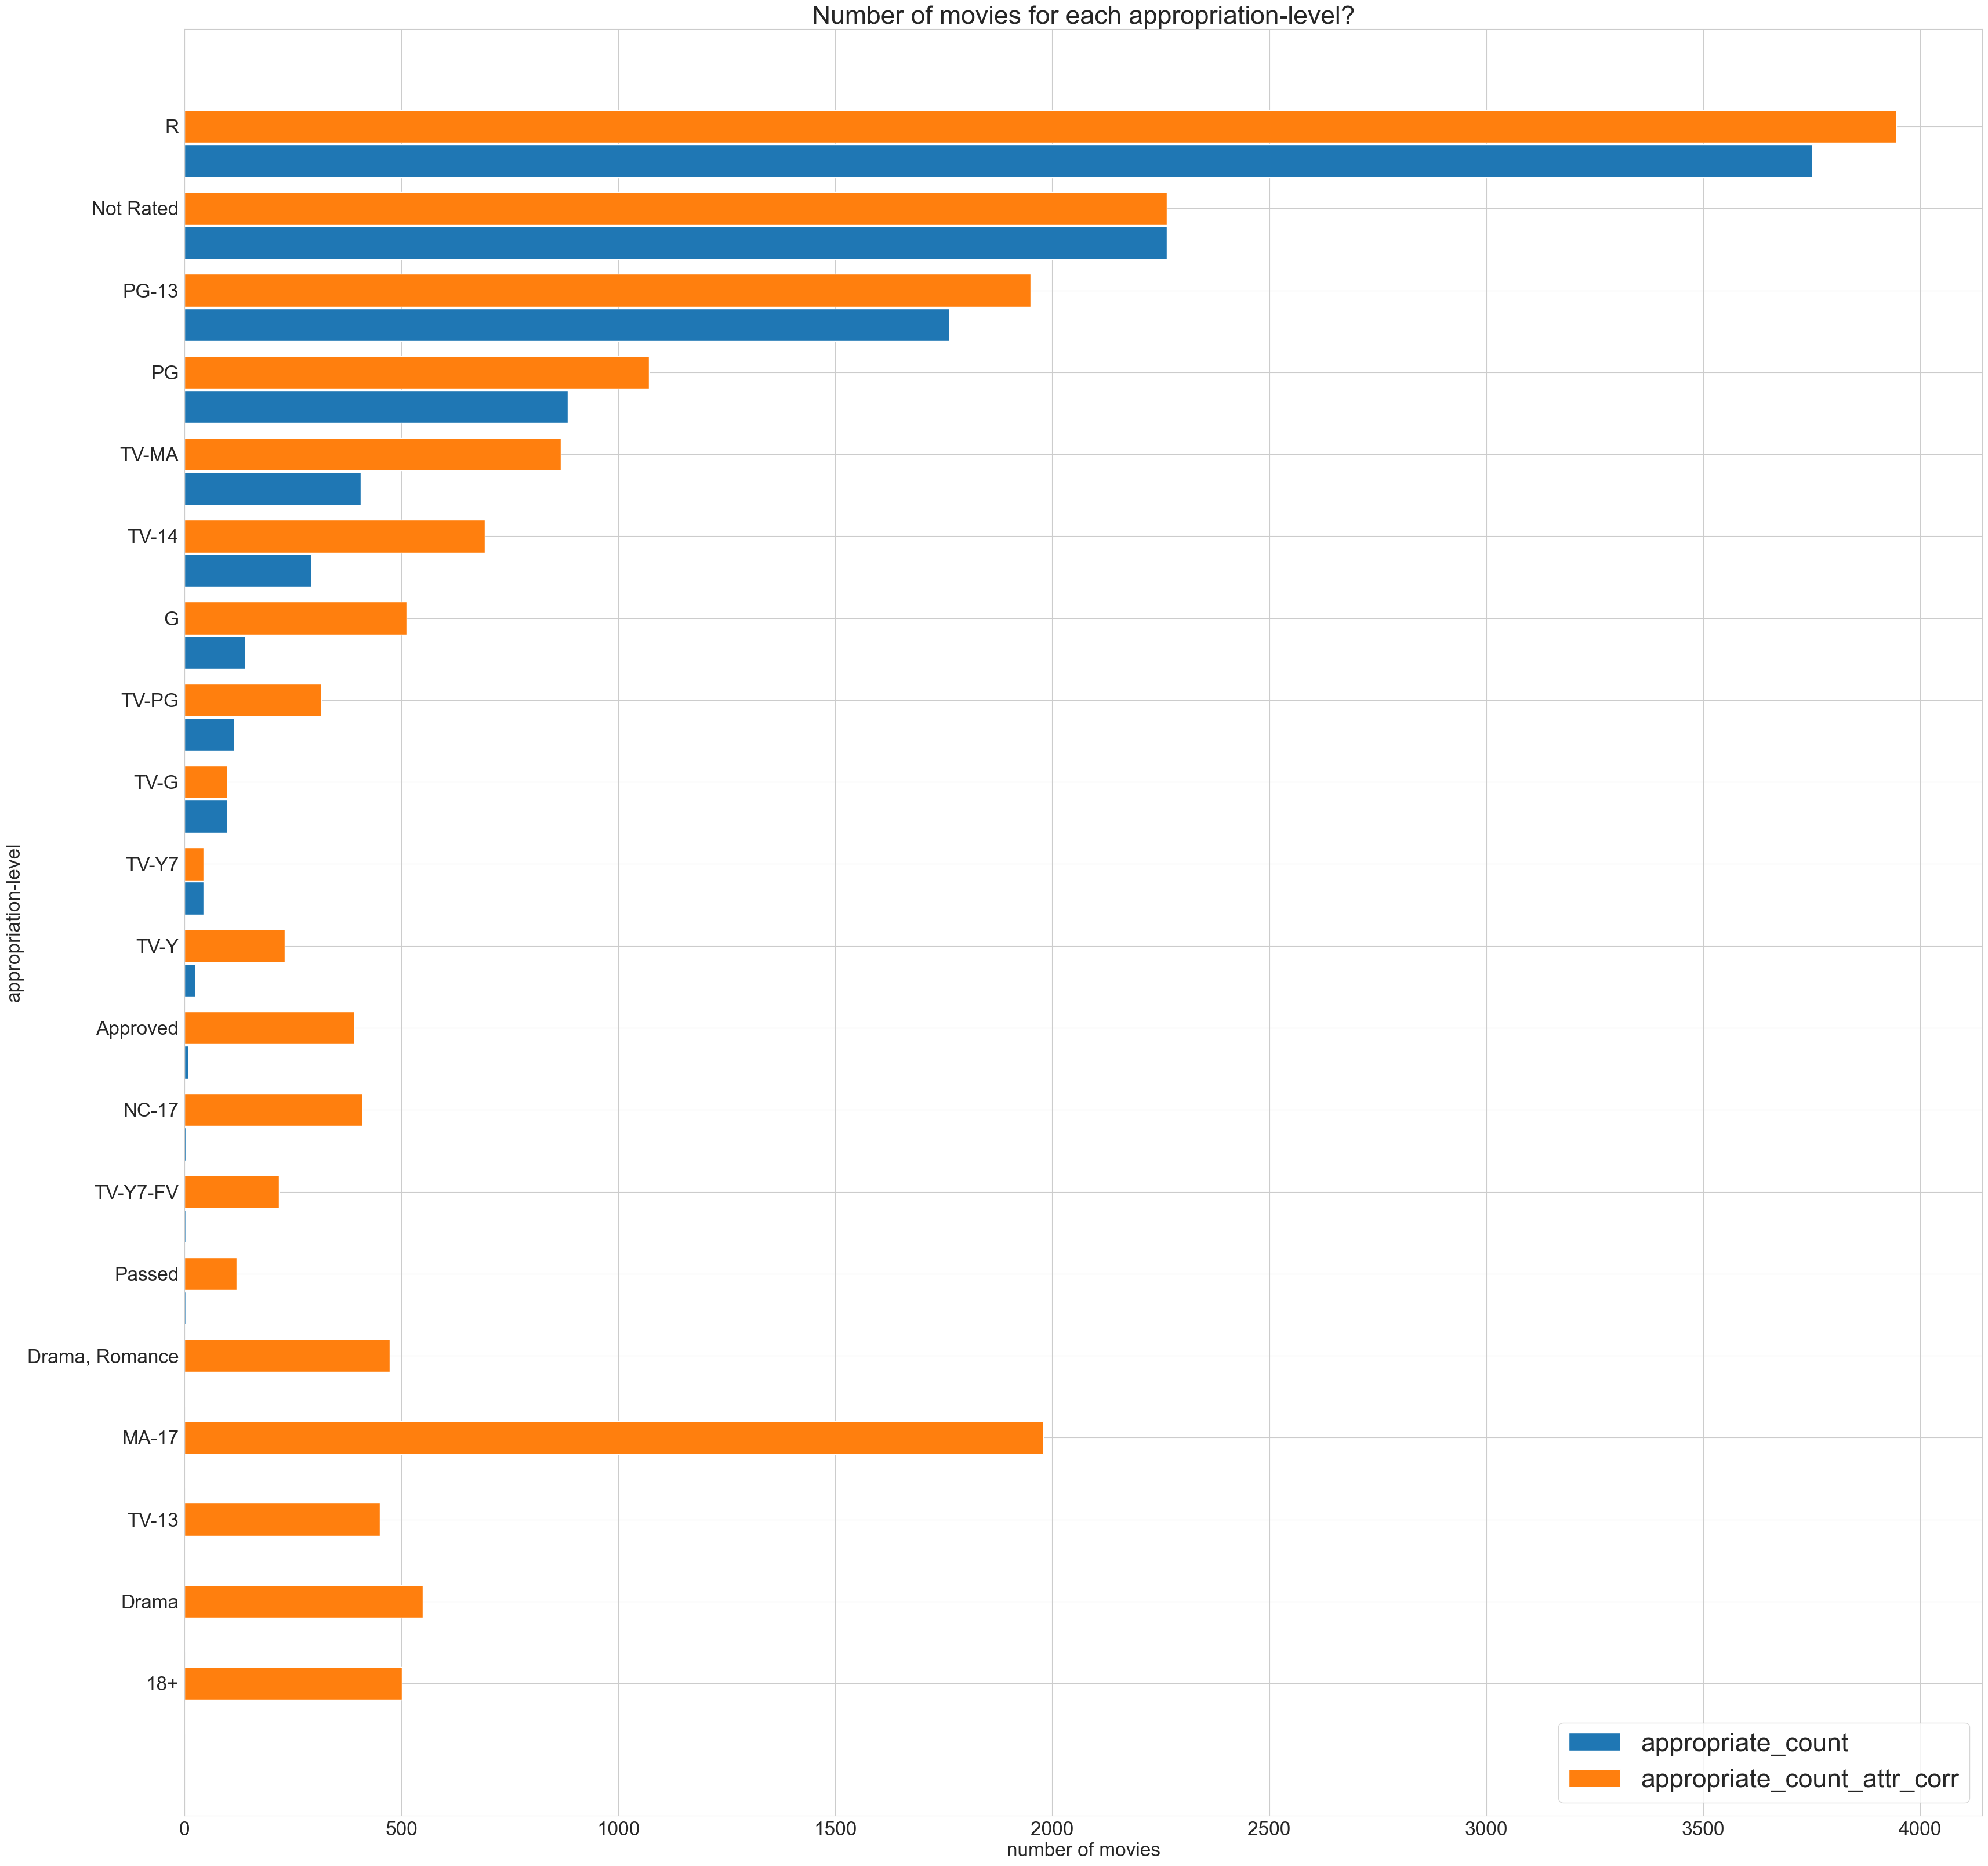

In [131]:
appropriate_count_attr_corr = appropriate_count
appropriate_count_attr_corr['appropriate_count_attr_corr'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_attr_corr['appropriate_for'].value_counts().index):
        appropriate_count_attr_corr.loc[[level], ['appropriate_count_attr_corr']] = mov_data_attr_corr['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_attr_corr))), tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_attr_corr)))], tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count_attr_corr'], label='appropriate_count_attr_corr', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

This method made it more smoothing, but even for levels in the appropriate_count that have no data, this method still add a lot to them. The reason is probably that the correlation is actually to weak, so that this md edoes not suit for this dataset well.

### Substitute NaN Regarding to the Correlationships Between Samples

The dataset cleaned in this way is named to be ***mov_data_sample_corr***.

In [133]:
mov_data_sample_corr = copy.deepcopy(mov_data)

In [134]:
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [135]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['IMDb-rating', 'downloads', 'views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [136]:
normal_mov_data = regularit(mov_data)
normal_mov_data

IMDb-rating  downloads     views
0        -0.725490  -0.001164 -0.002310
1        -1.514286  -0.000187 -0.000205
2        -0.872340  -0.003660 -0.008467
3        -3.888889  -0.006117 -0.004430
4        -0.660377  -0.001682 -0.001082
...            ...        ...       ...
20521    -3.190476  -0.006257 -0.003825
20522    -2.142857  -0.004962 -0.003314
20533    -1.046512  -0.032413 -0.022062
20534    -3.400000  -0.014586 -0.008101
20545    -3.631579  -0.008443 -0.004017

[17085 rows x 3 columns]

In [137]:
normal_appropriate = pd.concat([normal_mov_data, mov_data['appropriate_for']], axis=1)
normal_appropriate

IMDb-rating  downloads     views appropriate_for
0        -0.725490  -0.001164 -0.002310               R
1        -1.514286  -0.000187 -0.000205           TV-PG
2        -0.872340  -0.003660 -0.008467               R
3        -3.888889  -0.006117 -0.004430          Passed
4        -0.660377  -0.001682 -0.001082           MA-17
...            ...        ...       ...             ...
20521    -3.190476  -0.006257 -0.003825        Approved
20522    -2.142857  -0.004962 -0.003314       Not Rated
20533    -1.046512  -0.032413 -0.022062               R
20534    -3.400000  -0.014586 -0.008101          Passed
20545    -3.631579  -0.008443 -0.004017          Passed

[17085 rows x 4 columns]

In [138]:
infos = []
for i in range(len(normal_appropriate)):
    info = []
    rate = normal_appropriate['IMDb-rating'].iloc[i]
    download = normal_appropriate['downloads'].iloc[i]
    view = normal_appropriate['views'].iloc[i]
    info.append(rate)
    info.append(download)
    info.append(view)
    infos.append(info)

In [139]:
for i in range(len(normal_appropriate)):
    if normal_appropriate['appropriate_for'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        mov_data_sample_corr['appropriate_for'].iloc[i] = mov_data_sample_corr['appropriate_for'].iloc[idx]
mov_data_sample_corr['appropriate_for'].value_counts()

appropriate_for
R                 3946
Not Rated         2264
MA-17             1979
PG-13             1950
PG                1070
TV-MA              868
TV-14              692
Drama              549
G                  512
18+                501
Drama, Romance     473
TV-13              451
NC-17              410
Approved           392
TV-PG              316
TV-Y               231
TV-Y7-FV           218
Passed             120
TV-G                99
TV-Y7               44
Name: count, dtype: int64

This result is quite similar to the previous method. The reason is probably that the 3 attributes we use here are highly correlated, so that when we use them to measure the correlationships between samples, the result does not change much.